In [98]:
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [99]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [154]:
GarageCars.head

NameError: name 'GarageCars' is not defined

In [103]:
df_train['Alley'].fillna('no access', inplace=True)
df_train['BsmtQual'].fillna('no basement', inplace=True)
df_train['BsmtCond'].fillna('no basement', inplace=True)
df_train['BsmtFinType1'].fillna('no basement', inplace=True)
df_train['BsmtFinType2'].fillna('no basement', inplace=True)
df_train['FireplaceQu'].fillna('no Fireplace', inplace=True)
df_train['GarageType'].fillna('no Garage', inplace=True)
df_train['GarageFinish'].fillna('no Garage', inplace=True)
df_train['GarageQual'].fillna('no Garage', inplace=True)
df_train['GarageCond'].fillna('no Garage', inplace=True)
df_train['PoolQC'].fillna('no Pool', inplace=True)
df_train['Fence'].fillna('no Fence', inplace=True)
df_train['MasVnrType'].fillna('no type', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['BsmtExposure'].fillna('no exposure', inplace=True)
df_train['MiscFeature'].fillna('none', inplace=True)
df_train['Electrical'].fillna('SBrkr', inplace=True)
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(), inplace=True)

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

/Users/a89267000160/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


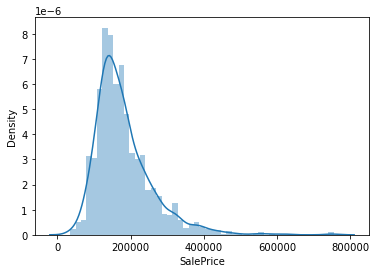

<AxesSubplot:>

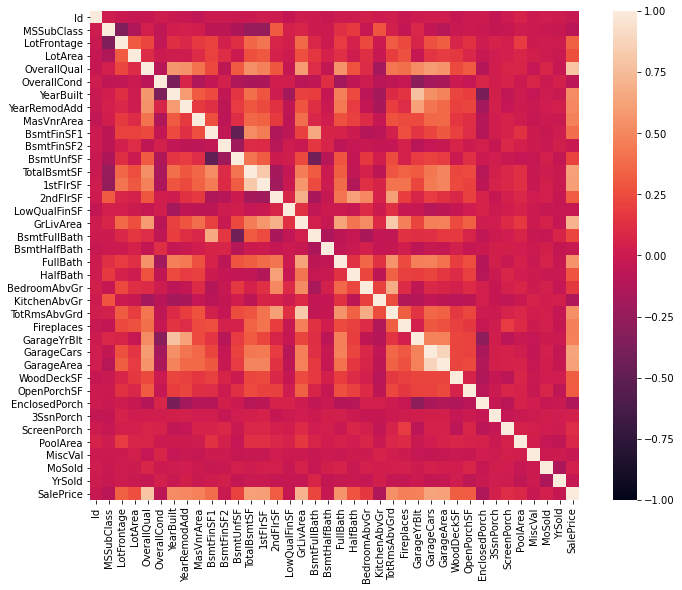

In [106]:
df_plt = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(df_plt, vmax=1,vmin=-1, square=True)

In [107]:
#Записываем в список параметры нужных столбцов и отображаем


features = [
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    'FullBath',
    'MasVnrArea',
    'YearBuilt',
    'YearRemodAdd'
]
target = 'SalePrice'

df_2 = df_train[features+[target]]


In [108]:
df_2 = df_2.drop('SalePrice', axis= 1)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,MasVnrArea,YearBuilt,YearRemodAdd
0,7,1710,2,856,2,196.0,2003,2003
1,6,1262,2,1262,2,0.0,1976,1976
2,7,1786,2,920,2,162.0,2001,2002
3,7,1717,3,756,1,0.0,1915,1970
4,8,2198,3,1145,2,350.0,2000,2000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,0.0,1999,2000
1456,6,2073,2,1542,2,119.0,1978,1988
1457,7,2340,1,1152,2,0.0,1941,2006
1458,5,1078,1,1078,1,0.0,1950,1996


In [110]:

x, y = df_train[features].to_numpy(), df_train['SalePrice'].to_numpy()
x.shape, y.shape

((1460, 8), (1460,))

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [112]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [113]:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1022, 8), (438, 8), (1022,), (438,))

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((1022, 8), (438, 8))

<AxesSubplot:>

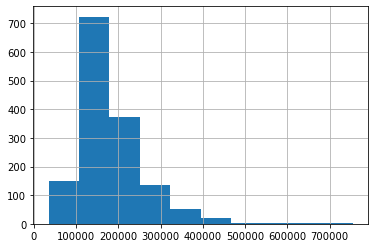

In [115]:
df_train['SalePrice'].hist()

In [116]:
df_2


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,MasVnrArea,YearBuilt,YearRemodAdd
0,7,1710,2,856,2,196.0,2003,2003
1,6,1262,2,1262,2,0.0,1976,1976
2,7,1786,2,920,2,162.0,2001,2002
3,7,1717,3,756,1,0.0,1915,1970
4,8,2198,3,1145,2,350.0,2000,2000
...,...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,0.0,1999,2000
1456,6,2073,2,1542,2,119.0,1978,1988
1457,7,2340,1,1152,2,0.0,1941,2006
1458,5,1078,1,1078,1,0.0,1950,1996


In [117]:
rf_3 = RandomForestRegressor(n_estimators =3)
rf_100 = RandomForestRegressor(n_estimators= 100)
rf_200 = RandomForestRegressor(n_estimators= 200)
rf_300 = RandomForestRegressor(n_estimators= 300)

In [149]:
rf_3.fit (x_train,y_train)
rf_100.fit (x_train,y_train)
rf_200.fit (x_train,y_train)
rf_300.fit (x_train,y_train)

print('3 trees' , mean_squared_error(y_valid, rf_3.predict(x_valid))**.5)
print('100 trees' ,mean_squared_error(y_valid, rf_100.predict(x_valid))**.5)
print('200 trees' , mean_squared_error(y_valid, rf_200.predict(x_valid))**.5)
print('300 trees' , mean_squared_error(y_valid, rf_300.predict(x_valid))**.5)

3 trees 32669.526111158513
100 trees 28668.39531905308
200 trees 29053.083744247346
300 trees 28995.11415809914


In [152]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   TotalBsmtSF   1458 non-null   float64
 4   FullBath      1459 non-null   int64  
 5   MasVnrArea    1444 non-null   float64
 6   YearBuilt     1459 non-null   int64  
 7   YearRemodAdd  1459 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.3 KB


In [157]:
df_test_2['OverallQual'].fillna(df_test_2['OverallQual'].mean(), inplace=True)
df_test_2['GrLivArea'].fillna(df_test_2['GrLivArea'].mean(), inplace=True)
df_test_2['GarageCars'].fillna(df_test_2['GarageCars'].mean(), inplace=True)
df_test_2['TotalBsmtSF'].fillna(df_test_2['TotalBsmtSF'].mean(), inplace=True)
df_test_2['FullBath'].fillna(df_test_2['FullBath'].mean(), inplace=True)
df_test_2['MasVnrArea'].fillna(df_test_2['MasVnrArea'].mean(), inplace=True)
df_test_2['YearBuilt'].fillna(df_test_2['YearBuilt'].mean(), inplace=True)
df_test_2['YearRemodAdd'].fillna(df_test_2['YearRemodAdd'].mean(), inplace=True)

In [158]:
y_test_rf = rf_100.predict(df_test_2.values)

In [159]:
from sklearn.ensemble import StackingRegressor

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [161]:
stacked_model_1 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= RandomForestRegressor())

In [162]:
stacked_model_1.fit(x_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=RandomForestRegressor())

In [163]:
y_pred_sm1 = stacked_model_1.predict(x_valid)

In [179]:
stacked_model_2 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= LinearRegression())

In [180]:
stacked_model_2.fit(x_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression())

In [181]:
y_pred_sm2 = stacked_model_2.predict(x_valid)

In [182]:
print(f'Stacked model 1: {mean_squared_error(y_valid , y_pred_sm1)**.5}')

print(f'Stacked model 2: {mean_squared_error(y_valid , y_pred_sm2)**.5}')

Stacked model 1: 33726.3009549022
Stacked model 2: 35046.90153325447


In [183]:
from sklearn.ensemble import VotingRegressor

In [184]:
vr = VotingRegressor(estimators= [('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                              ('svr',SVR())], weights = [1,.1,0]) 
vr.fit(x_train,y_train)
vr_pred = vr.predict(x_valid)  


In [185]:
stacked_model_3 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= RandomForestRegressor(n_estimators= 300))
stacked_model_3.fit(x_train,y_train)
y_pred_sm_3 = vr.predict(x_valid)      

In [186]:
print(f'Voting mse:{mean_squared_error(y_valid, y_pred_sm_3)}')

Voting mse:1229944149.124903


In [187]:
### Adaboost

from catboost import CatBoostRegressor

In [224]:
cbr = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.01)

In [225]:
cbr.fit (x_train, y_train, verbose = 2)
y_pred_cbr = cbr.predict(x_valid)
print(f'CatBoost RMSE: {mean_squared_error(y_valid, y_pred_cbr)**.5}')

0:	learn: 76613.2794669	total: 2.9ms	remaining: 5.79s
2:	learn: 75664.4708077	total: 4.98ms	remaining: 3.32s
4:	learn: 74745.4220179	total: 7.11ms	remaining: 2.84s
6:	learn: 73836.9073669	total: 8.91ms	remaining: 2.54s
8:	learn: 72933.6395435	total: 10.7ms	remaining: 2.36s
10:	learn: 72022.9315324	total: 12.3ms	remaining: 2.21s
12:	learn: 71116.2835945	total: 13.7ms	remaining: 2.1s
14:	learn: 70258.6243967	total: 15.1ms	remaining: 2s
16:	learn: 69437.6775643	total: 16.7ms	remaining: 1.95s
18:	learn: 68585.0574786	total: 18.1ms	remaining: 1.89s
20:	learn: 67758.9497619	total: 19.7ms	remaining: 1.85s
22:	learn: 67001.6688547	total: 21ms	remaining: 1.81s
24:	learn: 66239.9643615	total: 22.4ms	remaining: 1.77s
26:	learn: 65449.8211343	total: 23.9ms	remaining: 1.75s
28:	learn: 64670.8637434	total: 25.2ms	remaining: 1.71s
30:	learn: 63932.9676888	total: 26.6ms	remaining: 1.69s
32:	learn: 63189.5529525	total: 27.9ms	remaining: 1.66s
34:	learn: 62469.3984391	total: 29.1ms	remaining: 1.64s
36:	

552:	learn: 26565.8506038	total: 373ms	remaining: 975ms
554:	learn: 26542.4311032	total: 374ms	remaining: 974ms
556:	learn: 26530.1447668	total: 375ms	remaining: 972ms
558:	learn: 26507.1509026	total: 376ms	remaining: 970ms
560:	learn: 26486.1228444	total: 378ms	remaining: 968ms
562:	learn: 26471.0188244	total: 379ms	remaining: 967ms
564:	learn: 26453.8458899	total: 380ms	remaining: 966ms
566:	learn: 26433.0454650	total: 382ms	remaining: 964ms
568:	learn: 26420.1459656	total: 383ms	remaining: 963ms
570:	learn: 26401.4890253	total: 384ms	remaining: 962ms
572:	learn: 26382.1219288	total: 386ms	remaining: 961ms
574:	learn: 26365.3804191	total: 387ms	remaining: 959ms
576:	learn: 26337.1822663	total: 388ms	remaining: 957ms
578:	learn: 26319.2764763	total: 389ms	remaining: 955ms
580:	learn: 26309.3150862	total: 390ms	remaining: 953ms
582:	learn: 26290.2834052	total: 391ms	remaining: 951ms
584:	learn: 26272.3123983	total: 393ms	remaining: 950ms
586:	learn: 26251.5940376	total: 394ms	remaining

1118:	learn: 23270.4455232	total: 743ms	remaining: 585ms
1120:	learn: 23268.8140127	total: 745ms	remaining: 584ms
1122:	learn: 23262.7133534	total: 746ms	remaining: 583ms
1124:	learn: 23257.9343428	total: 747ms	remaining: 581ms
1126:	learn: 23249.4600900	total: 749ms	remaining: 580ms
1128:	learn: 23237.7901497	total: 750ms	remaining: 579ms
1130:	learn: 23233.5779292	total: 752ms	remaining: 577ms
1132:	learn: 23219.3261369	total: 752ms	remaining: 576ms
1134:	learn: 23204.1748174	total: 754ms	remaining: 574ms
1136:	learn: 23198.8831714	total: 755ms	remaining: 573ms
1138:	learn: 23184.1210847	total: 757ms	remaining: 572ms
1140:	learn: 23172.0612439	total: 758ms	remaining: 571ms
1142:	learn: 23161.5954868	total: 759ms	remaining: 569ms
1144:	learn: 23153.3323397	total: 761ms	remaining: 568ms
1146:	learn: 23141.7569851	total: 762ms	remaining: 567ms
1148:	learn: 23131.3355149	total: 763ms	remaining: 565ms
1150:	learn: 23117.0705044	total: 764ms	remaining: 563ms
1152:	learn: 23107.8096373	tota

1668:	learn: 20753.8816152	total: 1.12s	remaining: 222ms
1670:	learn: 20744.6100004	total: 1.12s	remaining: 220ms
1672:	learn: 20737.7770991	total: 1.12s	remaining: 219ms
1674:	learn: 20729.7740036	total: 1.12s	remaining: 218ms
1676:	learn: 20718.0628826	total: 1.12s	remaining: 216ms
1678:	learn: 20706.6786734	total: 1.13s	remaining: 215ms
1680:	learn: 20694.6574066	total: 1.13s	remaining: 214ms
1682:	learn: 20683.9088193	total: 1.13s	remaining: 212ms
1684:	learn: 20674.8968231	total: 1.13s	remaining: 211ms
1686:	learn: 20667.5495953	total: 1.13s	remaining: 210ms
1688:	learn: 20656.0930700	total: 1.13s	remaining: 208ms
1690:	learn: 20647.4895233	total: 1.13s	remaining: 207ms
1692:	learn: 20642.9904139	total: 1.14s	remaining: 206ms
1694:	learn: 20641.2182668	total: 1.14s	remaining: 205ms
1696:	learn: 20633.8819208	total: 1.14s	remaining: 203ms
1698:	learn: 20625.7868328	total: 1.14s	remaining: 202ms
1700:	learn: 20619.1514941	total: 1.14s	remaining: 201ms
1702:	learn: 20611.4186965	tota

In [237]:

from sklearn.model_selection import GridSearchCV


cbr = CatBoostRegressor()

param_grid = {
    'iterations': [1800, 1900],
    'depth': [ 5 ],
    'learning_rate': [0.01],
    'l2_leaf_reg': [ 0.9, 1.3]
}

# создаем объект 
grid_cbr = GridSearchCV(
    estimator=cbr,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error', # метрика, которую будем *максимизировать*, поэтому neg
    cv=5, # количество фолдов, какую часть наблюдения на обучение, какую на тест
    verbose=4, # сколько печатать сообщений 
#     n_jobs=-1, # насколько параллелельно считаем
)
grid_cbr.fit(x, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] depth=5, iterations=1800, l2_leaf_reg=0.9, learning_rate=0.01 ...
0:	learn: 80047.2834238	total: 1.4ms	remaining: 2.52s
1:	learn: 79562.7190487	total: 2.21ms	remaining: 1.99s
2:	learn: 79027.6612523	total: 2.91ms	remaining: 1.74s
3:	learn: 78487.4981779	total: 3.69ms	remaining: 1.66s
4:	learn: 77947.1388207	total: 4.43ms	remaining: 1.59s
5:	learn: 77455.5536628	total: 5.07ms	remaining: 1.51s
6:	learn: 76967.5177208	total: 5.71ms	remaining: 1.46s
7:	learn: 76430.4881430	total: 6.41ms	remaining: 1.44s
8:	learn: 75947.7775064	total: 7.06ms	remaining: 1.4s
9:	learn: 75451.2088954	total: 7.7ms	remaining: 1.38s
10:	learn: 74963.6239611	total: 8.37ms	remaining: 1.36s
11:	learn: 74488.0593107	total: 9.2ms	remaining: 1.37s
12:	learn: 73968.2861173	total: 9.86ms	remaining: 1.35s
13:	learn: 73479.6287344	total: 10.6ms	remaining: 1.35s
14:	learn: 73012.5808721	total: 11.2ms	remaining: 1.33s
15:	learn: 72573.7361473	total: 11.8ms	rema

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


227:	learn: 32294.4791997	total: 166ms	remaining: 1.14s
228:	learn: 32240.0652801	total: 167ms	remaining: 1.14s
229:	learn: 32186.2632844	total: 167ms	remaining: 1.14s
230:	learn: 32129.2513686	total: 168ms	remaining: 1.14s
231:	learn: 32074.9632652	total: 169ms	remaining: 1.14s
232:	learn: 32021.0441047	total: 170ms	remaining: 1.14s
233:	learn: 31973.7381132	total: 171ms	remaining: 1.14s
234:	learn: 31912.5558805	total: 172ms	remaining: 1.14s
235:	learn: 31867.7645541	total: 172ms	remaining: 1.14s
236:	learn: 31820.2404194	total: 173ms	remaining: 1.14s
237:	learn: 31777.1317495	total: 174ms	remaining: 1.14s
238:	learn: 31728.2976193	total: 175ms	remaining: 1.14s
239:	learn: 31678.7673017	total: 175ms	remaining: 1.14s
240:	learn: 31625.2586136	total: 176ms	remaining: 1.14s
241:	learn: 31560.6695508	total: 177ms	remaining: 1.14s
242:	learn: 31517.4034200	total: 178ms	remaining: 1.14s
243:	learn: 31454.4705790	total: 178ms	remaining: 1.14s
244:	learn: 31407.8443930	total: 179ms	remaining

476:	learn: 25622.1166695	total: 349ms	remaining: 967ms
477:	learn: 25604.9945858	total: 350ms	remaining: 967ms
478:	learn: 25601.7511189	total: 350ms	remaining: 966ms
479:	learn: 25595.6387057	total: 351ms	remaining: 965ms
480:	learn: 25584.0854156	total: 351ms	remaining: 964ms
481:	learn: 25566.2163927	total: 352ms	remaining: 962ms
482:	learn: 25559.5046883	total: 353ms	remaining: 962ms
483:	learn: 25543.5874432	total: 354ms	remaining: 963ms
484:	learn: 25532.8332608	total: 355ms	remaining: 961ms
485:	learn: 25525.7151158	total: 355ms	remaining: 960ms
486:	learn: 25520.6193727	total: 356ms	remaining: 959ms
487:	learn: 25499.6425519	total: 356ms	remaining: 958ms
488:	learn: 25492.6914423	total: 357ms	remaining: 957ms
489:	learn: 25481.3415671	total: 358ms	remaining: 957ms
490:	learn: 25460.7034193	total: 358ms	remaining: 955ms
491:	learn: 25450.7816041	total: 359ms	remaining: 955ms
492:	learn: 25435.4524033	total: 360ms	remaining: 954ms
493:	learn: 25420.1200118	total: 360ms	remaining

734:	learn: 23432.8905166	total: 533ms	remaining: 772ms
735:	learn: 23425.9648540	total: 534ms	remaining: 772ms
736:	learn: 23413.3475561	total: 535ms	remaining: 772ms
737:	learn: 23407.4537019	total: 536ms	remaining: 771ms
738:	learn: 23401.7417218	total: 537ms	remaining: 771ms
739:	learn: 23397.5521883	total: 537ms	remaining: 770ms
740:	learn: 23392.0977745	total: 538ms	remaining: 769ms
741:	learn: 23385.6770627	total: 538ms	remaining: 768ms
742:	learn: 23380.0058187	total: 539ms	remaining: 767ms
743:	learn: 23373.5563277	total: 540ms	remaining: 766ms
744:	learn: 23365.2655608	total: 541ms	remaining: 766ms
745:	learn: 23358.2503759	total: 541ms	remaining: 765ms
746:	learn: 23347.7996840	total: 542ms	remaining: 764ms
747:	learn: 23340.5902004	total: 543ms	remaining: 763ms
748:	learn: 23331.3866747	total: 544ms	remaining: 763ms
749:	learn: 23325.0320904	total: 544ms	remaining: 762ms
750:	learn: 23321.3309641	total: 545ms	remaining: 761ms
751:	learn: 23310.9639668	total: 546ms	remaining

994:	learn: 21761.6410794	total: 716ms	remaining: 579ms
995:	learn: 21754.5339686	total: 717ms	remaining: 578ms
996:	learn: 21753.2451097	total: 717ms	remaining: 578ms
997:	learn: 21747.4465010	total: 718ms	remaining: 577ms
998:	learn: 21740.3368466	total: 718ms	remaining: 576ms
999:	learn: 21736.7854697	total: 719ms	remaining: 575ms
1000:	learn: 21730.6019839	total: 720ms	remaining: 574ms
1001:	learn: 21728.2592408	total: 720ms	remaining: 574ms
1002:	learn: 21721.4048823	total: 721ms	remaining: 573ms
1003:	learn: 21713.9733882	total: 722ms	remaining: 572ms
1004:	learn: 21711.5044443	total: 722ms	remaining: 571ms
1005:	learn: 21704.1694250	total: 723ms	remaining: 570ms
1006:	learn: 21702.6629549	total: 723ms	remaining: 570ms
1007:	learn: 21698.7334321	total: 724ms	remaining: 569ms
1008:	learn: 21696.4774235	total: 725ms	remaining: 568ms
1009:	learn: 21686.1850355	total: 726ms	remaining: 568ms
1010:	learn: 21683.1990317	total: 727ms	remaining: 567ms
1011:	learn: 21676.3756655	total: 727

1242:	learn: 20461.1630482	total: 899ms	remaining: 403ms
1243:	learn: 20457.1018455	total: 900ms	remaining: 402ms
1244:	learn: 20453.5460327	total: 900ms	remaining: 401ms
1245:	learn: 20450.2117916	total: 901ms	remaining: 401ms
1246:	learn: 20444.5083410	total: 902ms	remaining: 400ms
1247:	learn: 20439.4718576	total: 902ms	remaining: 399ms
1248:	learn: 20435.0178882	total: 903ms	remaining: 398ms
1249:	learn: 20429.4917869	total: 904ms	remaining: 398ms
1250:	learn: 20427.3578998	total: 904ms	remaining: 397ms
1251:	learn: 20421.1420476	total: 905ms	remaining: 396ms
1252:	learn: 20418.6915420	total: 906ms	remaining: 395ms
1253:	learn: 20415.9239209	total: 906ms	remaining: 395ms
1254:	learn: 20411.0776582	total: 907ms	remaining: 394ms
1255:	learn: 20406.2554284	total: 907ms	remaining: 393ms
1256:	learn: 20399.6262303	total: 908ms	remaining: 392ms
1257:	learn: 20396.0287244	total: 909ms	remaining: 392ms
1258:	learn: 20389.1046512	total: 910ms	remaining: 391ms
1259:	learn: 20385.8177011	tota

1494:	learn: 19274.6904038	total: 1.08s	remaining: 221ms
1495:	learn: 19270.6640386	total: 1.08s	remaining: 220ms
1496:	learn: 19263.4269417	total: 1.08s	remaining: 219ms
1497:	learn: 19256.2575350	total: 1.08s	remaining: 219ms
1498:	learn: 19250.3943554	total: 1.08s	remaining: 218ms
1499:	learn: 19246.1941588	total: 1.09s	remaining: 217ms
1500:	learn: 19242.6303405	total: 1.09s	remaining: 217ms
1501:	learn: 19236.8789776	total: 1.09s	remaining: 216ms
1502:	learn: 19232.3230017	total: 1.09s	remaining: 215ms
1503:	learn: 19226.6838742	total: 1.09s	remaining: 214ms
1504:	learn: 19220.0638961	total: 1.09s	remaining: 214ms
1505:	learn: 19214.8269893	total: 1.09s	remaining: 213ms
1506:	learn: 19209.0195831	total: 1.09s	remaining: 212ms
1507:	learn: 19201.5648571	total: 1.09s	remaining: 211ms
1508:	learn: 19195.3452537	total: 1.09s	remaining: 211ms
1509:	learn: 19190.2360167	total: 1.09s	remaining: 210ms
1510:	learn: 19183.7840410	total: 1.09s	remaining: 209ms
1511:	learn: 19179.6500523	tota

1751:	learn: 18181.3665620	total: 1.27s	remaining: 34.7ms
1752:	learn: 18176.8519643	total: 1.27s	remaining: 34ms
1753:	learn: 18173.7092664	total: 1.27s	remaining: 33.3ms
1754:	learn: 18171.7797094	total: 1.27s	remaining: 32.5ms
1755:	learn: 18170.1292742	total: 1.27s	remaining: 31.8ms
1756:	learn: 18166.3798848	total: 1.27s	remaining: 31.1ms
1757:	learn: 18161.9576552	total: 1.27s	remaining: 30.4ms
1758:	learn: 18154.2840850	total: 1.27s	remaining: 29.7ms
1759:	learn: 18151.8266937	total: 1.27s	remaining: 28.9ms
1760:	learn: 18147.0852032	total: 1.27s	remaining: 28.2ms
1761:	learn: 18142.1918814	total: 1.27s	remaining: 27.5ms
1762:	learn: 18137.4869153	total: 1.27s	remaining: 26.8ms
1763:	learn: 18133.1345406	total: 1.27s	remaining: 26ms
1764:	learn: 18131.5893271	total: 1.28s	remaining: 25.3ms
1765:	learn: 18128.4162915	total: 1.28s	remaining: 24.6ms
1766:	learn: 18120.6139992	total: 1.28s	remaining: 23.9ms
1767:	learn: 18118.7801692	total: 1.28s	remaining: 23.2ms
1768:	learn: 18114

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


165:	learn: 35487.6691511	total: 121ms	remaining: 1.19s
166:	learn: 35378.5311958	total: 122ms	remaining: 1.19s
167:	learn: 35282.7872285	total: 122ms	remaining: 1.19s
168:	learn: 35175.7552784	total: 123ms	remaining: 1.19s
169:	learn: 35070.6296292	total: 124ms	remaining: 1.19s
170:	learn: 34974.8086909	total: 125ms	remaining: 1.19s
171:	learn: 34873.2401395	total: 125ms	remaining: 1.19s
172:	learn: 34776.8695416	total: 126ms	remaining: 1.19s
173:	learn: 34676.8881455	total: 127ms	remaining: 1.18s
174:	learn: 34573.5453823	total: 127ms	remaining: 1.18s
175:	learn: 34494.9782374	total: 128ms	remaining: 1.18s
176:	learn: 34408.3414926	total: 129ms	remaining: 1.18s
177:	learn: 34314.1870882	total: 129ms	remaining: 1.18s
178:	learn: 34214.0445083	total: 130ms	remaining: 1.18s
179:	learn: 34129.6034978	total: 131ms	remaining: 1.18s
180:	learn: 34040.9291343	total: 131ms	remaining: 1.18s
181:	learn: 33960.2339949	total: 132ms	remaining: 1.17s
182:	learn: 33874.3748260	total: 133ms	remaining

414:	learn: 25385.9339844	total: 304ms	remaining: 1.01s
415:	learn: 25373.0245761	total: 305ms	remaining: 1.01s
416:	learn: 25360.5195216	total: 306ms	remaining: 1.01s
417:	learn: 25350.6943966	total: 306ms	remaining: 1.01s
418:	learn: 25333.3939006	total: 307ms	remaining: 1.01s
419:	learn: 25316.9085858	total: 308ms	remaining: 1.01s
420:	learn: 25308.4209819	total: 308ms	remaining: 1.01s
421:	learn: 25300.8846840	total: 309ms	remaining: 1.01s
422:	learn: 25288.6412246	total: 310ms	remaining: 1.01s
423:	learn: 25274.0218886	total: 311ms	remaining: 1.01s
424:	learn: 25262.4838768	total: 312ms	remaining: 1.01s
425:	learn: 25248.3296165	total: 312ms	remaining: 1.01s
426:	learn: 25235.7583088	total: 313ms	remaining: 1.01s
427:	learn: 25227.1178700	total: 314ms	remaining: 1s
428:	learn: 25210.9739742	total: 314ms	remaining: 1s
429:	learn: 25194.0693417	total: 315ms	remaining: 1s
430:	learn: 25177.7609344	total: 316ms	remaining: 1s
431:	learn: 25164.7383950	total: 317ms	remaining: 1s
432:	le

667:	learn: 23086.6159589	total: 488ms	remaining: 826ms
668:	learn: 23077.0756929	total: 489ms	remaining: 826ms
669:	learn: 23068.4941504	total: 489ms	remaining: 825ms
670:	learn: 23062.1304213	total: 490ms	remaining: 824ms
671:	learn: 23056.9116830	total: 490ms	remaining: 823ms
672:	learn: 23048.9120638	total: 491ms	remaining: 822ms
673:	learn: 23042.6405123	total: 492ms	remaining: 822ms
674:	learn: 23035.5425262	total: 492ms	remaining: 821ms
675:	learn: 23027.0089909	total: 493ms	remaining: 820ms
676:	learn: 23020.0252972	total: 494ms	remaining: 819ms
677:	learn: 23013.1748288	total: 495ms	remaining: 819ms
678:	learn: 23005.5061969	total: 495ms	remaining: 818ms
679:	learn: 22999.0177458	total: 496ms	remaining: 817ms
680:	learn: 22991.6892376	total: 497ms	remaining: 817ms
681:	learn: 22979.0730855	total: 498ms	remaining: 816ms
682:	learn: 22970.3807641	total: 499ms	remaining: 816ms
683:	learn: 22965.6866423	total: 499ms	remaining: 815ms
684:	learn: 22958.4848580	total: 500ms	remaining

918:	learn: 21462.2161015	total: 671ms	remaining: 643ms
919:	learn: 21460.2031374	total: 671ms	remaining: 642ms
920:	learn: 21453.6358082	total: 672ms	remaining: 642ms
921:	learn: 21447.4790253	total: 673ms	remaining: 641ms
922:	learn: 21438.5877152	total: 673ms	remaining: 640ms
923:	learn: 21432.6957984	total: 674ms	remaining: 639ms
924:	learn: 21429.1052488	total: 675ms	remaining: 638ms
925:	learn: 21424.6617501	total: 676ms	remaining: 638ms
926:	learn: 21421.8893589	total: 676ms	remaining: 637ms
927:	learn: 21418.4153656	total: 677ms	remaining: 636ms
928:	learn: 21413.3391527	total: 678ms	remaining: 635ms
929:	learn: 21408.2278036	total: 678ms	remaining: 635ms
930:	learn: 21403.6240166	total: 679ms	remaining: 634ms
931:	learn: 21397.8125685	total: 680ms	remaining: 633ms
932:	learn: 21389.0589231	total: 680ms	remaining: 632ms
933:	learn: 21385.9155001	total: 681ms	remaining: 632ms
934:	learn: 21381.1514279	total: 682ms	remaining: 631ms
935:	learn: 21368.8637317	total: 683ms	remaining

1172:	learn: 20113.6336173	total: 855ms	remaining: 457ms
1173:	learn: 20109.8443177	total: 855ms	remaining: 456ms
1174:	learn: 20105.5442701	total: 856ms	remaining: 455ms
1175:	learn: 20101.4282380	total: 857ms	remaining: 455ms
1176:	learn: 20090.9432664	total: 858ms	remaining: 454ms
1177:	learn: 20086.9386714	total: 858ms	remaining: 453ms
1178:	learn: 20081.1733578	total: 859ms	remaining: 453ms
1179:	learn: 20077.9744457	total: 860ms	remaining: 452ms
1180:	learn: 20071.7273049	total: 860ms	remaining: 451ms
1181:	learn: 20066.3228436	total: 861ms	remaining: 450ms
1182:	learn: 20056.6111889	total: 862ms	remaining: 449ms
1183:	learn: 20048.4361601	total: 863ms	remaining: 449ms
1184:	learn: 20045.5825772	total: 863ms	remaining: 448ms
1185:	learn: 20039.9895000	total: 864ms	remaining: 447ms
1186:	learn: 20035.7846020	total: 865ms	remaining: 447ms
1187:	learn: 20029.7791170	total: 866ms	remaining: 446ms
1188:	learn: 20026.2333083	total: 867ms	remaining: 445ms
1189:	learn: 20021.7243501	tota

1429:	learn: 18927.8936212	total: 1.04s	remaining: 269ms
1430:	learn: 18925.6571695	total: 1.04s	remaining: 268ms
1431:	learn: 18921.9955961	total: 1.04s	remaining: 267ms
1432:	learn: 18918.2499339	total: 1.04s	remaining: 267ms
1433:	learn: 18914.8620773	total: 1.04s	remaining: 266ms
1434:	learn: 18910.0580054	total: 1.04s	remaining: 265ms
1435:	learn: 18905.4859059	total: 1.04s	remaining: 265ms
1436:	learn: 18899.5360958	total: 1.04s	remaining: 264ms
1437:	learn: 18894.2131967	total: 1.04s	remaining: 263ms
1438:	learn: 18891.3023688	total: 1.04s	remaining: 262ms
1439:	learn: 18885.4306104	total: 1.05s	remaining: 262ms
1440:	learn: 18882.6273407	total: 1.05s	remaining: 261ms
1441:	learn: 18880.9371523	total: 1.05s	remaining: 260ms
1442:	learn: 18877.0125598	total: 1.05s	remaining: 259ms
1443:	learn: 18873.3552956	total: 1.05s	remaining: 259ms
1444:	learn: 18871.6429316	total: 1.05s	remaining: 258ms
1445:	learn: 18866.2949659	total: 1.05s	remaining: 257ms
1446:	learn: 18861.8110794	tota

1680:	learn: 17961.7675681	total: 1.22s	remaining: 86.6ms
1681:	learn: 17960.0926071	total: 1.22s	remaining: 85.9ms
1682:	learn: 17955.2611955	total: 1.22s	remaining: 85.2ms
1683:	learn: 17952.8611923	total: 1.23s	remaining: 84.4ms
1684:	learn: 17950.5207134	total: 1.23s	remaining: 83.7ms
1685:	learn: 17948.3834087	total: 1.23s	remaining: 83ms
1686:	learn: 17940.5645067	total: 1.23s	remaining: 82.3ms
1687:	learn: 17935.9999703	total: 1.23s	remaining: 81.5ms
1688:	learn: 17933.7316976	total: 1.23s	remaining: 80.8ms
1689:	learn: 17931.0691506	total: 1.23s	remaining: 80ms
1690:	learn: 17928.7152578	total: 1.23s	remaining: 79.3ms
1691:	learn: 17925.7223014	total: 1.23s	remaining: 78.6ms
1692:	learn: 17922.1804827	total: 1.23s	remaining: 77.9ms
1693:	learn: 17917.2239917	total: 1.23s	remaining: 77.1ms
1694:	learn: 17912.5830279	total: 1.23s	remaining: 76.4ms
1695:	learn: 17908.5322345	total: 1.23s	remaining: 75.7ms
1696:	learn: 17907.2298086	total: 1.23s	remaining: 75ms
1697:	learn: 17902.7

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


112:	learn: 42693.5541411	total: 78.2ms	remaining: 1.17s
113:	learn: 42532.0417615	total: 79ms	remaining: 1.17s
114:	learn: 42375.1954384	total: 80.7ms	remaining: 1.18s
115:	learn: 42208.4348417	total: 81.3ms	remaining: 1.18s
116:	learn: 42055.8308795	total: 82.1ms	remaining: 1.18s
117:	learn: 41916.6866135	total: 82.9ms	remaining: 1.18s
118:	learn: 41768.0544607	total: 83.6ms	remaining: 1.18s
119:	learn: 41612.2995887	total: 84.3ms	remaining: 1.18s
120:	learn: 41461.9824600	total: 85.1ms	remaining: 1.18s
121:	learn: 41316.2950560	total: 85.7ms	remaining: 1.18s
122:	learn: 41182.8214991	total: 86.6ms	remaining: 1.18s
123:	learn: 41027.4953440	total: 87.4ms	remaining: 1.18s
124:	learn: 40887.1465092	total: 88.1ms	remaining: 1.18s
125:	learn: 40751.1402143	total: 88.8ms	remaining: 1.18s
126:	learn: 40609.6403243	total: 89.5ms	remaining: 1.18s
127:	learn: 40482.4914591	total: 90.1ms	remaining: 1.18s
128:	learn: 40348.6981701	total: 91.2ms	remaining: 1.18s
129:	learn: 40206.8750089	total: 

363:	learn: 26968.3444372	total: 262ms	remaining: 1.03s
364:	learn: 26953.9489525	total: 263ms	remaining: 1.03s
365:	learn: 26929.4657814	total: 263ms	remaining: 1.03s
366:	learn: 26914.6464851	total: 264ms	remaining: 1.03s
367:	learn: 26886.0548596	total: 264ms	remaining: 1.03s
368:	learn: 26857.5474905	total: 265ms	remaining: 1.03s
369:	learn: 26838.6059024	total: 266ms	remaining: 1.03s
370:	learn: 26823.9039211	total: 266ms	remaining: 1.02s
371:	learn: 26790.2439641	total: 267ms	remaining: 1.02s
372:	learn: 26775.7060151	total: 267ms	remaining: 1.02s
373:	learn: 26758.7845003	total: 268ms	remaining: 1.02s
374:	learn: 26744.7620568	total: 269ms	remaining: 1.02s
375:	learn: 26733.2362508	total: 270ms	remaining: 1.02s
376:	learn: 26720.1144072	total: 270ms	remaining: 1.02s
377:	learn: 26706.8231838	total: 271ms	remaining: 1.02s
378:	learn: 26690.0892544	total: 272ms	remaining: 1.02s
379:	learn: 26666.6054429	total: 272ms	remaining: 1.02s
380:	learn: 26656.3942079	total: 273ms	remaining

616:	learn: 23870.3386298	total: 446ms	remaining: 855ms
617:	learn: 23860.9141598	total: 447ms	remaining: 854ms
618:	learn: 23854.5545661	total: 447ms	remaining: 854ms
619:	learn: 23848.1137839	total: 448ms	remaining: 853ms
620:	learn: 23844.2629217	total: 449ms	remaining: 853ms
621:	learn: 23834.2061654	total: 450ms	remaining: 852ms
622:	learn: 23825.6243546	total: 451ms	remaining: 852ms
623:	learn: 23816.7863731	total: 451ms	remaining: 851ms
624:	learn: 23808.7359627	total: 452ms	remaining: 850ms
625:	learn: 23801.3953413	total: 453ms	remaining: 849ms
626:	learn: 23788.9563747	total: 453ms	remaining: 848ms
627:	learn: 23784.5545358	total: 454ms	remaining: 848ms
628:	learn: 23777.0404980	total: 455ms	remaining: 847ms
629:	learn: 23768.1098292	total: 456ms	remaining: 846ms
630:	learn: 23763.0567869	total: 456ms	remaining: 845ms
631:	learn: 23750.5647682	total: 457ms	remaining: 845ms
632:	learn: 23738.8748960	total: 458ms	remaining: 844ms
633:	learn: 23728.9675427	total: 458ms	remaining

861:	learn: 22094.9161505	total: 630ms	remaining: 685ms
862:	learn: 22090.6264074	total: 630ms	remaining: 685ms
863:	learn: 22084.5777404	total: 631ms	remaining: 684ms
864:	learn: 22078.8280560	total: 632ms	remaining: 683ms
865:	learn: 22074.4546391	total: 633ms	remaining: 682ms
866:	learn: 22066.5551586	total: 633ms	remaining: 682ms
867:	learn: 22058.0141382	total: 634ms	remaining: 681ms
868:	learn: 22054.6647040	total: 635ms	remaining: 680ms
869:	learn: 22048.1679082	total: 636ms	remaining: 680ms
870:	learn: 22041.2096146	total: 636ms	remaining: 679ms
871:	learn: 22036.9044280	total: 637ms	remaining: 678ms
872:	learn: 22029.4936586	total: 638ms	remaining: 678ms
873:	learn: 22022.9071215	total: 639ms	remaining: 677ms
874:	learn: 22016.7143296	total: 640ms	remaining: 676ms
875:	learn: 22006.3205013	total: 640ms	remaining: 676ms
876:	learn: 21995.8457450	total: 641ms	remaining: 675ms
877:	learn: 21988.6205562	total: 642ms	remaining: 674ms
878:	learn: 21984.7543179	total: 643ms	remaining

1113:	learn: 20629.8253459	total: 813ms	remaining: 501ms
1114:	learn: 20625.2530915	total: 814ms	remaining: 500ms
1115:	learn: 20621.5981583	total: 815ms	remaining: 500ms
1116:	learn: 20618.2488049	total: 816ms	remaining: 499ms
1117:	learn: 20612.7470013	total: 816ms	remaining: 498ms
1118:	learn: 20608.8869884	total: 817ms	remaining: 497ms
1119:	learn: 20603.0548929	total: 818ms	remaining: 496ms
1120:	learn: 20598.1300284	total: 818ms	remaining: 496ms
1121:	learn: 20591.5697023	total: 819ms	remaining: 495ms
1122:	learn: 20583.2557600	total: 820ms	remaining: 494ms
1123:	learn: 20579.8635845	total: 821ms	remaining: 493ms
1124:	learn: 20577.1143140	total: 821ms	remaining: 493ms
1125:	learn: 20573.3101240	total: 822ms	remaining: 492ms
1126:	learn: 20569.3235279	total: 823ms	remaining: 491ms
1127:	learn: 20564.3189075	total: 823ms	remaining: 491ms
1128:	learn: 20562.1670061	total: 824ms	remaining: 490ms
1129:	learn: 20555.4317432	total: 825ms	remaining: 489ms
1130:	learn: 20551.7043836	tota

1364:	learn: 19451.5649983	total: 997ms	remaining: 318ms
1365:	learn: 19444.3367718	total: 998ms	remaining: 317ms
1366:	learn: 19439.9776357	total: 998ms	remaining: 316ms
1367:	learn: 19434.7223183	total: 999ms	remaining: 315ms
1368:	learn: 19428.0747746	total: 1000ms	remaining: 315ms
1369:	learn: 19421.3710356	total: 1s	remaining: 314ms
1370:	learn: 19414.4784947	total: 1s	remaining: 313ms
1371:	learn: 19411.1366102	total: 1s	remaining: 313ms
1372:	learn: 19404.8950847	total: 1s	remaining: 312ms
1373:	learn: 19400.2178893	total: 1s	remaining: 311ms
1374:	learn: 19394.7128427	total: 1s	remaining: 310ms
1375:	learn: 19388.9171889	total: 1s	remaining: 309ms
1376:	learn: 19385.7119788	total: 1s	remaining: 309ms
1377:	learn: 19379.0928392	total: 1s	remaining: 308ms
1378:	learn: 19372.5801728	total: 1.01s	remaining: 307ms
1379:	learn: 19370.9848707	total: 1.01s	remaining: 307ms
1380:	learn: 19367.6620379	total: 1.01s	remaining: 306ms
1381:	learn: 19364.6491127	total: 1.01s	remaining: 305ms


1627:	learn: 18319.2969400	total: 1.18s	remaining: 125ms
1628:	learn: 18316.9048351	total: 1.18s	remaining: 124ms
1629:	learn: 18312.1582194	total: 1.18s	remaining: 123ms
1630:	learn: 18309.3446246	total: 1.18s	remaining: 123ms
1631:	learn: 18303.4816161	total: 1.18s	remaining: 122ms
1632:	learn: 18300.8267199	total: 1.18s	remaining: 121ms
1633:	learn: 18298.6598590	total: 1.19s	remaining: 120ms
1634:	learn: 18294.4664691	total: 1.19s	remaining: 120ms
1635:	learn: 18291.3925172	total: 1.19s	remaining: 119ms
1636:	learn: 18289.3310947	total: 1.19s	remaining: 118ms
1637:	learn: 18285.4033708	total: 1.19s	remaining: 118ms
1638:	learn: 18281.8939858	total: 1.19s	remaining: 117ms
1639:	learn: 18278.1944195	total: 1.19s	remaining: 116ms
1640:	learn: 18275.0409952	total: 1.19s	remaining: 115ms
1641:	learn: 18271.8245677	total: 1.19s	remaining: 115ms
1642:	learn: 18266.2515868	total: 1.19s	remaining: 114ms
1643:	learn: 18264.1645925	total: 1.19s	remaining: 113ms
1644:	learn: 18258.6941817	tota

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s


42:	learn: 62123.7805168	total: 28.1ms	remaining: 1.15s
43:	learn: 61770.6939994	total: 28.8ms	remaining: 1.15s
44:	learn: 61438.8810899	total: 29.6ms	remaining: 1.15s
45:	learn: 61089.3169507	total: 30.3ms	remaining: 1.15s
46:	learn: 60759.3888881	total: 31ms	remaining: 1.16s
47:	learn: 60435.1303866	total: 31.6ms	remaining: 1.15s
48:	learn: 60079.7005371	total: 32.4ms	remaining: 1.16s
49:	learn: 59769.0859676	total: 33.1ms	remaining: 1.16s
50:	learn: 59453.9890300	total: 33.7ms	remaining: 1.15s
51:	learn: 59156.4516906	total: 34.4ms	remaining: 1.16s
52:	learn: 58849.4804048	total: 35.2ms	remaining: 1.16s
53:	learn: 58519.9760056	total: 36ms	remaining: 1.16s
54:	learn: 58182.3198353	total: 36.6ms	remaining: 1.16s
55:	learn: 57874.4455106	total: 37.4ms	remaining: 1.16s
56:	learn: 57551.8656333	total: 38.3ms	remaining: 1.17s
57:	learn: 57244.2849567	total: 39.1ms	remaining: 1.17s
58:	learn: 56937.3938962	total: 39.8ms	remaining: 1.17s
59:	learn: 56627.5618490	total: 40.4ms	remaining: 1.

276:	learn: 30393.6986798	total: 193ms	remaining: 1.06s
277:	learn: 30333.8625991	total: 194ms	remaining: 1.06s
278:	learn: 30307.3872631	total: 195ms	remaining: 1.06s
279:	learn: 30264.9600451	total: 196ms	remaining: 1.06s
280:	learn: 30226.1657546	total: 196ms	remaining: 1.06s
281:	learn: 30177.5257076	total: 197ms	remaining: 1.06s
282:	learn: 30131.2422691	total: 198ms	remaining: 1.06s
283:	learn: 30078.5385393	total: 199ms	remaining: 1.06s
284:	learn: 30045.6208099	total: 199ms	remaining: 1.06s
285:	learn: 29998.1723529	total: 200ms	remaining: 1.06s
286:	learn: 29968.9421932	total: 201ms	remaining: 1.06s
287:	learn: 29936.4246519	total: 201ms	remaining: 1.06s
288:	learn: 29901.2692338	total: 202ms	remaining: 1.06s
289:	learn: 29855.6399333	total: 203ms	remaining: 1.06s
290:	learn: 29803.2961315	total: 204ms	remaining: 1.06s
291:	learn: 29773.7724950	total: 204ms	remaining: 1.05s
292:	learn: 29734.4642068	total: 205ms	remaining: 1.05s
293:	learn: 29713.2079403	total: 206ms	remaining

525:	learn: 25484.3535007	total: 376ms	remaining: 912ms
526:	learn: 25475.4919801	total: 377ms	remaining: 912ms
527:	learn: 25459.0208432	total: 378ms	remaining: 911ms
528:	learn: 25453.6646497	total: 379ms	remaining: 910ms
529:	learn: 25441.0545731	total: 380ms	remaining: 909ms
530:	learn: 25427.8825244	total: 380ms	remaining: 909ms
531:	learn: 25422.1910743	total: 381ms	remaining: 909ms
532:	learn: 25408.8970360	total: 382ms	remaining: 909ms
533:	learn: 25402.1571319	total: 383ms	remaining: 908ms
534:	learn: 25393.0777918	total: 384ms	remaining: 908ms
535:	learn: 25384.3493080	total: 385ms	remaining: 909ms
536:	learn: 25365.2726643	total: 386ms	remaining: 908ms
537:	learn: 25358.5510741	total: 387ms	remaining: 907ms
538:	learn: 25347.5561399	total: 388ms	remaining: 907ms
539:	learn: 25332.8403991	total: 388ms	remaining: 906ms
540:	learn: 25326.1007123	total: 389ms	remaining: 906ms
541:	learn: 25319.4043205	total: 390ms	remaining: 905ms
542:	learn: 25313.7172261	total: 391ms	remaining

762:	learn: 23567.4811437	total: 560ms	remaining: 760ms
763:	learn: 23563.9778127	total: 561ms	remaining: 760ms
764:	learn: 23556.9775097	total: 561ms	remaining: 759ms
765:	learn: 23550.6381376	total: 562ms	remaining: 759ms
766:	learn: 23544.7078689	total: 562ms	remaining: 758ms
767:	learn: 23540.3414031	total: 563ms	remaining: 757ms
768:	learn: 23531.0725812	total: 564ms	remaining: 756ms
769:	learn: 23520.3091474	total: 564ms	remaining: 755ms
770:	learn: 23517.6312297	total: 565ms	remaining: 755ms
771:	learn: 23508.3316728	total: 566ms	remaining: 754ms
772:	learn: 23503.7714064	total: 567ms	remaining: 753ms
773:	learn: 23495.6129928	total: 568ms	remaining: 752ms
774:	learn: 23489.2906291	total: 568ms	remaining: 751ms
775:	learn: 23482.6484955	total: 569ms	remaining: 750ms
776:	learn: 23474.4756443	total: 569ms	remaining: 749ms
777:	learn: 23467.4548951	total: 570ms	remaining: 749ms
778:	learn: 23459.2474262	total: 570ms	remaining: 748ms
779:	learn: 23452.4330996	total: 571ms	remaining

1018:	learn: 21867.6587789	total: 743ms	remaining: 569ms
1019:	learn: 21860.8492075	total: 744ms	remaining: 569ms
1020:	learn: 21856.3492758	total: 744ms	remaining: 568ms
1021:	learn: 21853.1614657	total: 745ms	remaining: 567ms
1022:	learn: 21847.0604544	total: 746ms	remaining: 566ms
1023:	learn: 21840.4843922	total: 746ms	remaining: 566ms
1024:	learn: 21832.3177258	total: 747ms	remaining: 565ms
1025:	learn: 21828.4609565	total: 748ms	remaining: 564ms
1026:	learn: 21825.2046079	total: 748ms	remaining: 563ms
1027:	learn: 21820.1449160	total: 749ms	remaining: 563ms
1028:	learn: 21812.1360057	total: 750ms	remaining: 562ms
1029:	learn: 21805.5909128	total: 751ms	remaining: 561ms
1030:	learn: 21800.1475600	total: 752ms	remaining: 561ms
1031:	learn: 21793.1575292	total: 752ms	remaining: 560ms
1032:	learn: 21786.8996528	total: 753ms	remaining: 559ms
1033:	learn: 21780.1185241	total: 754ms	remaining: 558ms
1034:	learn: 21774.3185050	total: 755ms	remaining: 558ms
1035:	learn: 21767.2330077	tota

1270:	learn: 20537.5039034	total: 925ms	remaining: 385ms
1271:	learn: 20533.2657426	total: 926ms	remaining: 385ms
1272:	learn: 20528.0790764	total: 927ms	remaining: 384ms
1273:	learn: 20524.5001425	total: 928ms	remaining: 383ms
1274:	learn: 20522.0205284	total: 929ms	remaining: 382ms
1275:	learn: 20517.2159488	total: 929ms	remaining: 382ms
1276:	learn: 20514.4811389	total: 930ms	remaining: 381ms
1277:	learn: 20507.7183840	total: 931ms	remaining: 380ms
1278:	learn: 20501.8799190	total: 932ms	remaining: 379ms
1279:	learn: 20494.5208492	total: 932ms	remaining: 379ms
1280:	learn: 20489.8008166	total: 933ms	remaining: 378ms
1281:	learn: 20481.9517832	total: 934ms	remaining: 377ms
1282:	learn: 20477.3066529	total: 934ms	remaining: 376ms
1283:	learn: 20472.4284861	total: 935ms	remaining: 376ms
1284:	learn: 20468.3614776	total: 935ms	remaining: 375ms
1285:	learn: 20462.7414403	total: 936ms	remaining: 374ms
1286:	learn: 20458.7217111	total: 937ms	remaining: 373ms
1287:	learn: 20453.5579078	tota

1518:	learn: 19382.7906317	total: 1.11s	remaining: 205ms
1519:	learn: 19379.1306568	total: 1.11s	remaining: 204ms
1520:	learn: 19377.0280946	total: 1.11s	remaining: 204ms
1521:	learn: 19374.8740123	total: 1.11s	remaining: 203ms
1522:	learn: 19371.0174847	total: 1.11s	remaining: 202ms
1523:	learn: 19363.9511625	total: 1.11s	remaining: 202ms
1524:	learn: 19356.9849774	total: 1.11s	remaining: 201ms
1525:	learn: 19353.1295334	total: 1.11s	remaining: 200ms
1526:	learn: 19349.5820724	total: 1.11s	remaining: 199ms
1527:	learn: 19347.6395020	total: 1.12s	remaining: 199ms
1528:	learn: 19341.7461771	total: 1.12s	remaining: 198ms
1529:	learn: 19339.6692747	total: 1.12s	remaining: 197ms
1530:	learn: 19337.4635384	total: 1.12s	remaining: 197ms
1531:	learn: 19332.9845654	total: 1.12s	remaining: 196ms
1532:	learn: 19329.3284004	total: 1.12s	remaining: 195ms
1533:	learn: 19322.8684342	total: 1.12s	remaining: 195ms
1534:	learn: 19317.7942132	total: 1.12s	remaining: 194ms
1535:	learn: 19313.0033693	tota

1733:	learn: 18578.8043208	total: 1.29s	remaining: 49ms
1734:	learn: 18577.5250336	total: 1.29s	remaining: 48.3ms
1735:	learn: 18575.7304262	total: 1.29s	remaining: 47.5ms
1736:	learn: 18570.7539523	total: 1.29s	remaining: 46.8ms
1737:	learn: 18567.6265020	total: 1.29s	remaining: 46.1ms
1738:	learn: 18560.1112292	total: 1.29s	remaining: 45.4ms
1739:	learn: 18558.1782191	total: 1.29s	remaining: 44.6ms
1740:	learn: 18555.3601888	total: 1.29s	remaining: 43.9ms
1741:	learn: 18552.6585977	total: 1.3s	remaining: 43.2ms
1742:	learn: 18548.7619937	total: 1.3s	remaining: 42.4ms
1743:	learn: 18545.6980295	total: 1.3s	remaining: 41.7ms
1744:	learn: 18540.4277939	total: 1.3s	remaining: 40.9ms
1745:	learn: 18536.6379520	total: 1.3s	remaining: 40.2ms
1746:	learn: 18534.8057098	total: 1.3s	remaining: 39.4ms
1747:	learn: 18532.0322952	total: 1.3s	remaining: 38.7ms
1748:	learn: 18529.2341768	total: 1.3s	remaining: 38ms
1749:	learn: 18526.1687141	total: 1.3s	remaining: 37.2ms
1750:	learn: 18523.3016243	

120:	learn: 41242.8963443	total: 95.9ms	remaining: 1.33s
121:	learn: 41089.2407398	total: 96.7ms	remaining: 1.33s
122:	learn: 40952.9171650	total: 97.4ms	remaining: 1.33s
123:	learn: 40809.9105588	total: 98.1ms	remaining: 1.32s
124:	learn: 40659.9893557	total: 98.8ms	remaining: 1.32s
125:	learn: 40516.6940104	total: 99.4ms	remaining: 1.32s
126:	learn: 40383.0031349	total: 100ms	remaining: 1.32s
127:	learn: 40243.8280314	total: 101ms	remaining: 1.32s
128:	learn: 40100.4053066	total: 102ms	remaining: 1.32s
129:	learn: 39955.4717215	total: 103ms	remaining: 1.32s
130:	learn: 39825.9080138	total: 103ms	remaining: 1.31s
131:	learn: 39704.3658444	total: 104ms	remaining: 1.31s
132:	learn: 39555.1544944	total: 105ms	remaining: 1.31s
133:	learn: 39431.5413696	total: 105ms	remaining: 1.31s
134:	learn: 39298.0442831	total: 106ms	remaining: 1.31s
135:	learn: 39163.2295128	total: 107ms	remaining: 1.31s
136:	learn: 39035.2286642	total: 108ms	remaining: 1.31s
137:	learn: 38919.9480340	total: 109ms	rem

366:	learn: 26762.1855490	total: 279ms	remaining: 1.09s
367:	learn: 26748.5528251	total: 280ms	remaining: 1.09s
368:	learn: 26726.0206105	total: 281ms	remaining: 1.09s
369:	learn: 26712.8637041	total: 281ms	remaining: 1.09s
370:	learn: 26691.4914225	total: 282ms	remaining: 1.09s
371:	learn: 26663.6689238	total: 283ms	remaining: 1.08s
372:	learn: 26648.2090379	total: 283ms	remaining: 1.08s
373:	learn: 26620.2287721	total: 284ms	remaining: 1.08s
374:	learn: 26599.7528775	total: 285ms	remaining: 1.08s
375:	learn: 26585.6623536	total: 286ms	remaining: 1.08s
376:	learn: 26565.7076497	total: 287ms	remaining: 1.08s
377:	learn: 26553.5765120	total: 288ms	remaining: 1.08s
378:	learn: 26540.9233657	total: 288ms	remaining: 1.08s
379:	learn: 26516.7189996	total: 289ms	remaining: 1.08s
380:	learn: 26506.4827516	total: 289ms	remaining: 1.08s
381:	learn: 26495.0455242	total: 290ms	remaining: 1.08s
382:	learn: 26479.3638940	total: 291ms	remaining: 1.08s
383:	learn: 26462.4284523	total: 292ms	remaining

616:	learn: 23858.0091161	total: 462ms	remaining: 886ms
617:	learn: 23852.2318664	total: 463ms	remaining: 885ms
618:	learn: 23848.6080746	total: 463ms	remaining: 884ms
619:	learn: 23841.1963327	total: 464ms	remaining: 883ms
620:	learn: 23837.3748324	total: 465ms	remaining: 882ms
621:	learn: 23824.9351382	total: 465ms	remaining: 881ms
622:	learn: 23810.8334619	total: 466ms	remaining: 880ms
623:	learn: 23806.5790025	total: 466ms	remaining: 879ms
624:	learn: 23800.9508387	total: 467ms	remaining: 878ms
625:	learn: 23794.7414393	total: 468ms	remaining: 877ms
626:	learn: 23790.4977043	total: 468ms	remaining: 876ms
627:	learn: 23786.2047340	total: 469ms	remaining: 875ms
628:	learn: 23779.3330980	total: 469ms	remaining: 874ms
629:	learn: 23772.2206200	total: 470ms	remaining: 873ms
630:	learn: 23762.7384807	total: 471ms	remaining: 872ms
631:	learn: 23760.3090745	total: 472ms	remaining: 872ms
632:	learn: 23757.3107405	total: 472ms	remaining: 871ms
633:	learn: 23750.2733371	total: 473ms	remaining

865:	learn: 22134.3182103	total: 647ms	remaining: 697ms
866:	learn: 22127.2912228	total: 647ms	remaining: 697ms
867:	learn: 22124.0685911	total: 648ms	remaining: 696ms
868:	learn: 22115.3973102	total: 649ms	remaining: 695ms
869:	learn: 22108.6688530	total: 649ms	remaining: 694ms
870:	learn: 22101.7812274	total: 650ms	remaining: 693ms
871:	learn: 22095.8596069	total: 651ms	remaining: 693ms
872:	learn: 22088.0974495	total: 652ms	remaining: 692ms
873:	learn: 22081.2222212	total: 652ms	remaining: 691ms
874:	learn: 22073.7206152	total: 653ms	remaining: 691ms
875:	learn: 22068.2613532	total: 654ms	remaining: 690ms
876:	learn: 22059.8272322	total: 655ms	remaining: 689ms
877:	learn: 22056.8769331	total: 655ms	remaining: 688ms
878:	learn: 22049.8350866	total: 656ms	remaining: 687ms
879:	learn: 22044.7246631	total: 657ms	remaining: 686ms
880:	learn: 22038.4087474	total: 657ms	remaining: 686ms
881:	learn: 22031.3680471	total: 658ms	remaining: 685ms
882:	learn: 22023.4758628	total: 659ms	remaining

1101:	learn: 20791.2104953	total: 829ms	remaining: 525ms
1102:	learn: 20786.3033140	total: 830ms	remaining: 524ms
1103:	learn: 20779.9412144	total: 831ms	remaining: 524ms
1104:	learn: 20777.2065985	total: 831ms	remaining: 523ms
1105:	learn: 20772.4467841	total: 832ms	remaining: 522ms
1106:	learn: 20768.2265402	total: 833ms	remaining: 521ms
1107:	learn: 20763.7469139	total: 833ms	remaining: 520ms
1108:	learn: 20757.3784110	total: 834ms	remaining: 520ms
1109:	learn: 20750.0935772	total: 835ms	remaining: 519ms
1110:	learn: 20744.7788086	total: 836ms	remaining: 518ms
1111:	learn: 20742.0351969	total: 836ms	remaining: 517ms
1112:	learn: 20736.0623841	total: 837ms	remaining: 517ms
1113:	learn: 20732.2047796	total: 838ms	remaining: 516ms
1114:	learn: 20726.8591988	total: 839ms	remaining: 515ms
1115:	learn: 20721.9951875	total: 840ms	remaining: 515ms
1116:	learn: 20714.3829572	total: 840ms	remaining: 514ms
1117:	learn: 20711.3799960	total: 841ms	remaining: 513ms
1118:	learn: 20706.7295671	tota

1333:	learn: 19598.5915996	total: 1.01s	remaining: 353ms
1334:	learn: 19593.0820126	total: 1.01s	remaining: 352ms
1335:	learn: 19590.2748067	total: 1.01s	remaining: 351ms
1336:	learn: 19588.9974294	total: 1.01s	remaining: 350ms
1337:	learn: 19583.3637674	total: 1.01s	remaining: 350ms
1338:	learn: 19579.2931823	total: 1.01s	remaining: 349ms
1339:	learn: 19574.7155544	total: 1.01s	remaining: 348ms
1340:	learn: 19572.6138331	total: 1.01s	remaining: 347ms
1341:	learn: 19566.9391914	total: 1.01s	remaining: 347ms
1342:	learn: 19564.6484889	total: 1.02s	remaining: 346ms
1343:	learn: 19557.8437881	total: 1.02s	remaining: 345ms
1344:	learn: 19553.6961144	total: 1.02s	remaining: 344ms
1345:	learn: 19549.7877310	total: 1.02s	remaining: 343ms
1346:	learn: 19546.4415328	total: 1.02s	remaining: 343ms
1347:	learn: 19540.8151361	total: 1.02s	remaining: 342ms
1348:	learn: 19538.6273292	total: 1.02s	remaining: 341ms
1349:	learn: 19533.7290286	total: 1.02s	remaining: 340ms
1350:	learn: 19530.1133103	tota

1588:	learn: 18521.2767616	total: 1.19s	remaining: 158ms
1589:	learn: 18516.9340565	total: 1.19s	remaining: 158ms
1590:	learn: 18514.0583456	total: 1.19s	remaining: 157ms
1591:	learn: 18508.8455349	total: 1.2s	remaining: 156ms
1592:	learn: 18504.5214082	total: 1.2s	remaining: 155ms
1593:	learn: 18501.1775236	total: 1.2s	remaining: 155ms
1594:	learn: 18498.7941280	total: 1.2s	remaining: 154ms
1595:	learn: 18492.8113573	total: 1.2s	remaining: 153ms
1596:	learn: 18488.4305926	total: 1.2s	remaining: 152ms
1597:	learn: 18485.0173754	total: 1.2s	remaining: 152ms
1598:	learn: 18480.0397720	total: 1.2s	remaining: 151ms
1599:	learn: 18473.0932872	total: 1.2s	remaining: 150ms
1600:	learn: 18470.9070152	total: 1.2s	remaining: 149ms
1601:	learn: 18466.5779931	total: 1.2s	remaining: 149ms
1602:	learn: 18465.1412326	total: 1.2s	remaining: 148ms
1603:	learn: 18458.8075310	total: 1.2s	remaining: 147ms
1604:	learn: 18456.7551686	total: 1.2s	remaining: 146ms
1605:	learn: 18452.3935864	total: 1.21s	remai

18:	learn: 71245.6593223	total: 10.9ms	remaining: 1.02s
19:	learn: 70788.0549566	total: 11.6ms	remaining: 1.03s
20:	learn: 70339.9794650	total: 12.3ms	remaining: 1.04s
21:	learn: 69902.2110593	total: 12.9ms	remaining: 1.04s
22:	learn: 69455.4384634	total: 13.6ms	remaining: 1.05s
23:	learn: 69015.5738457	total: 14.5ms	remaining: 1.07s
24:	learn: 68606.9820377	total: 15.2ms	remaining: 1.08s
25:	learn: 68155.5768258	total: 15.7ms	remaining: 1.07s
26:	learn: 67780.7524285	total: 16.4ms	remaining: 1.08s
27:	learn: 67379.2184893	total: 17ms	remaining: 1.07s
28:	learn: 66969.3222431	total: 17.5ms	remaining: 1.07s
29:	learn: 66555.1912918	total: 18.1ms	remaining: 1.07s
30:	learn: 66148.4420772	total: 18.7ms	remaining: 1.07s
31:	learn: 65761.4988156	total: 19.5ms	remaining: 1.08s
32:	learn: 65353.1896764	total: 20.1ms	remaining: 1.08s
33:	learn: 64942.5991533	total: 20.8ms	remaining: 1.08s
34:	learn: 64561.2628838	total: 21.4ms	remaining: 1.08s
35:	learn: 64158.0104854	total: 22ms	remaining: 1.

270:	learn: 30407.2071076	total: 195ms	remaining: 1.1s
271:	learn: 30356.2927329	total: 195ms	remaining: 1.1s
272:	learn: 30321.1557028	total: 196ms	remaining: 1.09s
273:	learn: 30271.5591644	total: 197ms	remaining: 1.09s
274:	learn: 30227.9108246	total: 197ms	remaining: 1.09s
275:	learn: 30200.9912705	total: 198ms	remaining: 1.09s
276:	learn: 30172.2004022	total: 199ms	remaining: 1.09s
277:	learn: 30127.3507228	total: 199ms	remaining: 1.09s
278:	learn: 30079.3771487	total: 200ms	remaining: 1.09s
279:	learn: 30051.9497836	total: 200ms	remaining: 1.09s
280:	learn: 30021.3974003	total: 201ms	remaining: 1.08s
281:	learn: 29968.1064889	total: 201ms	remaining: 1.08s
282:	learn: 29937.6849852	total: 202ms	remaining: 1.08s
283:	learn: 29889.1603971	total: 203ms	remaining: 1.08s
284:	learn: 29834.9782289	total: 203ms	remaining: 1.08s
285:	learn: 29787.0750116	total: 204ms	remaining: 1.08s
286:	learn: 29741.2228983	total: 205ms	remaining: 1.08s
287:	learn: 29714.4132186	total: 206ms	remaining: 

525:	learn: 25299.8357059	total: 378ms	remaining: 915ms
526:	learn: 25283.5921256	total: 379ms	remaining: 915ms
527:	learn: 25272.7789065	total: 380ms	remaining: 915ms
528:	learn: 25251.4657854	total: 380ms	remaining: 914ms
529:	learn: 25244.4238345	total: 381ms	remaining: 914ms
530:	learn: 25230.8519096	total: 382ms	remaining: 913ms
531:	learn: 25225.9280855	total: 383ms	remaining: 913ms
532:	learn: 25221.2646566	total: 384ms	remaining: 912ms
533:	learn: 25210.4666654	total: 384ms	remaining: 911ms
534:	learn: 25204.1501311	total: 385ms	remaining: 910ms
535:	learn: 25193.7780359	total: 386ms	remaining: 910ms
536:	learn: 25187.2542200	total: 387ms	remaining: 911ms
537:	learn: 25178.2556111	total: 388ms	remaining: 910ms
538:	learn: 25171.7902835	total: 389ms	remaining: 909ms
539:	learn: 25157.7084614	total: 389ms	remaining: 908ms
540:	learn: 25144.3172672	total: 390ms	remaining: 908ms
541:	learn: 25130.7220251	total: 391ms	remaining: 908ms
542:	learn: 25124.4236732	total: 392ms	remaining

778:	learn: 23375.5591660	total: 562ms	remaining: 736ms
779:	learn: 23370.6717176	total: 562ms	remaining: 735ms
780:	learn: 23361.4915110	total: 563ms	remaining: 735ms
781:	learn: 23356.0545916	total: 564ms	remaining: 734ms
782:	learn: 23343.2217718	total: 564ms	remaining: 733ms
783:	learn: 23337.2596781	total: 565ms	remaining: 733ms
784:	learn: 23331.4814582	total: 566ms	remaining: 732ms
785:	learn: 23324.2154597	total: 567ms	remaining: 731ms
786:	learn: 23313.6514081	total: 568ms	remaining: 731ms
787:	learn: 23308.8522986	total: 568ms	remaining: 730ms
788:	learn: 23300.9372823	total: 569ms	remaining: 729ms
789:	learn: 23297.1595816	total: 570ms	remaining: 729ms
790:	learn: 23290.9913166	total: 571ms	remaining: 728ms
791:	learn: 23285.8440934	total: 571ms	remaining: 727ms
792:	learn: 23280.6389586	total: 572ms	remaining: 726ms
793:	learn: 23270.6968339	total: 573ms	remaining: 726ms
794:	learn: 23262.0602229	total: 574ms	remaining: 725ms
795:	learn: 23254.4488637	total: 574ms	remaining

1019:	learn: 21952.8605579	total: 744ms	remaining: 569ms
1020:	learn: 21944.3402222	total: 745ms	remaining: 569ms
1021:	learn: 21942.1632986	total: 746ms	remaining: 568ms
1022:	learn: 21938.7148371	total: 747ms	remaining: 567ms
1023:	learn: 21933.8604058	total: 748ms	remaining: 567ms
1024:	learn: 21929.5394344	total: 749ms	remaining: 566ms
1025:	learn: 21924.7376108	total: 750ms	remaining: 565ms
1026:	learn: 21919.1612779	total: 750ms	remaining: 565ms
1027:	learn: 21917.6132351	total: 751ms	remaining: 564ms
1028:	learn: 21912.0103068	total: 752ms	remaining: 563ms
1029:	learn: 21908.2015462	total: 752ms	remaining: 562ms
1030:	learn: 21904.6961657	total: 753ms	remaining: 562ms
1031:	learn: 21899.2007512	total: 754ms	remaining: 561ms
1032:	learn: 21894.2807464	total: 755ms	remaining: 561ms
1033:	learn: 21891.0115658	total: 756ms	remaining: 560ms
1034:	learn: 21886.5540683	total: 756ms	remaining: 559ms
1035:	learn: 21879.5970403	total: 757ms	remaining: 558ms
1036:	learn: 21875.7934475	tota

1263:	learn: 20745.6225180	total: 928ms	remaining: 394ms
1264:	learn: 20735.8800676	total: 929ms	remaining: 393ms
1265:	learn: 20732.1984984	total: 930ms	remaining: 392ms
1266:	learn: 20727.3811270	total: 930ms	remaining: 391ms
1267:	learn: 20724.8968157	total: 931ms	remaining: 391ms
1268:	learn: 20715.2915036	total: 932ms	remaining: 390ms
1269:	learn: 20712.9750864	total: 932ms	remaining: 389ms
1270:	learn: 20706.9579826	total: 934ms	remaining: 389ms
1271:	learn: 20699.0227452	total: 935ms	remaining: 388ms
1272:	learn: 20697.1702977	total: 935ms	remaining: 387ms
1273:	learn: 20690.1483890	total: 936ms	remaining: 386ms
1274:	learn: 20687.0285075	total: 937ms	remaining: 386ms
1275:	learn: 20682.1275911	total: 938ms	remaining: 385ms
1276:	learn: 20675.5282111	total: 938ms	remaining: 384ms
1277:	learn: 20670.2335971	total: 939ms	remaining: 384ms
1278:	learn: 20663.7973322	total: 940ms	remaining: 383ms
1279:	learn: 20659.7903755	total: 941ms	remaining: 382ms
1280:	learn: 20655.6526593	tota

1513:	learn: 19583.1801134	total: 1.11s	remaining: 210ms
1514:	learn: 19581.3813681	total: 1.11s	remaining: 209ms
1515:	learn: 19577.5022348	total: 1.11s	remaining: 208ms
1516:	learn: 19572.1492036	total: 1.11s	remaining: 208ms
1517:	learn: 19566.2394456	total: 1.11s	remaining: 207ms
1518:	learn: 19561.3719944	total: 1.11s	remaining: 206ms
1519:	learn: 19559.0761336	total: 1.12s	remaining: 206ms
1520:	learn: 19558.0797505	total: 1.12s	remaining: 205ms
1521:	learn: 19554.9480326	total: 1.12s	remaining: 204ms
1522:	learn: 19550.2256962	total: 1.12s	remaining: 203ms
1523:	learn: 19543.7038659	total: 1.12s	remaining: 203ms
1524:	learn: 19541.3156312	total: 1.12s	remaining: 202ms
1525:	learn: 19537.3420601	total: 1.12s	remaining: 201ms
1526:	learn: 19534.9679670	total: 1.12s	remaining: 200ms
1527:	learn: 19530.1861595	total: 1.12s	remaining: 200ms
1528:	learn: 19525.6416044	total: 1.12s	remaining: 199ms
1529:	learn: 19520.4672247	total: 1.12s	remaining: 198ms
1530:	learn: 19515.3924939	tota

1758:	learn: 18618.6467326	total: 1.29s	remaining: 30.2ms
1759:	learn: 18612.8266219	total: 1.3s	remaining: 29.5ms
1760:	learn: 18608.3053660	total: 1.3s	remaining: 28.7ms
1761:	learn: 18602.7003388	total: 1.3s	remaining: 28ms
1762:	learn: 18600.0016999	total: 1.3s	remaining: 27.3ms
1763:	learn: 18594.5499050	total: 1.3s	remaining: 26.5ms
1764:	learn: 18589.7241697	total: 1.3s	remaining: 25.8ms
1765:	learn: 18585.3479580	total: 1.3s	remaining: 25.1ms
1766:	learn: 18581.3895948	total: 1.3s	remaining: 24.3ms
1767:	learn: 18576.8613810	total: 1.3s	remaining: 23.6ms
1768:	learn: 18569.7101964	total: 1.3s	remaining: 22.8ms
1769:	learn: 18564.4915910	total: 1.3s	remaining: 22.1ms
1770:	learn: 18560.3204982	total: 1.3s	remaining: 21.4ms
1771:	learn: 18557.9646125	total: 1.31s	remaining: 20.6ms
1772:	learn: 18555.2862166	total: 1.31s	remaining: 19.9ms
1773:	learn: 18552.6326922	total: 1.31s	remaining: 19.2ms
1774:	learn: 18547.4983904	total: 1.31s	remaining: 18.4ms
1775:	learn: 18544.1502685	t

131:	learn: 39882.4021907	total: 113ms	remaining: 1.43s
132:	learn: 39719.0274317	total: 114ms	remaining: 1.43s
133:	learn: 39570.2346587	total: 115ms	remaining: 1.43s
134:	learn: 39438.3687202	total: 116ms	remaining: 1.43s
135:	learn: 39307.1530415	total: 117ms	remaining: 1.44s
136:	learn: 39183.7658224	total: 118ms	remaining: 1.44s
137:	learn: 39039.8789302	total: 119ms	remaining: 1.44s
138:	learn: 38913.7948424	total: 120ms	remaining: 1.44s
139:	learn: 38769.5450678	total: 121ms	remaining: 1.43s
140:	learn: 38630.5551872	total: 122ms	remaining: 1.43s
141:	learn: 38484.2032535	total: 123ms	remaining: 1.43s
142:	learn: 38354.7557221	total: 124ms	remaining: 1.43s
143:	learn: 38230.3159961	total: 125ms	remaining: 1.44s
144:	learn: 38124.3809297	total: 126ms	remaining: 1.43s
145:	learn: 37999.6475719	total: 127ms	remaining: 1.43s
146:	learn: 37865.8707310	total: 127ms	remaining: 1.43s
147:	learn: 37748.4155634	total: 128ms	remaining: 1.43s
148:	learn: 37617.1216357	total: 129ms	remaining

364:	learn: 26429.9441185	total: 296ms	remaining: 1.16s
365:	learn: 26411.3525710	total: 297ms	remaining: 1.16s
366:	learn: 26388.1386957	total: 298ms	remaining: 1.16s
367:	learn: 26375.6530989	total: 299ms	remaining: 1.16s
368:	learn: 26350.8858279	total: 299ms	remaining: 1.16s
369:	learn: 26336.1536916	total: 300ms	remaining: 1.16s
370:	learn: 26321.3776064	total: 301ms	remaining: 1.16s
371:	learn: 26298.6201388	total: 302ms	remaining: 1.16s
372:	learn: 26283.2371146	total: 303ms	remaining: 1.16s
373:	learn: 26264.9624746	total: 303ms	remaining: 1.16s
374:	learn: 26252.4154302	total: 304ms	remaining: 1.16s
375:	learn: 26237.3388118	total: 305ms	remaining: 1.15s
376:	learn: 26213.2291878	total: 306ms	remaining: 1.15s
377:	learn: 26195.4839943	total: 306ms	remaining: 1.15s
378:	learn: 26177.9259650	total: 307ms	remaining: 1.15s
379:	learn: 26155.6977727	total: 308ms	remaining: 1.15s
380:	learn: 26140.6031618	total: 309ms	remaining: 1.15s
381:	learn: 26125.8890920	total: 309ms	remaining

611:	learn: 23767.6648353	total: 479ms	remaining: 930ms
612:	learn: 23758.1180759	total: 480ms	remaining: 930ms
613:	learn: 23751.7522348	total: 481ms	remaining: 928ms
614:	learn: 23745.9250005	total: 481ms	remaining: 928ms
615:	learn: 23737.8119442	total: 482ms	remaining: 927ms
616:	learn: 23728.0418848	total: 483ms	remaining: 926ms
617:	learn: 23719.3454816	total: 483ms	remaining: 924ms
618:	learn: 23711.8144063	total: 484ms	remaining: 923ms
619:	learn: 23700.2632140	total: 485ms	remaining: 923ms
620:	learn: 23695.1721854	total: 485ms	remaining: 922ms
621:	learn: 23686.4987228	total: 486ms	remaining: 921ms
622:	learn: 23682.4632156	total: 487ms	remaining: 920ms
623:	learn: 23673.1472174	total: 488ms	remaining: 919ms
624:	learn: 23663.6536332	total: 488ms	remaining: 918ms
625:	learn: 23654.2095524	total: 489ms	remaining: 917ms
626:	learn: 23649.8200603	total: 490ms	remaining: 916ms
627:	learn: 23642.7871226	total: 490ms	remaining: 915ms
628:	learn: 23637.0260394	total: 491ms	remaining

862:	learn: 22105.0395519	total: 662ms	remaining: 719ms
863:	learn: 22097.8224746	total: 663ms	remaining: 718ms
864:	learn: 22093.1622577	total: 663ms	remaining: 717ms
865:	learn: 22087.7649885	total: 664ms	remaining: 716ms
866:	learn: 22082.0108540	total: 665ms	remaining: 716ms
867:	learn: 22077.1902958	total: 666ms	remaining: 715ms
868:	learn: 22067.9480384	total: 666ms	remaining: 714ms
869:	learn: 22063.4200060	total: 667ms	remaining: 713ms
870:	learn: 22057.2403698	total: 668ms	remaining: 712ms
871:	learn: 22049.4677567	total: 668ms	remaining: 711ms
872:	learn: 22045.0793231	total: 669ms	remaining: 710ms
873:	learn: 22040.5264898	total: 670ms	remaining: 709ms
874:	learn: 22030.5224553	total: 670ms	remaining: 709ms
875:	learn: 22025.6613479	total: 671ms	remaining: 708ms
876:	learn: 22021.8984714	total: 672ms	remaining: 707ms
877:	learn: 22015.3255248	total: 673ms	remaining: 706ms
878:	learn: 22009.2168662	total: 674ms	remaining: 706ms
879:	learn: 22004.4692638	total: 674ms	remaining

1111:	learn: 20745.2381148	total: 844ms	remaining: 522ms
1112:	learn: 20740.5057030	total: 845ms	remaining: 522ms
1113:	learn: 20733.4307331	total: 846ms	remaining: 521ms
1114:	learn: 20727.4797100	total: 846ms	remaining: 520ms
1115:	learn: 20721.7880615	total: 847ms	remaining: 519ms
1116:	learn: 20715.5335273	total: 848ms	remaining: 518ms
1117:	learn: 20711.7236031	total: 848ms	remaining: 517ms
1118:	learn: 20707.5820685	total: 849ms	remaining: 517ms
1119:	learn: 20704.5042544	total: 850ms	remaining: 516ms
1120:	learn: 20700.0848045	total: 850ms	remaining: 515ms
1121:	learn: 20695.0955788	total: 851ms	remaining: 514ms
1122:	learn: 20691.8995337	total: 852ms	remaining: 513ms
1123:	learn: 20685.0843745	total: 852ms	remaining: 513ms
1124:	learn: 20681.9344483	total: 853ms	remaining: 512ms
1125:	learn: 20678.7180069	total: 854ms	remaining: 511ms
1126:	learn: 20673.8098372	total: 855ms	remaining: 510ms
1127:	learn: 20667.8470926	total: 855ms	remaining: 510ms
1128:	learn: 20664.6964296	tota

1361:	learn: 19630.8452047	total: 1.03s	remaining: 330ms
1362:	learn: 19625.8584232	total: 1.03s	remaining: 330ms
1363:	learn: 19619.5891509	total: 1.03s	remaining: 329ms
1364:	learn: 19614.6050596	total: 1.03s	remaining: 328ms
1365:	learn: 19612.5423135	total: 1.03s	remaining: 327ms
1366:	learn: 19607.6982178	total: 1.03s	remaining: 327ms
1367:	learn: 19604.4212867	total: 1.03s	remaining: 326ms
1368:	learn: 19598.8872987	total: 1.03s	remaining: 325ms
1369:	learn: 19592.7186112	total: 1.03s	remaining: 324ms
1370:	learn: 19584.0339797	total: 1.03s	remaining: 324ms
1371:	learn: 19581.7092257	total: 1.03s	remaining: 323ms
1372:	learn: 19576.3210949	total: 1.03s	remaining: 322ms
1373:	learn: 19571.5393267	total: 1.03s	remaining: 321ms
1374:	learn: 19568.8465737	total: 1.04s	remaining: 320ms
1375:	learn: 19562.7879480	total: 1.04s	remaining: 320ms
1376:	learn: 19556.1043298	total: 1.04s	remaining: 319ms
1377:	learn: 19554.4352123	total: 1.04s	remaining: 318ms
1378:	learn: 19549.2963732	tota

1614:	learn: 18620.1814639	total: 1.21s	remaining: 139ms
1615:	learn: 18615.6124346	total: 1.21s	remaining: 138ms
1616:	learn: 18610.8126705	total: 1.21s	remaining: 137ms
1617:	learn: 18607.0317973	total: 1.21s	remaining: 136ms
1618:	learn: 18604.5402272	total: 1.21s	remaining: 136ms
1619:	learn: 18602.6096210	total: 1.21s	remaining: 135ms
1620:	learn: 18597.8806521	total: 1.22s	remaining: 134ms
1621:	learn: 18594.3433605	total: 1.22s	remaining: 133ms
1622:	learn: 18590.4844165	total: 1.22s	remaining: 133ms
1623:	learn: 18587.0187643	total: 1.22s	remaining: 132ms
1624:	learn: 18584.4767137	total: 1.22s	remaining: 131ms
1625:	learn: 18579.7217207	total: 1.22s	remaining: 130ms
1626:	learn: 18573.6705067	total: 1.22s	remaining: 130ms
1627:	learn: 18570.4245402	total: 1.22s	remaining: 129ms
1628:	learn: 18567.9185589	total: 1.22s	remaining: 128ms
1629:	learn: 18563.7612289	total: 1.22s	remaining: 127ms
1630:	learn: 18559.0672857	total: 1.22s	remaining: 127ms
1631:	learn: 18556.6608083	tota

39:	learn: 60278.6830548	total: 25.9ms	remaining: 1.14s
40:	learn: 59942.8195086	total: 26.6ms	remaining: 1.14s
41:	learn: 59609.3037502	total: 27.7ms	remaining: 1.16s
42:	learn: 59282.6366824	total: 28.4ms	remaining: 1.16s
43:	learn: 58940.9152427	total: 29ms	remaining: 1.16s
44:	learn: 58589.2433435	total: 29.9ms	remaining: 1.16s
45:	learn: 58253.5712697	total: 30.5ms	remaining: 1.16s
46:	learn: 57946.4604307	total: 31.2ms	remaining: 1.17s
47:	learn: 57639.5181879	total: 32.3ms	remaining: 1.18s
48:	learn: 57320.5353340	total: 33ms	remaining: 1.18s
49:	learn: 57028.1821088	total: 33.9ms	remaining: 1.19s
50:	learn: 56720.5366143	total: 34.5ms	remaining: 1.18s
51:	learn: 56415.3531939	total: 35.2ms	remaining: 1.18s
52:	learn: 56128.7709206	total: 35.9ms	remaining: 1.18s
53:	learn: 55815.4531310	total: 36.5ms	remaining: 1.18s
54:	learn: 55506.4904672	total: 37.2ms	remaining: 1.18s
55:	learn: 55211.6475709	total: 37.9ms	remaining: 1.18s
56:	learn: 54900.7761136	total: 38.6ms	remaining: 1.

290:	learn: 29391.2856833	total: 211ms	remaining: 1.09s
291:	learn: 29366.0643877	total: 212ms	remaining: 1.09s
292:	learn: 29332.7847887	total: 212ms	remaining: 1.09s
293:	learn: 29301.5898801	total: 213ms	remaining: 1.09s
294:	learn: 29259.3211332	total: 214ms	remaining: 1.09s
295:	learn: 29215.8075545	total: 214ms	remaining: 1.09s
296:	learn: 29196.1925063	total: 215ms	remaining: 1.09s
297:	learn: 29157.5029029	total: 216ms	remaining: 1.09s
298:	learn: 29122.3709224	total: 216ms	remaining: 1.09s
299:	learn: 29090.3803516	total: 217ms	remaining: 1.08s
300:	learn: 29048.8572030	total: 217ms	remaining: 1.08s
301:	learn: 29027.1463985	total: 218ms	remaining: 1.08s
302:	learn: 28978.2668248	total: 219ms	remaining: 1.08s
303:	learn: 28956.9053102	total: 219ms	remaining: 1.08s
304:	learn: 28934.9964086	total: 220ms	remaining: 1.08s
305:	learn: 28911.8014284	total: 221ms	remaining: 1.08s
306:	learn: 28863.5227886	total: 222ms	remaining: 1.08s
307:	learn: 28840.7963306	total: 222ms	remaining

548:	learn: 24706.3719054	total: 395ms	remaining: 900ms
549:	learn: 24700.7371501	total: 396ms	remaining: 899ms
550:	learn: 24690.3296670	total: 396ms	remaining: 899ms
551:	learn: 24683.6671387	total: 397ms	remaining: 898ms
552:	learn: 24663.6656115	total: 398ms	remaining: 897ms
553:	learn: 24650.8375994	total: 398ms	remaining: 896ms
554:	learn: 24643.8594512	total: 399ms	remaining: 895ms
555:	learn: 24634.1467830	total: 400ms	remaining: 894ms
556:	learn: 24630.0256874	total: 400ms	remaining: 893ms
557:	learn: 24618.5256025	total: 401ms	remaining: 892ms
558:	learn: 24603.9999500	total: 401ms	remaining: 891ms
559:	learn: 24598.1937834	total: 402ms	remaining: 891ms
560:	learn: 24588.3049128	total: 403ms	remaining: 890ms
561:	learn: 24580.7596405	total: 404ms	remaining: 890ms
562:	learn: 24573.4900764	total: 404ms	remaining: 889ms
563:	learn: 24566.6339835	total: 405ms	remaining: 888ms
564:	learn: 24555.3499373	total: 406ms	remaining: 887ms
565:	learn: 24549.3602093	total: 407ms	remaining

808:	learn: 22724.8462680	total: 578ms	remaining: 708ms
809:	learn: 22717.2123435	total: 579ms	remaining: 707ms
810:	learn: 22709.2354977	total: 580ms	remaining: 707ms
811:	learn: 22707.0720024	total: 580ms	remaining: 706ms
812:	learn: 22702.2985088	total: 581ms	remaining: 705ms
813:	learn: 22690.5060993	total: 581ms	remaining: 704ms
814:	learn: 22682.2476046	total: 582ms	remaining: 703ms
815:	learn: 22677.4623095	total: 583ms	remaining: 702ms
816:	learn: 22670.2558593	total: 584ms	remaining: 702ms
817:	learn: 22663.8379962	total: 584ms	remaining: 701ms
818:	learn: 22656.5024518	total: 585ms	remaining: 701ms
819:	learn: 22646.1510597	total: 586ms	remaining: 700ms
820:	learn: 22636.4996697	total: 586ms	remaining: 699ms
821:	learn: 22631.4723008	total: 587ms	remaining: 698ms
822:	learn: 22628.4692681	total: 587ms	remaining: 697ms
823:	learn: 22620.5967564	total: 588ms	remaining: 697ms
824:	learn: 22615.4485461	total: 589ms	remaining: 696ms
825:	learn: 22603.5158632	total: 590ms	remaining

1063:	learn: 21273.1323977	total: 762ms	remaining: 527ms
1064:	learn: 21264.6502008	total: 763ms	remaining: 526ms
1065:	learn: 21262.0833489	total: 763ms	remaining: 525ms
1066:	learn: 21255.8488790	total: 764ms	remaining: 525ms
1067:	learn: 21250.7479965	total: 764ms	remaining: 524ms
1068:	learn: 21248.5892801	total: 765ms	remaining: 523ms
1069:	learn: 21246.2965298	total: 766ms	remaining: 523ms
1070:	learn: 21243.7862827	total: 767ms	remaining: 522ms
1071:	learn: 21240.3422421	total: 767ms	remaining: 521ms
1072:	learn: 21233.6568774	total: 768ms	remaining: 520ms
1073:	learn: 21230.4324064	total: 769ms	remaining: 520ms
1074:	learn: 21226.1035522	total: 769ms	remaining: 519ms
1075:	learn: 21221.6659321	total: 770ms	remaining: 518ms
1076:	learn: 21220.0860767	total: 771ms	remaining: 517ms
1077:	learn: 21216.3950949	total: 771ms	remaining: 517ms
1078:	learn: 21210.7930497	total: 772ms	remaining: 516ms
1079:	learn: 21204.8475012	total: 773ms	remaining: 515ms
1080:	learn: 21197.7316145	tota

1309:	learn: 20157.1585582	total: 945ms	remaining: 353ms
1310:	learn: 20153.3111481	total: 946ms	remaining: 353ms
1311:	learn: 20148.5405029	total: 947ms	remaining: 352ms
1312:	learn: 20143.6086285	total: 947ms	remaining: 351ms
1313:	learn: 20138.1210991	total: 948ms	remaining: 351ms
1314:	learn: 20133.1753409	total: 949ms	remaining: 350ms
1315:	learn: 20126.0933112	total: 950ms	remaining: 349ms
1316:	learn: 20123.1290876	total: 950ms	remaining: 349ms
1317:	learn: 20116.2225724	total: 951ms	remaining: 348ms
1318:	learn: 20111.0443792	total: 952ms	remaining: 347ms
1319:	learn: 20103.5319342	total: 952ms	remaining: 346ms
1320:	learn: 20099.8723051	total: 953ms	remaining: 346ms
1321:	learn: 20092.8754976	total: 954ms	remaining: 345ms
1322:	learn: 20091.7000499	total: 954ms	remaining: 344ms
1323:	learn: 20089.3438625	total: 955ms	remaining: 343ms
1324:	learn: 20086.0752156	total: 956ms	remaining: 343ms
1325:	learn: 20078.5061522	total: 956ms	remaining: 342ms
1326:	learn: 20073.2521172	tota

1566:	learn: 19024.9692782	total: 1.13s	remaining: 168ms
1567:	learn: 19021.1795631	total: 1.13s	remaining: 167ms
1568:	learn: 19018.5971743	total: 1.13s	remaining: 166ms
1569:	learn: 19016.5508912	total: 1.13s	remaining: 166ms
1570:	learn: 19010.4052372	total: 1.13s	remaining: 165ms
1571:	learn: 19008.1900642	total: 1.13s	remaining: 164ms
1572:	learn: 19002.2612118	total: 1.13s	remaining: 163ms
1573:	learn: 19000.2374600	total: 1.13s	remaining: 163ms
1574:	learn: 18994.7714165	total: 1.13s	remaining: 162ms
1575:	learn: 18989.0082325	total: 1.13s	remaining: 161ms
1576:	learn: 18984.3179273	total: 1.14s	remaining: 161ms
1577:	learn: 18982.3191473	total: 1.14s	remaining: 160ms
1578:	learn: 18978.8143136	total: 1.14s	remaining: 159ms
1579:	learn: 18976.9521025	total: 1.14s	remaining: 158ms
1580:	learn: 18971.8283799	total: 1.14s	remaining: 158ms
1581:	learn: 18968.5585982	total: 1.14s	remaining: 157ms
1582:	learn: 18965.0765374	total: 1.14s	remaining: 156ms
1583:	learn: 18962.4323901	tota

0:	learn: 80653.3811797	total: 615us	remaining: 1.11s
1:	learn: 80140.6694356	total: 1.16ms	remaining: 1.05s
2:	learn: 79603.1549450	total: 1.61ms	remaining: 968ms
3:	learn: 79050.8428315	total: 2.12ms	remaining: 950ms
4:	learn: 78553.5144237	total: 2.79ms	remaining: 1s
5:	learn: 78094.7802632	total: 3.42ms	remaining: 1.02s
6:	learn: 77600.1260662	total: 3.96ms	remaining: 1.01s
7:	learn: 77077.7168320	total: 4.51ms	remaining: 1.01s
8:	learn: 76608.9446550	total: 5.14ms	remaining: 1.02s
9:	learn: 76108.0069099	total: 5.7ms	remaining: 1.02s
10:	learn: 75599.4140379	total: 6.17ms	remaining: 1s
11:	learn: 75115.1554543	total: 6.84ms	remaining: 1.02s
12:	learn: 74609.4857971	total: 7.42ms	remaining: 1.02s
13:	learn: 74121.6632197	total: 7.95ms	remaining: 1.01s
14:	learn: 73652.2793616	total: 8.55ms	remaining: 1.02s
15:	learn: 73210.4617729	total: 9.13ms	remaining: 1.02s
16:	learn: 72738.9027712	total: 9.6ms	remaining: 1.01s
17:	learn: 72285.4010486	total: 10.2ms	remaining: 1.01s
18:	learn: 

258:	learn: 31385.7944916	total: 185ms	remaining: 1.1s
259:	learn: 31347.6978894	total: 186ms	remaining: 1.1s
260:	learn: 31292.7384109	total: 186ms	remaining: 1.1s
261:	learn: 31258.2133420	total: 187ms	remaining: 1.1s
262:	learn: 31217.8205977	total: 187ms	remaining: 1.09s
263:	learn: 31182.3277897	total: 188ms	remaining: 1.09s
264:	learn: 31142.4108299	total: 189ms	remaining: 1.09s
265:	learn: 31091.2486509	total: 189ms	remaining: 1.09s
266:	learn: 31050.1282698	total: 190ms	remaining: 1.09s
267:	learn: 31018.8355756	total: 191ms	remaining: 1.09s
268:	learn: 30988.3146253	total: 191ms	remaining: 1.09s
269:	learn: 30939.7133956	total: 192ms	remaining: 1.09s
270:	learn: 30891.3895787	total: 193ms	remaining: 1.09s
271:	learn: 30861.9091380	total: 193ms	remaining: 1.09s
272:	learn: 30829.0203632	total: 194ms	remaining: 1.08s
273:	learn: 30783.4420242	total: 195ms	remaining: 1.08s
274:	learn: 30754.6562091	total: 196ms	remaining: 1.08s
275:	learn: 30728.5223682	total: 196ms	remaining: 1.

508:	learn: 25954.8446519	total: 368ms	remaining: 932ms
509:	learn: 25946.9178150	total: 368ms	remaining: 932ms
510:	learn: 25940.7154923	total: 369ms	remaining: 931ms
511:	learn: 25934.8781161	total: 370ms	remaining: 930ms
512:	learn: 25927.3135160	total: 370ms	remaining: 929ms
513:	learn: 25918.6001869	total: 371ms	remaining: 929ms
514:	learn: 25905.2640110	total: 372ms	remaining: 928ms
515:	learn: 25888.7301666	total: 373ms	remaining: 928ms
516:	learn: 25879.6417476	total: 374ms	remaining: 927ms
517:	learn: 25873.8225769	total: 374ms	remaining: 926ms
518:	learn: 25861.8196153	total: 375ms	remaining: 925ms
519:	learn: 25847.2231433	total: 376ms	remaining: 925ms
520:	learn: 25841.3204635	total: 376ms	remaining: 924ms
521:	learn: 25832.5893107	total: 377ms	remaining: 923ms
522:	learn: 25822.5416817	total: 378ms	remaining: 922ms
523:	learn: 25811.7586882	total: 378ms	remaining: 921ms
524:	learn: 25804.1952072	total: 379ms	remaining: 921ms
525:	learn: 25787.9206623	total: 380ms	remaining

762:	learn: 23875.0275948	total: 550ms	remaining: 748ms
763:	learn: 23871.5865227	total: 551ms	remaining: 747ms
764:	learn: 23859.9699297	total: 552ms	remaining: 747ms
765:	learn: 23852.9870452	total: 553ms	remaining: 746ms
766:	learn: 23847.5440451	total: 553ms	remaining: 745ms
767:	learn: 23843.1271770	total: 554ms	remaining: 745ms
768:	learn: 23833.9597022	total: 555ms	remaining: 744ms
769:	learn: 23821.8512643	total: 555ms	remaining: 743ms
770:	learn: 23818.5455302	total: 556ms	remaining: 742ms
771:	learn: 23807.8657478	total: 557ms	remaining: 742ms
772:	learn: 23803.5434554	total: 558ms	remaining: 741ms
773:	learn: 23797.9897752	total: 558ms	remaining: 740ms
774:	learn: 23790.5476613	total: 559ms	remaining: 739ms
775:	learn: 23783.7492482	total: 560ms	remaining: 739ms
776:	learn: 23775.3264113	total: 561ms	remaining: 738ms
777:	learn: 23767.6997781	total: 561ms	remaining: 738ms
778:	learn: 23762.7441362	total: 562ms	remaining: 737ms
779:	learn: 23755.7970213	total: 563ms	remaining

1019:	learn: 22217.9408260	total: 734ms	remaining: 562ms
1020:	learn: 22213.3513573	total: 735ms	remaining: 561ms
1021:	learn: 22209.3442766	total: 736ms	remaining: 560ms
1022:	learn: 22203.0828669	total: 737ms	remaining: 560ms
1023:	learn: 22199.5021788	total: 737ms	remaining: 559ms
1024:	learn: 22194.7530227	total: 738ms	remaining: 558ms
1025:	learn: 22188.1129694	total: 739ms	remaining: 557ms
1026:	learn: 22184.3155237	total: 739ms	remaining: 556ms
1027:	learn: 22179.1761211	total: 740ms	remaining: 556ms
1028:	learn: 22174.3096554	total: 741ms	remaining: 555ms
1029:	learn: 22169.1156612	total: 742ms	remaining: 555ms
1030:	learn: 22163.9700837	total: 743ms	remaining: 554ms
1031:	learn: 22160.1372962	total: 744ms	remaining: 553ms
1032:	learn: 22152.2363102	total: 744ms	remaining: 553ms
1033:	learn: 22146.3179284	total: 745ms	remaining: 552ms
1034:	learn: 22140.3743917	total: 746ms	remaining: 551ms
1035:	learn: 22134.4197044	total: 746ms	remaining: 550ms
1036:	learn: 22128.7392186	tota

1262:	learn: 20995.1828283	total: 917ms	remaining: 390ms
1263:	learn: 20991.7361117	total: 918ms	remaining: 389ms
1264:	learn: 20987.9080593	total: 918ms	remaining: 388ms
1265:	learn: 20984.3895222	total: 919ms	remaining: 388ms
1266:	learn: 20978.7567479	total: 919ms	remaining: 387ms
1267:	learn: 20971.9395834	total: 920ms	remaining: 386ms
1268:	learn: 20966.8238852	total: 921ms	remaining: 385ms
1269:	learn: 20961.6513403	total: 922ms	remaining: 385ms
1270:	learn: 20954.9086098	total: 922ms	remaining: 384ms
1271:	learn: 20947.5320355	total: 923ms	remaining: 383ms
1272:	learn: 20942.3703544	total: 924ms	remaining: 382ms
1273:	learn: 20939.2484142	total: 925ms	remaining: 382ms
1274:	learn: 20937.7425261	total: 925ms	remaining: 381ms
1275:	learn: 20932.6325734	total: 926ms	remaining: 380ms
1276:	learn: 20929.9463929	total: 927ms	remaining: 380ms
1277:	learn: 20920.9753115	total: 927ms	remaining: 379ms
1278:	learn: 20915.5148293	total: 928ms	remaining: 378ms
1279:	learn: 20909.4775816	tota

1512:	learn: 19895.5354657	total: 1.1s	remaining: 209ms
1513:	learn: 19891.3274046	total: 1.1s	remaining: 208ms
1514:	learn: 19886.9305356	total: 1.1s	remaining: 207ms
1515:	learn: 19883.1406842	total: 1.1s	remaining: 206ms
1516:	learn: 19880.8524127	total: 1.1s	remaining: 206ms
1517:	learn: 19875.0484271	total: 1.1s	remaining: 205ms
1518:	learn: 19872.4855253	total: 1.1s	remaining: 204ms
1519:	learn: 19866.7645095	total: 1.1s	remaining: 204ms
1520:	learn: 19864.6118114	total: 1.1s	remaining: 203ms
1521:	learn: 19860.6689335	total: 1.11s	remaining: 202ms
1522:	learn: 19856.9619260	total: 1.11s	remaining: 201ms
1523:	learn: 19854.5311384	total: 1.11s	remaining: 201ms
1524:	learn: 19850.4579899	total: 1.11s	remaining: 200ms
1525:	learn: 19845.4818591	total: 1.11s	remaining: 199ms
1526:	learn: 19841.5732181	total: 1.11s	remaining: 198ms
1527:	learn: 19840.3610771	total: 1.11s	remaining: 198ms
1528:	learn: 19836.3685534	total: 1.11s	remaining: 197ms
1529:	learn: 19834.2487044	total: 1.11s	

1772:	learn: 18917.7333736	total: 1.28s	remaining: 19.6ms
1773:	learn: 18915.7702671	total: 1.28s	remaining: 18.8ms
1774:	learn: 18912.4836068	total: 1.29s	remaining: 18.1ms
1775:	learn: 18908.0756621	total: 1.29s	remaining: 17.4ms
1776:	learn: 18906.1475345	total: 1.29s	remaining: 16.7ms
1777:	learn: 18904.0016573	total: 1.29s	remaining: 15.9ms
1778:	learn: 18899.0493874	total: 1.29s	remaining: 15.2ms
1779:	learn: 18897.1291968	total: 1.29s	remaining: 14.5ms
1780:	learn: 18894.4428365	total: 1.29s	remaining: 13.8ms
1781:	learn: 18892.5287857	total: 1.29s	remaining: 13ms
1782:	learn: 18890.5154330	total: 1.29s	remaining: 12.3ms
1783:	learn: 18886.0248002	total: 1.29s	remaining: 11.6ms
1784:	learn: 18883.2640779	total: 1.29s	remaining: 10.9ms
1785:	learn: 18881.3773755	total: 1.29s	remaining: 10.1ms
1786:	learn: 18877.3498037	total: 1.29s	remaining: 9.42ms
1787:	learn: 18874.4691346	total: 1.29s	remaining: 8.69ms
1788:	learn: 18870.9136488	total: 1.3s	remaining: 7.97ms
1789:	learn: 1886

190:	learn: 34060.1262835	total: 136ms	remaining: 1.15s
191:	learn: 33989.5662291	total: 137ms	remaining: 1.15s
192:	learn: 33918.2762500	total: 138ms	remaining: 1.15s
193:	learn: 33857.8826251	total: 138ms	remaining: 1.14s
194:	learn: 33782.2079885	total: 139ms	remaining: 1.14s
195:	learn: 33715.3246305	total: 139ms	remaining: 1.14s
196:	learn: 33641.5526502	total: 140ms	remaining: 1.14s
197:	learn: 33576.8546634	total: 141ms	remaining: 1.14s
198:	learn: 33507.5479223	total: 141ms	remaining: 1.14s
199:	learn: 33447.8750027	total: 142ms	remaining: 1.14s
200:	learn: 33388.2933098	total: 143ms	remaining: 1.14s
201:	learn: 33324.8773119	total: 143ms	remaining: 1.13s
202:	learn: 33264.6351387	total: 144ms	remaining: 1.14s
203:	learn: 33195.6885075	total: 145ms	remaining: 1.14s
204:	learn: 33129.9829024	total: 146ms	remaining: 1.14s
205:	learn: 33069.9595293	total: 147ms	remaining: 1.13s
206:	learn: 33014.4427929	total: 147ms	remaining: 1.13s
207:	learn: 32949.5958968	total: 148ms	remaining

442:	learn: 25844.6442136	total: 320ms	remaining: 981ms
443:	learn: 25832.4290067	total: 321ms	remaining: 980ms
444:	learn: 25820.2548908	total: 322ms	remaining: 980ms
445:	learn: 25812.4638702	total: 322ms	remaining: 978ms
446:	learn: 25804.0785482	total: 323ms	remaining: 978ms
447:	learn: 25791.6683526	total: 324ms	remaining: 978ms
448:	learn: 25780.5177751	total: 325ms	remaining: 977ms
449:	learn: 25771.8659690	total: 325ms	remaining: 976ms
450:	learn: 25757.6569260	total: 326ms	remaining: 975ms
451:	learn: 25741.5731451	total: 327ms	remaining: 974ms
452:	learn: 25734.4661122	total: 327ms	remaining: 974ms
453:	learn: 25727.2405066	total: 328ms	remaining: 973ms
454:	learn: 25719.7780640	total: 329ms	remaining: 972ms
455:	learn: 25705.5139263	total: 330ms	remaining: 972ms
456:	learn: 25687.0584876	total: 331ms	remaining: 972ms
457:	learn: 25668.2781711	total: 331ms	remaining: 971ms
458:	learn: 25661.7118297	total: 332ms	remaining: 970ms
459:	learn: 25648.3770328	total: 333ms	remaining

683:	learn: 23717.3571837	total: 503ms	remaining: 821ms
684:	learn: 23714.2881281	total: 504ms	remaining: 820ms
685:	learn: 23707.4680600	total: 505ms	remaining: 820ms
686:	learn: 23702.5370422	total: 506ms	remaining: 819ms
687:	learn: 23694.0771611	total: 506ms	remaining: 818ms
688:	learn: 23691.8170232	total: 507ms	remaining: 818ms
689:	learn: 23685.5000088	total: 508ms	remaining: 817ms
690:	learn: 23676.0059120	total: 509ms	remaining: 817ms
691:	learn: 23668.7400852	total: 509ms	remaining: 816ms
692:	learn: 23664.9557645	total: 510ms	remaining: 815ms
693:	learn: 23654.9300196	total: 511ms	remaining: 814ms
694:	learn: 23645.7961906	total: 511ms	remaining: 813ms
695:	learn: 23640.2423657	total: 512ms	remaining: 812ms
696:	learn: 23632.2783479	total: 513ms	remaining: 812ms
697:	learn: 23626.1576927	total: 514ms	remaining: 811ms
698:	learn: 23617.2210393	total: 515ms	remaining: 810ms
699:	learn: 23612.4874897	total: 516ms	remaining: 810ms
700:	learn: 23605.9850091	total: 516ms	remaining

909:	learn: 22319.0359325	total: 683ms	remaining: 668ms
910:	learn: 22311.8902689	total: 684ms	remaining: 668ms
911:	learn: 22307.8439464	total: 685ms	remaining: 667ms
912:	learn: 22302.9226567	total: 686ms	remaining: 666ms
913:	learn: 22297.1965409	total: 687ms	remaining: 666ms
914:	learn: 22291.6050865	total: 688ms	remaining: 665ms
915:	learn: 22289.0708575	total: 688ms	remaining: 664ms
916:	learn: 22284.4697474	total: 689ms	remaining: 663ms
917:	learn: 22279.1752170	total: 690ms	remaining: 663ms
918:	learn: 22271.5015991	total: 690ms	remaining: 662ms
919:	learn: 22265.6097111	total: 691ms	remaining: 661ms
920:	learn: 22259.1519431	total: 692ms	remaining: 660ms
921:	learn: 22252.1564781	total: 693ms	remaining: 660ms
922:	learn: 22248.4663509	total: 693ms	remaining: 659ms
923:	learn: 22240.3782003	total: 694ms	remaining: 658ms
924:	learn: 22235.4400119	total: 695ms	remaining: 657ms
925:	learn: 22230.5646876	total: 696ms	remaining: 657ms
926:	learn: 22223.8886938	total: 696ms	remaining

1117:	learn: 21185.5630593	total: 863ms	remaining: 527ms
1118:	learn: 21181.7615714	total: 864ms	remaining: 526ms
1119:	learn: 21178.1761418	total: 865ms	remaining: 525ms
1120:	learn: 21170.3743965	total: 866ms	remaining: 525ms
1121:	learn: 21164.6247039	total: 867ms	remaining: 524ms
1122:	learn: 21160.2295160	total: 867ms	remaining: 523ms
1123:	learn: 21156.3988485	total: 868ms	remaining: 522ms
1124:	learn: 21150.3323975	total: 869ms	remaining: 521ms
1125:	learn: 21145.3154501	total: 870ms	remaining: 521ms
1126:	learn: 21140.7720590	total: 871ms	remaining: 520ms
1127:	learn: 21136.7261096	total: 871ms	remaining: 519ms
1128:	learn: 21129.0499033	total: 872ms	remaining: 518ms
1129:	learn: 21125.0718372	total: 873ms	remaining: 517ms
1130:	learn: 21119.6490519	total: 874ms	remaining: 517ms
1131:	learn: 21115.8308605	total: 874ms	remaining: 516ms
1132:	learn: 21110.1047543	total: 875ms	remaining: 515ms
1133:	learn: 21106.6729881	total: 876ms	remaining: 514ms
1134:	learn: 21099.9805831	tota

1368:	learn: 19964.4086142	total: 1.05s	remaining: 330ms
1369:	learn: 19958.6802194	total: 1.05s	remaining: 329ms
1370:	learn: 19952.3450161	total: 1.05s	remaining: 328ms
1371:	learn: 19946.2187565	total: 1.05s	remaining: 327ms
1372:	learn: 19944.3423777	total: 1.05s	remaining: 327ms
1373:	learn: 19940.9681187	total: 1.05s	remaining: 326ms
1374:	learn: 19935.2898570	total: 1.05s	remaining: 325ms
1375:	learn: 19930.0791861	total: 1.05s	remaining: 324ms
1376:	learn: 19926.0179828	total: 1.05s	remaining: 324ms
1377:	learn: 19918.0024044	total: 1.05s	remaining: 323ms
1378:	learn: 19910.7699489	total: 1.05s	remaining: 322ms
1379:	learn: 19906.3619944	total: 1.06s	remaining: 321ms
1380:	learn: 19900.2375850	total: 1.06s	remaining: 321ms
1381:	learn: 19896.3787692	total: 1.06s	remaining: 320ms
1382:	learn: 19891.2669724	total: 1.06s	remaining: 319ms
1383:	learn: 19886.4324561	total: 1.06s	remaining: 319ms
1384:	learn: 19881.1583532	total: 1.06s	remaining: 318ms
1385:	learn: 19879.0999863	tota

1603:	learn: 18933.2540792	total: 1.23s	remaining: 150ms
1604:	learn: 18926.1302259	total: 1.23s	remaining: 149ms
1605:	learn: 18921.5614694	total: 1.23s	remaining: 148ms
1606:	learn: 18917.9074484	total: 1.23s	remaining: 147ms
1607:	learn: 18910.9053357	total: 1.23s	remaining: 147ms
1608:	learn: 18905.5434847	total: 1.23s	remaining: 146ms
1609:	learn: 18900.9922795	total: 1.23s	remaining: 145ms
1610:	learn: 18896.3048253	total: 1.23s	remaining: 144ms
1611:	learn: 18890.6478415	total: 1.23s	remaining: 144ms
1612:	learn: 18884.2941030	total: 1.23s	remaining: 143ms
1613:	learn: 18882.2469326	total: 1.23s	remaining: 142ms
1614:	learn: 18875.2737205	total: 1.23s	remaining: 141ms
1615:	learn: 18873.2344271	total: 1.23s	remaining: 141ms
1616:	learn: 18869.1373674	total: 1.23s	remaining: 140ms
1617:	learn: 18861.1039998	total: 1.24s	remaining: 139ms
1618:	learn: 18859.3540369	total: 1.24s	remaining: 138ms
1619:	learn: 18857.3668940	total: 1.24s	remaining: 137ms
1620:	learn: 18852.8071492	tota

37:	learn: 63236.3416903	total: 24.7ms	remaining: 1.21s
38:	learn: 62883.6554131	total: 25.5ms	remaining: 1.22s
39:	learn: 62535.6793166	total: 26.2ms	remaining: 1.22s
40:	learn: 62179.8767829	total: 27.1ms	remaining: 1.23s
41:	learn: 61833.4976182	total: 27.7ms	remaining: 1.22s
42:	learn: 61489.8298823	total: 28.3ms	remaining: 1.22s
43:	learn: 61137.6767514	total: 28.9ms	remaining: 1.22s
44:	learn: 60776.5568769	total: 29.5ms	remaining: 1.21s
45:	learn: 60425.0371162	total: 30.2ms	remaining: 1.22s
46:	learn: 60105.8210551	total: 30.9ms	remaining: 1.22s
47:	learn: 59791.0231866	total: 31.7ms	remaining: 1.22s
48:	learn: 59451.2243373	total: 32.5ms	remaining: 1.23s
49:	learn: 59090.6693147	total: 33ms	remaining: 1.22s
50:	learn: 58770.4571785	total: 34ms	remaining: 1.23s
51:	learn: 58413.9438189	total: 34.6ms	remaining: 1.23s
52:	learn: 58103.4909929	total: 35.3ms	remaining: 1.23s
53:	learn: 57774.8118719	total: 36.1ms	remaining: 1.24s
54:	learn: 57444.1137460	total: 37ms	remaining: 1.24

291:	learn: 29319.4998302	total: 209ms	remaining: 1.15s
292:	learn: 29291.9543853	total: 210ms	remaining: 1.15s
293:	learn: 29263.4523894	total: 211ms	remaining: 1.15s
294:	learn: 29222.2782121	total: 211ms	remaining: 1.15s
295:	learn: 29191.9897203	total: 212ms	remaining: 1.15s
296:	learn: 29136.1758730	total: 212ms	remaining: 1.15s
297:	learn: 29098.3063811	total: 213ms	remaining: 1.15s
298:	learn: 29073.2005687	total: 214ms	remaining: 1.15s
299:	learn: 29049.3160978	total: 215ms	remaining: 1.15s
300:	learn: 29018.8705209	total: 216ms	remaining: 1.15s
301:	learn: 28993.0735961	total: 217ms	remaining: 1.15s
302:	learn: 28967.0520064	total: 217ms	remaining: 1.15s
303:	learn: 28925.3347934	total: 218ms	remaining: 1.15s
304:	learn: 28901.5229992	total: 219ms	remaining: 1.15s
305:	learn: 28868.4806905	total: 220ms	remaining: 1.15s
306:	learn: 28846.6100717	total: 221ms	remaining: 1.14s
307:	learn: 28823.2677540	total: 221ms	remaining: 1.14s
308:	learn: 28780.2977861	total: 222ms	remaining

538:	learn: 24962.4854274	total: 393ms	remaining: 992ms
539:	learn: 24954.2427371	total: 394ms	remaining: 991ms
540:	learn: 24947.6651395	total: 394ms	remaining: 991ms
541:	learn: 24936.4784015	total: 395ms	remaining: 991ms
542:	learn: 24920.8729507	total: 396ms	remaining: 990ms
543:	learn: 24910.1184711	total: 397ms	remaining: 989ms
544:	learn: 24903.7138067	total: 398ms	remaining: 989ms
545:	learn: 24894.7392702	total: 398ms	remaining: 988ms
546:	learn: 24891.2807567	total: 399ms	remaining: 987ms
547:	learn: 24879.9404252	total: 400ms	remaining: 986ms
548:	learn: 24862.4212652	total: 400ms	remaining: 985ms
549:	learn: 24851.0530079	total: 401ms	remaining: 985ms
550:	learn: 24839.1223561	total: 402ms	remaining: 985ms
551:	learn: 24831.8057608	total: 403ms	remaining: 984ms
552:	learn: 24821.0833551	total: 404ms	remaining: 983ms
553:	learn: 24806.7129253	total: 404ms	remaining: 983ms
554:	learn: 24794.4724193	total: 405ms	remaining: 982ms
555:	learn: 24781.2249159	total: 406ms	remaining

796:	learn: 23017.2374702	total: 577ms	remaining: 798ms
797:	learn: 23011.7013757	total: 578ms	remaining: 798ms
798:	learn: 23008.0161337	total: 578ms	remaining: 797ms
799:	learn: 23001.1341802	total: 579ms	remaining: 796ms
800:	learn: 22993.0407783	total: 579ms	remaining: 795ms
801:	learn: 22986.4974001	total: 580ms	remaining: 794ms
802:	learn: 22981.7214046	total: 581ms	remaining: 793ms
803:	learn: 22970.6774429	total: 581ms	remaining: 793ms
804:	learn: 22965.8804168	total: 582ms	remaining: 792ms
805:	learn: 22958.9736449	total: 582ms	remaining: 791ms
806:	learn: 22951.9800922	total: 583ms	remaining: 790ms
807:	learn: 22944.9094216	total: 584ms	remaining: 789ms
808:	learn: 22937.7388401	total: 584ms	remaining: 788ms
809:	learn: 22930.2664095	total: 585ms	remaining: 787ms
810:	learn: 22922.7598633	total: 586ms	remaining: 786ms
811:	learn: 22917.2018230	total: 586ms	remaining: 786ms
812:	learn: 22911.2067227	total: 587ms	remaining: 785ms
813:	learn: 22905.5287171	total: 588ms	remaining

1048:	learn: 21494.9491710	total: 761ms	remaining: 617ms
1049:	learn: 21489.2544945	total: 761ms	remaining: 616ms
1050:	learn: 21484.5741725	total: 762ms	remaining: 616ms
1051:	learn: 21478.6447109	total: 763ms	remaining: 615ms
1052:	learn: 21472.5680042	total: 764ms	remaining: 614ms
1053:	learn: 21466.5111543	total: 764ms	remaining: 614ms
1054:	learn: 21462.9005086	total: 765ms	remaining: 613ms
1055:	learn: 21456.0186774	total: 766ms	remaining: 612ms
1056:	learn: 21451.1765166	total: 766ms	remaining: 611ms
1057:	learn: 21443.1525514	total: 767ms	remaining: 610ms
1058:	learn: 21435.2001215	total: 768ms	remaining: 610ms
1059:	learn: 21432.7900564	total: 768ms	remaining: 609ms
1060:	learn: 21429.5345986	total: 769ms	remaining: 608ms
1061:	learn: 21420.3268875	total: 770ms	remaining: 607ms
1062:	learn: 21415.4290919	total: 770ms	remaining: 607ms
1063:	learn: 21407.6259188	total: 771ms	remaining: 606ms
1064:	learn: 21403.8278609	total: 772ms	remaining: 605ms
1065:	learn: 21398.6653403	tota

1290:	learn: 20231.9089712	total: 943ms	remaining: 445ms
1291:	learn: 20229.0288255	total: 944ms	remaining: 444ms
1292:	learn: 20224.1132927	total: 945ms	remaining: 444ms
1293:	learn: 20221.9247909	total: 946ms	remaining: 443ms
1294:	learn: 20218.1044172	total: 947ms	remaining: 442ms
1295:	learn: 20215.4154497	total: 947ms	remaining: 442ms
1296:	learn: 20209.9570046	total: 948ms	remaining: 441ms
1297:	learn: 20202.1626489	total: 949ms	remaining: 440ms
1298:	learn: 20197.5607758	total: 950ms	remaining: 439ms
1299:	learn: 20193.6979112	total: 950ms	remaining: 439ms
1300:	learn: 20188.2994497	total: 951ms	remaining: 438ms
1301:	learn: 20184.4558537	total: 952ms	remaining: 437ms
1302:	learn: 20176.3396251	total: 953ms	remaining: 436ms
1303:	learn: 20170.8644293	total: 953ms	remaining: 436ms
1304:	learn: 20166.0497047	total: 954ms	remaining: 435ms
1305:	learn: 20163.0868909	total: 955ms	remaining: 434ms
1306:	learn: 20159.2259033	total: 956ms	remaining: 434ms
1307:	learn: 20156.3108146	tota

1540:	learn: 19041.9699060	total: 1.13s	remaining: 263ms
1541:	learn: 19034.0607239	total: 1.13s	remaining: 262ms
1542:	learn: 19029.6027797	total: 1.13s	remaining: 261ms
1543:	learn: 19026.0904028	total: 1.13s	remaining: 261ms
1544:	learn: 19021.7708523	total: 1.13s	remaining: 260ms
1545:	learn: 19017.3252953	total: 1.13s	remaining: 259ms
1546:	learn: 19015.1603475	total: 1.13s	remaining: 259ms
1547:	learn: 19008.7948524	total: 1.13s	remaining: 258ms
1548:	learn: 19003.5558222	total: 1.13s	remaining: 257ms
1549:	learn: 18999.1533773	total: 1.14s	remaining: 256ms
1550:	learn: 18992.9071971	total: 1.14s	remaining: 256ms
1551:	learn: 18989.1351103	total: 1.14s	remaining: 255ms
1552:	learn: 18986.0368303	total: 1.14s	remaining: 254ms
1553:	learn: 18979.3644713	total: 1.14s	remaining: 253ms
1554:	learn: 18976.3884791	total: 1.14s	remaining: 253ms
1555:	learn: 18969.3313389	total: 1.14s	remaining: 252ms
1556:	learn: 18965.8235661	total: 1.14s	remaining: 251ms
1557:	learn: 18962.2898486	tota

1791:	learn: 18004.1705968	total: 1.31s	remaining: 79.1ms
1792:	learn: 18002.0080705	total: 1.31s	remaining: 78.4ms
1793:	learn: 18000.4677171	total: 1.31s	remaining: 77.6ms
1794:	learn: 17996.3089669	total: 1.31s	remaining: 76.9ms
1795:	learn: 17992.8514272	total: 1.31s	remaining: 76.2ms
1796:	learn: 17989.1309059	total: 1.31s	remaining: 75.4ms
1797:	learn: 17985.0792482	total: 1.32s	remaining: 74.7ms
1798:	learn: 17980.5437776	total: 1.32s	remaining: 74ms
1799:	learn: 17978.4044063	total: 1.32s	remaining: 73.2ms
1800:	learn: 17970.9246740	total: 1.32s	remaining: 72.5ms
1801:	learn: 17968.1916466	total: 1.32s	remaining: 71.8ms
1802:	learn: 17964.1716659	total: 1.32s	remaining: 71ms
1803:	learn: 17957.5834396	total: 1.32s	remaining: 70.3ms
1804:	learn: 17955.0220706	total: 1.32s	remaining: 69.6ms
1805:	learn: 17951.0171207	total: 1.32s	remaining: 68.8ms
1806:	learn: 17946.9648765	total: 1.32s	remaining: 68.1ms
1807:	learn: 17944.0830982	total: 1.32s	remaining: 67.4ms
1808:	learn: 17941

121:	learn: 41103.7415344	total: 84ms	remaining: 1.22s
122:	learn: 40959.0663987	total: 85ms	remaining: 1.23s
123:	learn: 40788.1247876	total: 86ms	remaining: 1.23s
124:	learn: 40638.8001397	total: 86.7ms	remaining: 1.23s
125:	learn: 40485.8305491	total: 87.4ms	remaining: 1.23s
126:	learn: 40329.9093028	total: 88ms	remaining: 1.23s
127:	learn: 40175.0128435	total: 88.7ms	remaining: 1.23s
128:	learn: 40032.6510223	total: 89.5ms	remaining: 1.23s
129:	learn: 39878.6039243	total: 90.1ms	remaining: 1.23s
130:	learn: 39746.1980702	total: 91ms	remaining: 1.23s
131:	learn: 39609.5698367	total: 91.6ms	remaining: 1.23s
132:	learn: 39443.4646333	total: 92.3ms	remaining: 1.23s
133:	learn: 39291.8781074	total: 93.2ms	remaining: 1.23s
134:	learn: 39162.5681532	total: 93.9ms	remaining: 1.23s
135:	learn: 39030.9340393	total: 94.6ms	remaining: 1.23s
136:	learn: 38905.8387280	total: 95.3ms	remaining: 1.23s
137:	learn: 38761.1967507	total: 96ms	remaining: 1.23s
138:	learn: 38635.3680686	total: 96.8ms	rem

375:	learn: 25983.3905622	total: 268ms	remaining: 1.08s
376:	learn: 25959.7786075	total: 269ms	remaining: 1.08s
377:	learn: 25943.5664543	total: 269ms	remaining: 1.08s
378:	learn: 25930.7307566	total: 270ms	remaining: 1.08s
379:	learn: 25920.2946614	total: 270ms	remaining: 1.08s
380:	learn: 25895.5510129	total: 271ms	remaining: 1.08s
381:	learn: 25882.8170311	total: 272ms	remaining: 1.08s
382:	learn: 25861.7453357	total: 272ms	remaining: 1.08s
383:	learn: 25849.6713768	total: 273ms	remaining: 1.08s
384:	learn: 25824.7411473	total: 274ms	remaining: 1.08s
385:	learn: 25806.6340481	total: 275ms	remaining: 1.08s
386:	learn: 25795.6536555	total: 275ms	remaining: 1.08s
387:	learn: 25776.1406839	total: 276ms	remaining: 1.07s
388:	learn: 25762.6157868	total: 277ms	remaining: 1.07s
389:	learn: 25744.9699341	total: 277ms	remaining: 1.07s
390:	learn: 25726.4133785	total: 278ms	remaining: 1.07s
391:	learn: 25717.8267598	total: 279ms	remaining: 1.07s
392:	learn: 25705.3953585	total: 279ms	remaining

634:	learn: 23318.0456354	total: 452ms	remaining: 901ms
635:	learn: 23308.5429705	total: 453ms	remaining: 900ms
636:	learn: 23297.8087703	total: 454ms	remaining: 900ms
637:	learn: 23290.4968990	total: 454ms	remaining: 899ms
638:	learn: 23282.2386462	total: 455ms	remaining: 898ms
639:	learn: 23277.0001912	total: 456ms	remaining: 897ms
640:	learn: 23270.5193528	total: 456ms	remaining: 896ms
641:	learn: 23260.0529847	total: 457ms	remaining: 896ms
642:	learn: 23253.2779895	total: 458ms	remaining: 895ms
643:	learn: 23248.4055342	total: 458ms	remaining: 894ms
644:	learn: 23243.7736440	total: 459ms	remaining: 893ms
645:	learn: 23238.5129171	total: 460ms	remaining: 892ms
646:	learn: 23232.4473102	total: 460ms	remaining: 891ms
647:	learn: 23222.9206699	total: 461ms	remaining: 890ms
648:	learn: 23217.2809635	total: 462ms	remaining: 890ms
649:	learn: 23210.6961953	total: 462ms	remaining: 889ms
650:	learn: 23198.4214702	total: 463ms	remaining: 888ms
651:	learn: 23194.3829080	total: 464ms	remaining

897:	learn: 21590.3719330	total: 636ms	remaining: 709ms
898:	learn: 21585.6616317	total: 636ms	remaining: 709ms
899:	learn: 21582.7824002	total: 637ms	remaining: 708ms
900:	learn: 21572.2356159	total: 638ms	remaining: 708ms
901:	learn: 21567.7617768	total: 639ms	remaining: 707ms
902:	learn: 21561.1921331	total: 640ms	remaining: 706ms
903:	learn: 21556.6719575	total: 640ms	remaining: 705ms
904:	learn: 21552.4550354	total: 641ms	remaining: 705ms
905:	learn: 21548.5391799	total: 642ms	remaining: 704ms
906:	learn: 21541.2067342	total: 643ms	remaining: 704ms
907:	learn: 21536.0670707	total: 643ms	remaining: 703ms
908:	learn: 21525.6845523	total: 644ms	remaining: 702ms
909:	learn: 21521.0095675	total: 644ms	remaining: 701ms
910:	learn: 21515.4893411	total: 645ms	remaining: 700ms
911:	learn: 21508.6235561	total: 646ms	remaining: 700ms
912:	learn: 21502.9148565	total: 647ms	remaining: 699ms
913:	learn: 21497.8647124	total: 648ms	remaining: 699ms
914:	learn: 21488.1243966	total: 648ms	remaining

1156:	learn: 20199.2766625	total: 821ms	remaining: 527ms
1157:	learn: 20194.2267577	total: 821ms	remaining: 526ms
1158:	learn: 20188.0831548	total: 822ms	remaining: 526ms
1159:	learn: 20186.3663477	total: 823ms	remaining: 525ms
1160:	learn: 20182.6554590	total: 825ms	remaining: 525ms
1161:	learn: 20176.4551096	total: 825ms	remaining: 524ms
1162:	learn: 20170.1592646	total: 826ms	remaining: 523ms
1163:	learn: 20163.5654218	total: 827ms	remaining: 523ms
1164:	learn: 20157.5088369	total: 827ms	remaining: 522ms
1165:	learn: 20152.8287030	total: 828ms	remaining: 521ms
1166:	learn: 20147.5934305	total: 829ms	remaining: 521ms
1167:	learn: 20142.0807905	total: 830ms	remaining: 520ms
1168:	learn: 20132.5029810	total: 830ms	remaining: 519ms
1169:	learn: 20126.4193023	total: 831ms	remaining: 518ms
1170:	learn: 20120.1072578	total: 832ms	remaining: 518ms
1171:	learn: 20115.8488466	total: 832ms	remaining: 517ms
1172:	learn: 20113.6336173	total: 833ms	remaining: 516ms
1173:	learn: 20109.8443177	tota

1400:	learn: 19051.1203062	total: 1s	remaining: 358ms
1401:	learn: 19045.5981248	total: 1s	remaining: 357ms
1402:	learn: 19039.1169315	total: 1s	remaining: 356ms
1403:	learn: 19033.0062671	total: 1.01s	remaining: 355ms
1404:	learn: 19027.7753954	total: 1.01s	remaining: 355ms
1405:	learn: 19024.1433106	total: 1.01s	remaining: 354ms
1406:	learn: 19017.3662663	total: 1.01s	remaining: 353ms
1407:	learn: 19012.3620267	total: 1.01s	remaining: 353ms
1408:	learn: 19009.2915048	total: 1.01s	remaining: 352ms
1409:	learn: 19006.3994017	total: 1.01s	remaining: 351ms
1410:	learn: 19002.3354318	total: 1.01s	remaining: 351ms
1411:	learn: 18997.8281542	total: 1.01s	remaining: 350ms
1412:	learn: 18995.2857049	total: 1.01s	remaining: 349ms
1413:	learn: 18990.9235466	total: 1.01s	remaining: 348ms
1414:	learn: 18985.0725078	total: 1.01s	remaining: 348ms
1415:	learn: 18980.4336907	total: 1.01s	remaining: 347ms
1416:	learn: 18977.0564671	total: 1.01s	remaining: 346ms
1417:	learn: 18973.9181381	total: 1.02s	

1652:	learn: 18061.4636222	total: 1.19s	remaining: 178ms
1653:	learn: 18059.6610247	total: 1.19s	remaining: 177ms
1654:	learn: 18057.0507097	total: 1.19s	remaining: 176ms
1655:	learn: 18052.1620193	total: 1.19s	remaining: 176ms
1656:	learn: 18051.9299991	total: 1.19s	remaining: 175ms
1657:	learn: 18046.9167168	total: 1.19s	remaining: 174ms
1658:	learn: 18043.7267591	total: 1.19s	remaining: 173ms
1659:	learn: 18042.8192677	total: 1.19s	remaining: 173ms
1660:	learn: 18041.4751019	total: 1.19s	remaining: 172ms
1661:	learn: 18038.3955825	total: 1.2s	remaining: 171ms
1662:	learn: 18035.2079136	total: 1.2s	remaining: 170ms
1663:	learn: 18029.8539105	total: 1.2s	remaining: 170ms
1664:	learn: 18026.6299121	total: 1.2s	remaining: 169ms
1665:	learn: 18023.4405803	total: 1.2s	remaining: 168ms
1666:	learn: 18017.5180006	total: 1.2s	remaining: 168ms
1667:	learn: 18014.4541965	total: 1.2s	remaining: 167ms
1668:	learn: 18009.0538939	total: 1.2s	remaining: 166ms
1669:	learn: 18004.4880860	total: 1.2s	

[CV]  depth=5, iterations=1900, l2_leaf_reg=0.9, learning_rate=0.01, score=-34508.269, total=   1.5s
[CV] depth=5, iterations=1900, l2_leaf_reg=0.9, learning_rate=0.01 ...
0:	learn: 76808.1693173	total: 712us	remaining: 1.35s
1:	learn: 76307.6357583	total: 1.3ms	remaining: 1.24s
2:	learn: 75795.7001040	total: 2.02ms	remaining: 1.27s
3:	learn: 75267.5906957	total: 2.61ms	remaining: 1.24s
4:	learn: 74761.7903926	total: 3.4ms	remaining: 1.29s
5:	learn: 74322.9167874	total: 3.84ms	remaining: 1.21s
6:	learn: 73847.1527313	total: 4.31ms	remaining: 1.17s
7:	learn: 73345.3795937	total: 4.87ms	remaining: 1.15s
8:	learn: 72910.5560265	total: 5.44ms	remaining: 1.14s
9:	learn: 72429.8062285	total: 6.01ms	remaining: 1.14s
10:	learn: 72008.9502050	total: 6.59ms	remaining: 1.13s
11:	learn: 71533.6754697	total: 7.09ms	remaining: 1.11s
12:	learn: 71041.4011859	total: 7.74ms	remaining: 1.12s
13:	learn: 70566.1206393	total: 8.32ms	remaining: 1.12s
14:	learn: 70117.8995356	total: 8.85ms	remaining: 1.11s
1

247:	learn: 30765.6536222	total: 181ms	remaining: 1.2s
248:	learn: 30726.3051910	total: 182ms	remaining: 1.2s
249:	learn: 30670.0089134	total: 182ms	remaining: 1.2s
250:	learn: 30610.4837063	total: 183ms	remaining: 1.2s
251:	learn: 30552.9297099	total: 184ms	remaining: 1.2s
252:	learn: 30513.7058508	total: 184ms	remaining: 1.2s
253:	learn: 30466.3385198	total: 185ms	remaining: 1.2s
254:	learn: 30401.1516525	total: 186ms	remaining: 1.2s
255:	learn: 30353.1782828	total: 186ms	remaining: 1.2s
256:	learn: 30305.7993133	total: 187ms	remaining: 1.2s
257:	learn: 30259.8994328	total: 188ms	remaining: 1.19s
258:	learn: 30202.7205397	total: 188ms	remaining: 1.19s
259:	learn: 30168.0577081	total: 189ms	remaining: 1.19s
260:	learn: 30136.3686644	total: 190ms	remaining: 1.19s
261:	learn: 30104.8276204	total: 190ms	remaining: 1.19s
262:	learn: 30066.1227557	total: 191ms	remaining: 1.19s
263:	learn: 30024.1146703	total: 192ms	remaining: 1.19s
264:	learn: 29968.4781881	total: 192ms	remaining: 1.19s
26

500:	learn: 24985.2595013	total: 364ms	remaining: 1.02s
501:	learn: 24979.2139336	total: 365ms	remaining: 1.02s
502:	learn: 24966.5082023	total: 366ms	remaining: 1.02s
503:	learn: 24952.1615752	total: 367ms	remaining: 1.02s
504:	learn: 24941.3455642	total: 367ms	remaining: 1.01s
505:	learn: 24934.0133239	total: 368ms	remaining: 1.01s
506:	learn: 24923.0435272	total: 369ms	remaining: 1.01s
507:	learn: 24906.6164353	total: 370ms	remaining: 1.01s
508:	learn: 24893.5287169	total: 370ms	remaining: 1.01s
509:	learn: 24882.6420165	total: 371ms	remaining: 1.01s
510:	learn: 24870.3133625	total: 372ms	remaining: 1.01s
511:	learn: 24865.9917684	total: 372ms	remaining: 1.01s
512:	learn: 24857.7842198	total: 373ms	remaining: 1.01s
513:	learn: 24852.1745876	total: 374ms	remaining: 1.01s
514:	learn: 24840.5077012	total: 374ms	remaining: 1.01s
515:	learn: 24827.5462192	total: 375ms	remaining: 1.01s
516:	learn: 24823.0906903	total: 376ms	remaining: 1s
517:	learn: 24814.5773032	total: 377ms	remaining: 1

755:	learn: 22827.3212218	total: 548ms	remaining: 829ms
756:	learn: 22820.6008645	total: 549ms	remaining: 829ms
757:	learn: 22813.4230122	total: 550ms	remaining: 828ms
758:	learn: 22807.3108876	total: 550ms	remaining: 827ms
759:	learn: 22800.2253904	total: 551ms	remaining: 826ms
760:	learn: 22787.5720373	total: 552ms	remaining: 826ms
761:	learn: 22776.0456412	total: 552ms	remaining: 825ms
762:	learn: 22770.9056315	total: 553ms	remaining: 824ms
763:	learn: 22764.0866673	total: 554ms	remaining: 823ms
764:	learn: 22758.4372957	total: 554ms	remaining: 823ms
765:	learn: 22747.8336486	total: 555ms	remaining: 822ms
766:	learn: 22743.6560914	total: 556ms	remaining: 821ms
767:	learn: 22735.2872405	total: 556ms	remaining: 820ms
768:	learn: 22730.3153838	total: 557ms	remaining: 819ms
769:	learn: 22726.2557955	total: 558ms	remaining: 818ms
770:	learn: 22721.2899075	total: 558ms	remaining: 818ms
771:	learn: 22711.8744283	total: 559ms	remaining: 817ms
772:	learn: 22703.4456395	total: 560ms	remaining

1012:	learn: 21193.0194938	total: 732ms	remaining: 641ms
1013:	learn: 21185.4570396	total: 732ms	remaining: 640ms
1014:	learn: 21179.4052848	total: 733ms	remaining: 639ms
1015:	learn: 21177.3250912	total: 734ms	remaining: 638ms
1016:	learn: 21174.9855307	total: 735ms	remaining: 638ms
1017:	learn: 21164.5525199	total: 735ms	remaining: 637ms
1018:	learn: 21159.5135381	total: 736ms	remaining: 636ms
1019:	learn: 21156.1754878	total: 737ms	remaining: 636ms
1020:	learn: 21147.1785416	total: 737ms	remaining: 635ms
1021:	learn: 21142.6871703	total: 738ms	remaining: 634ms
1022:	learn: 21135.9343797	total: 739ms	remaining: 634ms
1023:	learn: 21130.6230247	total: 740ms	remaining: 633ms
1024:	learn: 21121.4357040	total: 741ms	remaining: 632ms
1025:	learn: 21115.2205107	total: 741ms	remaining: 632ms
1026:	learn: 21111.0030771	total: 742ms	remaining: 631ms
1027:	learn: 21104.9595225	total: 743ms	remaining: 630ms
1028:	learn: 21096.6586324	total: 744ms	remaining: 630ms
1029:	learn: 21091.1889993	tota

1258:	learn: 19950.9902836	total: 916ms	remaining: 466ms
1259:	learn: 19946.1471832	total: 917ms	remaining: 466ms
1260:	learn: 19941.3141192	total: 917ms	remaining: 465ms
1261:	learn: 19934.5188365	total: 918ms	remaining: 464ms
1262:	learn: 19931.3555084	total: 918ms	remaining: 463ms
1263:	learn: 19929.3728875	total: 919ms	remaining: 462ms
1264:	learn: 19924.3897560	total: 920ms	remaining: 462ms
1265:	learn: 19918.8030201	total: 921ms	remaining: 461ms
1266:	learn: 19913.1316872	total: 921ms	remaining: 460ms
1267:	learn: 19908.6778021	total: 922ms	remaining: 460ms
1268:	learn: 19899.8460346	total: 923ms	remaining: 459ms
1269:	learn: 19894.9417977	total: 924ms	remaining: 458ms
1270:	learn: 19893.1856082	total: 924ms	remaining: 457ms
1271:	learn: 19888.4915333	total: 925ms	remaining: 457ms
1272:	learn: 19886.2233650	total: 926ms	remaining: 456ms
1273:	learn: 19883.6528410	total: 926ms	remaining: 455ms
1274:	learn: 19878.4599947	total: 927ms	remaining: 454ms
1275:	learn: 19871.2330032	tota

1500:	learn: 18826.5366701	total: 1.1s	remaining: 292ms
1501:	learn: 18823.4641464	total: 1.1s	remaining: 291ms
1502:	learn: 18821.3277884	total: 1.1s	remaining: 291ms
1503:	learn: 18819.9238226	total: 1.1s	remaining: 290ms
1504:	learn: 18817.1686757	total: 1.1s	remaining: 289ms
1505:	learn: 18815.7314907	total: 1.1s	remaining: 289ms
1506:	learn: 18812.2269577	total: 1.1s	remaining: 288ms
1507:	learn: 18806.1985415	total: 1.1s	remaining: 287ms
1508:	learn: 18801.5309967	total: 1.1s	remaining: 286ms
1509:	learn: 18799.7590536	total: 1.1s	remaining: 286ms
1510:	learn: 18797.6953590	total: 1.11s	remaining: 285ms
1511:	learn: 18795.7653115	total: 1.11s	remaining: 284ms
1512:	learn: 18791.6310999	total: 1.11s	remaining: 284ms
1513:	learn: 18787.0812493	total: 1.11s	remaining: 283ms
1514:	learn: 18782.7472848	total: 1.11s	remaining: 282ms
1515:	learn: 18778.7178938	total: 1.11s	remaining: 281ms
1516:	learn: 18776.1462334	total: 1.11s	remaining: 281ms
1517:	learn: 18775.1177948	total: 1.11s	r

1756:	learn: 17866.8505386	total: 1.28s	remaining: 104ms
1757:	learn: 17866.0855389	total: 1.28s	remaining: 104ms
1758:	learn: 17863.0916023	total: 1.28s	remaining: 103ms
1759:	learn: 17861.5129349	total: 1.28s	remaining: 102ms
1760:	learn: 17856.5559063	total: 1.29s	remaining: 102ms
1761:	learn: 17851.1721989	total: 1.29s	remaining: 101ms
1762:	learn: 17849.1158743	total: 1.29s	remaining: 100ms
1763:	learn: 17844.9977901	total: 1.29s	remaining: 99.4ms
1764:	learn: 17841.3241896	total: 1.29s	remaining: 98.6ms
1765:	learn: 17835.2346182	total: 1.29s	remaining: 97.9ms
1766:	learn: 17833.0066065	total: 1.29s	remaining: 97.1ms
1767:	learn: 17830.4309806	total: 1.29s	remaining: 96.4ms
1768:	learn: 17826.3567715	total: 1.29s	remaining: 95.7ms
1769:	learn: 17823.2858051	total: 1.29s	remaining: 94.9ms
1770:	learn: 17820.3860814	total: 1.29s	remaining: 94.2ms
1771:	learn: 17817.0888137	total: 1.29s	remaining: 93.5ms
1772:	learn: 17813.8785662	total: 1.29s	remaining: 92.7ms
1773:	learn: 17809.04

80:	learn: 50986.3357746	total: 54.8ms	remaining: 1.23s
81:	learn: 50744.3109749	total: 55.5ms	remaining: 1.23s
82:	learn: 50517.6172373	total: 56.2ms	remaining: 1.23s
83:	learn: 50283.0443720	total: 56.8ms	remaining: 1.23s
84:	learn: 50045.2871957	total: 57.5ms	remaining: 1.23s
85:	learn: 49822.6400230	total: 58.2ms	remaining: 1.23s
86:	learn: 49585.9363815	total: 58.8ms	remaining: 1.23s
87:	learn: 49374.9906425	total: 59.5ms	remaining: 1.22s
88:	learn: 49158.5918457	total: 60.3ms	remaining: 1.23s
89:	learn: 48920.8987218	total: 61.2ms	remaining: 1.23s
90:	learn: 48704.5209121	total: 62ms	remaining: 1.23s
91:	learn: 48489.5045413	total: 62.7ms	remaining: 1.23s
92:	learn: 48274.7726901	total: 63.4ms	remaining: 1.23s
93:	learn: 48082.2226465	total: 64ms	remaining: 1.23s
94:	learn: 47872.5149901	total: 64.9ms	remaining: 1.23s
95:	learn: 47691.5908085	total: 65.4ms	remaining: 1.23s
96:	learn: 47508.4810086	total: 66.3ms	remaining: 1.23s
97:	learn: 47295.9369344	total: 67ms	remaining: 1.23

335:	learn: 28489.2258813	total: 238ms	remaining: 1.11s
336:	learn: 28464.2033713	total: 239ms	remaining: 1.11s
337:	learn: 28446.6386426	total: 239ms	remaining: 1.11s
338:	learn: 28425.3951197	total: 240ms	remaining: 1.1s
339:	learn: 28391.0455968	total: 241ms	remaining: 1.1s
340:	learn: 28355.7278453	total: 241ms	remaining: 1.1s
341:	learn: 28332.9042145	total: 242ms	remaining: 1.1s
342:	learn: 28315.6016934	total: 243ms	remaining: 1.1s
343:	learn: 28295.7020236	total: 243ms	remaining: 1.1s
344:	learn: 28273.9481832	total: 244ms	remaining: 1.1s
345:	learn: 28252.4215958	total: 245ms	remaining: 1.1s
346:	learn: 28232.2869544	total: 245ms	remaining: 1.1s
347:	learn: 28214.7407540	total: 246ms	remaining: 1.1s
348:	learn: 28197.0363162	total: 247ms	remaining: 1.1s
349:	learn: 28164.4081242	total: 248ms	remaining: 1.1s
350:	learn: 28132.6472150	total: 248ms	remaining: 1.09s
351:	learn: 28113.4558452	total: 249ms	remaining: 1.09s
352:	learn: 28080.6712280	total: 250ms	remaining: 1.09s
353:

593:	learn: 24899.8530608	total: 422ms	remaining: 928ms
594:	learn: 24889.9185497	total: 423ms	remaining: 928ms
595:	learn: 24870.6292121	total: 424ms	remaining: 928ms
596:	learn: 24860.2408903	total: 425ms	remaining: 927ms
597:	learn: 24848.8100995	total: 425ms	remaining: 926ms
598:	learn: 24834.3183035	total: 426ms	remaining: 925ms
599:	learn: 24823.6522973	total: 427ms	remaining: 925ms
600:	learn: 24820.1889130	total: 427ms	remaining: 924ms
601:	learn: 24819.5951806	total: 428ms	remaining: 922ms
602:	learn: 24810.5283497	total: 428ms	remaining: 921ms
603:	learn: 24802.5023045	total: 429ms	remaining: 921ms
604:	learn: 24798.1285175	total: 430ms	remaining: 920ms
605:	learn: 24784.9185618	total: 431ms	remaining: 920ms
606:	learn: 24781.9603635	total: 431ms	remaining: 919ms
607:	learn: 24775.3776476	total: 432ms	remaining: 918ms
608:	learn: 24769.8775966	total: 433ms	remaining: 917ms
609:	learn: 24756.1743339	total: 433ms	remaining: 916ms
610:	learn: 24744.2408250	total: 434ms	remaining

841:	learn: 22978.5379875	total: 606ms	remaining: 761ms
842:	learn: 22970.8032131	total: 606ms	remaining: 760ms
843:	learn: 22965.8523319	total: 607ms	remaining: 759ms
844:	learn: 22958.2547645	total: 608ms	remaining: 759ms
845:	learn: 22949.9427196	total: 608ms	remaining: 758ms
846:	learn: 22943.7549298	total: 609ms	remaining: 757ms
847:	learn: 22939.4794223	total: 610ms	remaining: 757ms
848:	learn: 22929.5597005	total: 611ms	remaining: 756ms
849:	learn: 22925.4899039	total: 611ms	remaining: 755ms
850:	learn: 22919.0925053	total: 612ms	remaining: 754ms
851:	learn: 22911.0141974	total: 613ms	remaining: 754ms
852:	learn: 22908.1887009	total: 613ms	remaining: 753ms
853:	learn: 22900.8795155	total: 614ms	remaining: 752ms
854:	learn: 22892.1061275	total: 615ms	remaining: 751ms
855:	learn: 22880.3951988	total: 615ms	remaining: 751ms
856:	learn: 22873.8986626	total: 616ms	remaining: 750ms
857:	learn: 22867.2407858	total: 617ms	remaining: 749ms
858:	learn: 22862.2129005	total: 617ms	remaining

1091:	learn: 21444.3464158	total: 787ms	remaining: 583ms
1092:	learn: 21438.6921711	total: 788ms	remaining: 582ms
1093:	learn: 21435.0923064	total: 789ms	remaining: 581ms
1094:	learn: 21426.5824353	total: 790ms	remaining: 581ms
1095:	learn: 21420.1814045	total: 790ms	remaining: 580ms
1096:	learn: 21415.1880276	total: 791ms	remaining: 579ms
1097:	learn: 21410.5361608	total: 792ms	remaining: 578ms
1098:	learn: 21404.2831245	total: 793ms	remaining: 578ms
1099:	learn: 21398.6124453	total: 793ms	remaining: 577ms
1100:	learn: 21392.5554460	total: 794ms	remaining: 576ms
1101:	learn: 21385.7111908	total: 795ms	remaining: 576ms
1102:	learn: 21380.0573809	total: 796ms	remaining: 575ms
1103:	learn: 21370.5413269	total: 796ms	remaining: 574ms
1104:	learn: 21365.3925692	total: 797ms	remaining: 573ms
1105:	learn: 21359.0417613	total: 798ms	remaining: 573ms
1106:	learn: 21352.7613395	total: 798ms	remaining: 572ms
1107:	learn: 21349.0913446	total: 799ms	remaining: 571ms
1108:	learn: 21344.8056160	tota

1342:	learn: 20165.8270541	total: 970ms	remaining: 402ms
1343:	learn: 20161.8763079	total: 971ms	remaining: 402ms
1344:	learn: 20157.2997974	total: 972ms	remaining: 401ms
1345:	learn: 20153.4278840	total: 972ms	remaining: 400ms
1346:	learn: 20149.6298517	total: 973ms	remaining: 400ms
1347:	learn: 20146.3482489	total: 974ms	remaining: 399ms
1348:	learn: 20144.1398329	total: 975ms	remaining: 398ms
1349:	learn: 20140.5740147	total: 975ms	remaining: 397ms
1350:	learn: 20131.6464924	total: 976ms	remaining: 396ms
1351:	learn: 20126.4598211	total: 976ms	remaining: 396ms
1352:	learn: 20121.9253946	total: 977ms	remaining: 395ms
1353:	learn: 20117.5732850	total: 978ms	remaining: 394ms
1354:	learn: 20113.5957811	total: 979ms	remaining: 394ms
1355:	learn: 20107.3955219	total: 980ms	remaining: 393ms
1356:	learn: 20103.9145136	total: 980ms	remaining: 392ms
1357:	learn: 20100.2019071	total: 981ms	remaining: 392ms
1358:	learn: 20095.9604010	total: 982ms	remaining: 391ms
1359:	learn: 20092.4595757	tota

1594:	learn: 19097.0663727	total: 1.15s	remaining: 221ms
1595:	learn: 19092.1099754	total: 1.15s	remaining: 220ms
1596:	learn: 19089.2736633	total: 1.16s	remaining: 219ms
1597:	learn: 19086.2111725	total: 1.16s	remaining: 219ms
1598:	learn: 19082.9325752	total: 1.16s	remaining: 218ms
1599:	learn: 19079.3123761	total: 1.16s	remaining: 217ms
1600:	learn: 19074.0203457	total: 1.16s	remaining: 216ms
1601:	learn: 19066.9870290	total: 1.16s	remaining: 216ms
1602:	learn: 19062.8864673	total: 1.16s	remaining: 215ms
1603:	learn: 19056.0109060	total: 1.16s	remaining: 214ms
1604:	learn: 19051.4451395	total: 1.16s	remaining: 213ms
1605:	learn: 19048.7193061	total: 1.16s	remaining: 213ms
1606:	learn: 19046.0786308	total: 1.16s	remaining: 212ms
1607:	learn: 19042.8402613	total: 1.16s	remaining: 211ms
1608:	learn: 19037.8891290	total: 1.16s	remaining: 210ms
1609:	learn: 19034.6275713	total: 1.16s	remaining: 210ms
1610:	learn: 19030.7073182	total: 1.17s	remaining: 209ms
1611:	learn: 19028.0305506	tota

1859:	learn: 18145.0749627	total: 1.34s	remaining: 28.8ms
1860:	learn: 18140.6297773	total: 1.34s	remaining: 28.1ms
1861:	learn: 18136.3120280	total: 1.34s	remaining: 27.4ms
1862:	learn: 18130.3394008	total: 1.34s	remaining: 26.6ms
1863:	learn: 18128.9636564	total: 1.34s	remaining: 25.9ms
1864:	learn: 18123.0826393	total: 1.34s	remaining: 25.2ms
1865:	learn: 18119.6057244	total: 1.34s	remaining: 24.5ms
1866:	learn: 18117.1405102	total: 1.34s	remaining: 23.7ms
1867:	learn: 18113.3757715	total: 1.34s	remaining: 23ms
1868:	learn: 18108.7282648	total: 1.34s	remaining: 22.3ms
1869:	learn: 18105.6869537	total: 1.34s	remaining: 21.6ms
1870:	learn: 18102.6603280	total: 1.35s	remaining: 20.9ms
1871:	learn: 18099.2955147	total: 1.35s	remaining: 20.1ms
1872:	learn: 18094.5157992	total: 1.35s	remaining: 19.4ms
1873:	learn: 18088.9643276	total: 1.35s	remaining: 18.7ms
1874:	learn: 18085.1396704	total: 1.35s	remaining: 18ms
1875:	learn: 18081.3761788	total: 1.35s	remaining: 17.3ms
1876:	learn: 18077

197:	learn: 33272.4444578	total: 133ms	remaining: 1.14s
198:	learn: 33203.0815001	total: 134ms	remaining: 1.14s
199:	learn: 33144.5211413	total: 134ms	remaining: 1.14s
200:	learn: 33085.3203947	total: 135ms	remaining: 1.14s
201:	learn: 33020.8648293	total: 135ms	remaining: 1.14s
202:	learn: 32951.7612923	total: 136ms	remaining: 1.13s
203:	learn: 32884.5450338	total: 136ms	remaining: 1.13s
204:	learn: 32812.2143906	total: 137ms	remaining: 1.13s
205:	learn: 32750.7931475	total: 137ms	remaining: 1.13s
206:	learn: 32678.8168283	total: 138ms	remaining: 1.13s
207:	learn: 32614.2928734	total: 138ms	remaining: 1.13s
208:	learn: 32554.4001673	total: 139ms	remaining: 1.12s
209:	learn: 32483.3909813	total: 140ms	remaining: 1.12s
210:	learn: 32424.7600345	total: 140ms	remaining: 1.12s
211:	learn: 32365.6261285	total: 141ms	remaining: 1.12s
212:	learn: 32306.6322968	total: 141ms	remaining: 1.12s
213:	learn: 32243.9696426	total: 142ms	remaining: 1.12s
214:	learn: 32167.2869503	total: 142ms	remaining

459:	learn: 25314.2440796	total: 316ms	remaining: 990ms
460:	learn: 25292.8656772	total: 317ms	remaining: 989ms
461:	learn: 25286.0804471	total: 318ms	remaining: 988ms
462:	learn: 25270.6322125	total: 318ms	remaining: 987ms
463:	learn: 25261.8423960	total: 319ms	remaining: 986ms
464:	learn: 25246.1113696	total: 319ms	remaining: 985ms
465:	learn: 25234.8191882	total: 320ms	remaining: 985ms
466:	learn: 25223.9472464	total: 321ms	remaining: 984ms
467:	learn: 25215.2010645	total: 321ms	remaining: 983ms
468:	learn: 25207.0267261	total: 322ms	remaining: 982ms
469:	learn: 25196.9744738	total: 323ms	remaining: 982ms
470:	learn: 25186.6721406	total: 323ms	remaining: 981ms
471:	learn: 25167.1667158	total: 324ms	remaining: 981ms
472:	learn: 25162.5315252	total: 325ms	remaining: 980ms
473:	learn: 25149.1914509	total: 325ms	remaining: 979ms
474:	learn: 25140.7063972	total: 326ms	remaining: 979ms
475:	learn: 25129.8298801	total: 327ms	remaining: 979ms
476:	learn: 25123.1184051	total: 328ms	remaining

717:	learn: 23134.8658984	total: 500ms	remaining: 823ms
718:	learn: 23127.9037641	total: 501ms	remaining: 822ms
719:	learn: 23124.8416703	total: 501ms	remaining: 822ms
720:	learn: 23119.9405036	total: 502ms	remaining: 821ms
721:	learn: 23114.5117909	total: 503ms	remaining: 820ms
722:	learn: 23106.4289485	total: 503ms	remaining: 819ms
723:	learn: 23097.3674354	total: 504ms	remaining: 819ms
724:	learn: 23084.8534177	total: 505ms	remaining: 818ms
725:	learn: 23078.1187516	total: 505ms	remaining: 817ms
726:	learn: 23068.3646521	total: 506ms	remaining: 816ms
727:	learn: 23059.6945332	total: 507ms	remaining: 816ms
728:	learn: 23050.6958292	total: 507ms	remaining: 815ms
729:	learn: 23038.7411098	total: 508ms	remaining: 814ms
730:	learn: 23031.3588091	total: 509ms	remaining: 814ms
731:	learn: 23022.3208101	total: 510ms	remaining: 813ms
732:	learn: 23014.4779663	total: 510ms	remaining: 813ms
733:	learn: 23007.8545068	total: 511ms	remaining: 812ms
734:	learn: 22997.6618862	total: 513ms	remaining

969:	learn: 21519.1609053	total: 683ms	remaining: 655ms
970:	learn: 21516.1893584	total: 684ms	remaining: 654ms
971:	learn: 21509.1400897	total: 685ms	remaining: 654ms
972:	learn: 21506.9654200	total: 686ms	remaining: 653ms
973:	learn: 21500.9995112	total: 686ms	remaining: 652ms
974:	learn: 21493.7612182	total: 687ms	remaining: 652ms
975:	learn: 21486.3575555	total: 688ms	remaining: 651ms
976:	learn: 21477.0084670	total: 688ms	remaining: 650ms
977:	learn: 21472.8009005	total: 689ms	remaining: 649ms
978:	learn: 21463.7529279	total: 690ms	remaining: 649ms
979:	learn: 21453.8347749	total: 690ms	remaining: 648ms
980:	learn: 21448.9198055	total: 691ms	remaining: 648ms
981:	learn: 21444.2329195	total: 692ms	remaining: 647ms
982:	learn: 21437.2693422	total: 693ms	remaining: 646ms
983:	learn: 21431.7693135	total: 693ms	remaining: 645ms
984:	learn: 21425.0150390	total: 694ms	remaining: 645ms
985:	learn: 21419.2978328	total: 695ms	remaining: 644ms
986:	learn: 21412.5729562	total: 696ms	remaining

1225:	learn: 20138.6314393	total: 867ms	remaining: 477ms
1226:	learn: 20126.6218451	total: 868ms	remaining: 476ms
1227:	learn: 20120.4606211	total: 868ms	remaining: 475ms
1228:	learn: 20113.2281055	total: 869ms	remaining: 474ms
1229:	learn: 20107.8429019	total: 870ms	remaining: 474ms
1230:	learn: 20102.1350364	total: 871ms	remaining: 473ms
1231:	learn: 20096.4297764	total: 871ms	remaining: 472ms
1232:	learn: 20092.3229142	total: 872ms	remaining: 472ms
1233:	learn: 20085.2812805	total: 873ms	remaining: 471ms
1234:	learn: 20082.5653545	total: 873ms	remaining: 470ms
1235:	learn: 20079.4729376	total: 874ms	remaining: 470ms
1236:	learn: 20072.9890930	total: 875ms	remaining: 469ms
1237:	learn: 20069.4071333	total: 875ms	remaining: 468ms
1238:	learn: 20063.8876556	total: 876ms	remaining: 467ms
1239:	learn: 20057.1306430	total: 877ms	remaining: 467ms
1240:	learn: 20052.1858241	total: 878ms	remaining: 466ms
1241:	learn: 20045.8567206	total: 878ms	remaining: 465ms
1242:	learn: 20040.2909619	tota

1482:	learn: 18965.6676305	total: 1.05s	remaining: 295ms
1483:	learn: 18962.4155962	total: 1.05s	remaining: 295ms
1484:	learn: 18953.9905215	total: 1.05s	remaining: 294ms
1485:	learn: 18948.8746211	total: 1.05s	remaining: 293ms
1486:	learn: 18946.0712184	total: 1.05s	remaining: 292ms
1487:	learn: 18940.4016937	total: 1.05s	remaining: 292ms
1488:	learn: 18935.9933094	total: 1.05s	remaining: 291ms
1489:	learn: 18930.3479587	total: 1.05s	remaining: 290ms
1490:	learn: 18926.4050418	total: 1.05s	remaining: 290ms
1491:	learn: 18925.1461060	total: 1.06s	remaining: 289ms
1492:	learn: 18917.4346626	total: 1.06s	remaining: 288ms
1493:	learn: 18912.7296163	total: 1.06s	remaining: 287ms
1494:	learn: 18907.5448226	total: 1.06s	remaining: 287ms
1495:	learn: 18900.0934823	total: 1.06s	remaining: 286ms
1496:	learn: 18895.3885655	total: 1.06s	remaining: 285ms
1497:	learn: 18890.5701919	total: 1.06s	remaining: 285ms
1498:	learn: 18886.9502857	total: 1.06s	remaining: 284ms
1499:	learn: 18885.1158198	tota

1739:	learn: 17954.9341110	total: 1.23s	remaining: 114ms
1740:	learn: 17951.7310324	total: 1.24s	remaining: 113ms
1741:	learn: 17945.8375226	total: 1.24s	remaining: 112ms
1742:	learn: 17942.7375732	total: 1.24s	remaining: 111ms
1743:	learn: 17940.8354262	total: 1.24s	remaining: 111ms
1744:	learn: 17935.8326645	total: 1.24s	remaining: 110ms
1745:	learn: 17933.3628983	total: 1.24s	remaining: 109ms
1746:	learn: 17930.5621372	total: 1.24s	remaining: 109ms
1747:	learn: 17926.3903652	total: 1.24s	remaining: 108ms
1748:	learn: 17921.9282436	total: 1.24s	remaining: 107ms
1749:	learn: 17917.8865185	total: 1.24s	remaining: 106ms
1750:	learn: 17913.0049802	total: 1.24s	remaining: 106ms
1751:	learn: 17909.3708523	total: 1.24s	remaining: 105ms
1752:	learn: 17907.9795359	total: 1.24s	remaining: 104ms
1753:	learn: 17903.5176616	total: 1.24s	remaining: 104ms
1754:	learn: 17900.3646717	total: 1.24s	remaining: 103ms
1755:	learn: 17897.3852198	total: 1.25s	remaining: 102ms
1756:	learn: 17894.4207349	tota

65:	learn: 54626.5946080	total: 46.5ms	remaining: 1.29s
66:	learn: 54343.6987492	total: 47.2ms	remaining: 1.29s
67:	learn: 54046.4696657	total: 47.9ms	remaining: 1.29s
68:	learn: 53767.5720699	total: 48.6ms	remaining: 1.29s
69:	learn: 53485.7341822	total: 49.6ms	remaining: 1.3s
70:	learn: 53199.4714761	total: 50.3ms	remaining: 1.3s
71:	learn: 52953.9491072	total: 51.2ms	remaining: 1.3s
72:	learn: 52692.3503046	total: 51.9ms	remaining: 1.3s
73:	learn: 52451.5061881	total: 52.6ms	remaining: 1.3s
74:	learn: 52217.2377444	total: 53.4ms	remaining: 1.3s
75:	learn: 51957.0199935	total: 54.1ms	remaining: 1.3s
76:	learn: 51726.7210160	total: 54.9ms	remaining: 1.3s
77:	learn: 51466.8745699	total: 55.8ms	remaining: 1.3s
78:	learn: 51212.9020318	total: 56.6ms	remaining: 1.3s
79:	learn: 50986.2890920	total: 57.3ms	remaining: 1.3s
80:	learn: 50764.9286984	total: 58ms	remaining: 1.3s
81:	learn: 50540.4785982	total: 58.8ms	remaining: 1.3s
82:	learn: 50301.8321058	total: 59.4ms	remaining: 1.3s
83:	lear

319:	learn: 28732.2338406	total: 230ms	remaining: 1.14s
320:	learn: 28706.1276863	total: 231ms	remaining: 1.14s
321:	learn: 28687.2131122	total: 231ms	remaining: 1.13s
322:	learn: 28654.2110526	total: 232ms	remaining: 1.13s
323:	learn: 28629.0981447	total: 232ms	remaining: 1.13s
324:	learn: 28606.9960743	total: 233ms	remaining: 1.13s
325:	learn: 28566.7458822	total: 234ms	remaining: 1.13s
326:	learn: 28547.3141459	total: 234ms	remaining: 1.13s
327:	learn: 28524.8911015	total: 235ms	remaining: 1.13s
328:	learn: 28497.0534601	total: 236ms	remaining: 1.13s
329:	learn: 28466.0736857	total: 236ms	remaining: 1.12s
330:	learn: 28446.2993651	total: 237ms	remaining: 1.12s
331:	learn: 28418.1889496	total: 238ms	remaining: 1.12s
332:	learn: 28385.6798536	total: 238ms	remaining: 1.12s
333:	learn: 28351.6107276	total: 239ms	remaining: 1.12s
334:	learn: 28316.4064474	total: 240ms	remaining: 1.12s
335:	learn: 28288.4810548	total: 241ms	remaining: 1.12s
336:	learn: 28269.1077295	total: 241ms	remaining

575:	learn: 24846.8898771	total: 413ms	remaining: 949ms
576:	learn: 24834.5934874	total: 414ms	remaining: 949ms
577:	learn: 24830.2431227	total: 415ms	remaining: 948ms
578:	learn: 24818.3059981	total: 415ms	remaining: 947ms
579:	learn: 24811.4524420	total: 416ms	remaining: 946ms
580:	learn: 24810.6582797	total: 416ms	remaining: 945ms
581:	learn: 24797.8050452	total: 417ms	remaining: 944ms
582:	learn: 24786.8635212	total: 419ms	remaining: 945ms
583:	learn: 24780.5275760	total: 419ms	remaining: 945ms
584:	learn: 24768.9486779	total: 420ms	remaining: 945ms
585:	learn: 24757.7371034	total: 421ms	remaining: 944ms
586:	learn: 24747.6573847	total: 422ms	remaining: 943ms
587:	learn: 24741.4892654	total: 422ms	remaining: 942ms
588:	learn: 24733.9946404	total: 423ms	remaining: 942ms
589:	learn: 24731.0032660	total: 424ms	remaining: 941ms
590:	learn: 24726.0598967	total: 425ms	remaining: 941ms
591:	learn: 24715.5019048	total: 425ms	remaining: 940ms
592:	learn: 24705.3507247	total: 426ms	remaining

823:	learn: 23080.9851656	total: 597ms	remaining: 779ms
824:	learn: 23075.9747568	total: 597ms	remaining: 778ms
825:	learn: 23070.7619872	total: 598ms	remaining: 777ms
826:	learn: 23066.4694925	total: 599ms	remaining: 777ms
827:	learn: 23061.1880086	total: 599ms	remaining: 776ms
828:	learn: 23054.6431699	total: 600ms	remaining: 775ms
829:	learn: 23046.8802974	total: 601ms	remaining: 774ms
830:	learn: 23039.2609658	total: 601ms	remaining: 773ms
831:	learn: 23030.8371636	total: 602ms	remaining: 773ms
832:	learn: 23025.1894037	total: 603ms	remaining: 772ms
833:	learn: 23018.0845728	total: 603ms	remaining: 771ms
834:	learn: 23007.4169554	total: 604ms	remaining: 770ms
835:	learn: 22999.3225288	total: 604ms	remaining: 769ms
836:	learn: 22987.4103402	total: 605ms	remaining: 768ms
837:	learn: 22977.7648460	total: 606ms	remaining: 768ms
838:	learn: 22968.9413804	total: 606ms	remaining: 767ms
839:	learn: 22965.0393694	total: 607ms	remaining: 766ms
840:	learn: 22960.9584113	total: 608ms	remaining

1077:	learn: 21659.1779400	total: 780ms	remaining: 595ms
1078:	learn: 21652.7295624	total: 781ms	remaining: 594ms
1079:	learn: 21648.9610536	total: 781ms	remaining: 593ms
1080:	learn: 21640.5411174	total: 782ms	remaining: 592ms
1081:	learn: 21633.3600775	total: 783ms	remaining: 592ms
1082:	learn: 21630.4382290	total: 783ms	remaining: 591ms
1083:	learn: 21625.5132902	total: 784ms	remaining: 590ms
1084:	learn: 21621.0119810	total: 784ms	remaining: 589ms
1085:	learn: 21611.8141204	total: 785ms	remaining: 589ms
1086:	learn: 21607.4247769	total: 786ms	remaining: 588ms
1087:	learn: 21601.6574904	total: 787ms	remaining: 587ms
1088:	learn: 21594.0426759	total: 787ms	remaining: 586ms
1089:	learn: 21589.4661518	total: 788ms	remaining: 585ms
1090:	learn: 21583.9906986	total: 789ms	remaining: 585ms
1091:	learn: 21582.1994743	total: 790ms	remaining: 584ms
1092:	learn: 21580.8518245	total: 790ms	remaining: 584ms
1093:	learn: 21576.6591296	total: 791ms	remaining: 583ms
1094:	learn: 21571.0656536	tota

1331:	learn: 20401.6332172	total: 965ms	remaining: 411ms
1332:	learn: 20396.7972328	total: 966ms	remaining: 411ms
1333:	learn: 20391.0591272	total: 966ms	remaining: 410ms
1334:	learn: 20384.5582270	total: 967ms	remaining: 409ms
1335:	learn: 20378.1487310	total: 968ms	remaining: 409ms
1336:	learn: 20372.4097037	total: 968ms	remaining: 408ms
1337:	learn: 20363.4252429	total: 969ms	remaining: 407ms
1338:	learn: 20357.2020563	total: 970ms	remaining: 406ms
1339:	learn: 20354.2178515	total: 971ms	remaining: 406ms
1340:	learn: 20352.6359413	total: 971ms	remaining: 405ms
1341:	learn: 20349.0132312	total: 972ms	remaining: 404ms
1342:	learn: 20341.2769301	total: 973ms	remaining: 404ms
1343:	learn: 20336.4473649	total: 974ms	remaining: 403ms
1344:	learn: 20333.8308794	total: 974ms	remaining: 402ms
1345:	learn: 20328.5637440	total: 975ms	remaining: 401ms
1346:	learn: 20323.8800227	total: 976ms	remaining: 401ms
1347:	learn: 20317.4763354	total: 977ms	remaining: 400ms
1348:	learn: 20311.4933020	tota

1583:	learn: 19297.0249644	total: 1.15s	remaining: 229ms
1584:	learn: 19293.4985619	total: 1.15s	remaining: 228ms
1585:	learn: 19290.5507723	total: 1.15s	remaining: 228ms
1586:	learn: 19285.6231343	total: 1.15s	remaining: 227ms
1587:	learn: 19280.9089523	total: 1.15s	remaining: 226ms
1588:	learn: 19277.3804482	total: 1.15s	remaining: 225ms
1589:	learn: 19274.8096121	total: 1.15s	remaining: 225ms
1590:	learn: 19270.9689909	total: 1.15s	remaining: 224ms
1591:	learn: 19269.4582081	total: 1.15s	remaining: 223ms
1592:	learn: 19262.0269531	total: 1.15s	remaining: 223ms
1593:	learn: 19257.2814452	total: 1.16s	remaining: 222ms
1594:	learn: 19252.4104238	total: 1.16s	remaining: 221ms
1595:	learn: 19248.5838111	total: 1.16s	remaining: 220ms
1596:	learn: 19245.5816095	total: 1.16s	remaining: 220ms
1597:	learn: 19241.2098254	total: 1.16s	remaining: 219ms
1598:	learn: 19237.8975694	total: 1.16s	remaining: 218ms
1599:	learn: 19235.9119211	total: 1.16s	remaining: 218ms
1600:	learn: 19229.7319765	tota

1840:	learn: 18300.8985430	total: 1.33s	remaining: 42.7ms
1841:	learn: 18295.9143703	total: 1.33s	remaining: 42ms
1842:	learn: 18293.4390770	total: 1.33s	remaining: 41.3ms
1843:	learn: 18289.7626395	total: 1.33s	remaining: 40.6ms
1844:	learn: 18287.5409117	total: 1.34s	remaining: 39.8ms
1845:	learn: 18284.3036435	total: 1.34s	remaining: 39.1ms
1846:	learn: 18279.9544022	total: 1.34s	remaining: 38.4ms
1847:	learn: 18275.4285822	total: 1.34s	remaining: 37.7ms
1848:	learn: 18269.5857179	total: 1.34s	remaining: 36.9ms
1849:	learn: 18268.0625086	total: 1.34s	remaining: 36.2ms
1850:	learn: 18263.2274763	total: 1.34s	remaining: 35.5ms
1851:	learn: 18261.3090546	total: 1.34s	remaining: 34.8ms
1852:	learn: 18258.3476824	total: 1.34s	remaining: 34ms
1853:	learn: 18254.7423170	total: 1.34s	remaining: 33.3ms
1854:	learn: 18250.7476796	total: 1.34s	remaining: 32.6ms
1855:	learn: 18244.8756876	total: 1.34s	remaining: 31.9ms
1856:	learn: 18241.9491135	total: 1.34s	remaining: 31.1ms
1857:	learn: 18239

168:	learn: 35428.4660437	total: 119ms	remaining: 1.22s
169:	learn: 35323.1307722	total: 120ms	remaining: 1.22s
170:	learn: 35226.4483894	total: 121ms	remaining: 1.22s
171:	learn: 35132.9473870	total: 121ms	remaining: 1.22s
172:	learn: 35038.8496137	total: 122ms	remaining: 1.22s
173:	learn: 34951.6638703	total: 123ms	remaining: 1.22s
174:	learn: 34852.3802300	total: 124ms	remaining: 1.22s
175:	learn: 34747.2525445	total: 124ms	remaining: 1.22s
176:	learn: 34663.3215604	total: 125ms	remaining: 1.22s
177:	learn: 34570.1708441	total: 126ms	remaining: 1.22s
178:	learn: 34478.8343690	total: 127ms	remaining: 1.22s
179:	learn: 34393.9708773	total: 128ms	remaining: 1.22s
180:	learn: 34300.1134202	total: 128ms	remaining: 1.22s
181:	learn: 34221.8520251	total: 129ms	remaining: 1.22s
182:	learn: 34137.3001365	total: 130ms	remaining: 1.22s
183:	learn: 34039.9858432	total: 130ms	remaining: 1.22s
184:	learn: 33964.9662799	total: 131ms	remaining: 1.22s
185:	learn: 33878.5165851	total: 132ms	remaining

419:	learn: 25568.1549866	total: 302ms	remaining: 1.06s
420:	learn: 25556.5703131	total: 302ms	remaining: 1.06s
421:	learn: 25543.1465923	total: 303ms	remaining: 1.06s
422:	learn: 25528.6578638	total: 304ms	remaining: 1.06s
423:	learn: 25510.2596373	total: 304ms	remaining: 1.06s
424:	learn: 25499.3038440	total: 305ms	remaining: 1.06s
425:	learn: 25488.4557143	total: 306ms	remaining: 1.06s
426:	learn: 25481.1301623	total: 306ms	remaining: 1.06s
427:	learn: 25465.8847882	total: 307ms	remaining: 1.05s
428:	learn: 25456.7442903	total: 308ms	remaining: 1.05s
429:	learn: 25441.6693584	total: 308ms	remaining: 1.05s
430:	learn: 25423.1469298	total: 309ms	remaining: 1.05s
431:	learn: 25406.6709528	total: 310ms	remaining: 1.05s
432:	learn: 25395.0658672	total: 311ms	remaining: 1.05s
433:	learn: 25382.9992068	total: 311ms	remaining: 1.05s
434:	learn: 25373.8397330	total: 312ms	remaining: 1.05s
435:	learn: 25364.3934544	total: 313ms	remaining: 1.05s
436:	learn: 25346.7295628	total: 313ms	remaining

674:	learn: 23312.5976970	total: 485ms	remaining: 880ms
675:	learn: 23304.8012126	total: 486ms	remaining: 880ms
676:	learn: 23295.3755173	total: 486ms	remaining: 879ms
677:	learn: 23287.5240537	total: 487ms	remaining: 878ms
678:	learn: 23280.5523393	total: 488ms	remaining: 877ms
679:	learn: 23275.7897467	total: 488ms	remaining: 876ms
680:	learn: 23269.2649575	total: 489ms	remaining: 875ms
681:	learn: 23262.3409255	total: 490ms	remaining: 875ms
682:	learn: 23250.6207466	total: 491ms	remaining: 875ms
683:	learn: 23245.5920466	total: 492ms	remaining: 874ms
684:	learn: 23241.4959066	total: 492ms	remaining: 873ms
685:	learn: 23235.5856288	total: 493ms	remaining: 872ms
686:	learn: 23229.2231661	total: 493ms	remaining: 871ms
687:	learn: 23225.0528820	total: 494ms	remaining: 870ms
688:	learn: 23218.4071779	total: 495ms	remaining: 870ms
689:	learn: 23213.9626350	total: 496ms	remaining: 869ms
690:	learn: 23206.5909847	total: 496ms	remaining: 868ms
691:	learn: 23199.0919795	total: 497ms	remaining

926:	learn: 21717.7569534	total: 668ms	remaining: 701ms
927:	learn: 21711.2696888	total: 669ms	remaining: 700ms
928:	learn: 21703.9485077	total: 669ms	remaining: 700ms
929:	learn: 21699.3214991	total: 670ms	remaining: 699ms
930:	learn: 21695.4872588	total: 670ms	remaining: 698ms
931:	learn: 21691.5838239	total: 671ms	remaining: 697ms
932:	learn: 21683.1549994	total: 672ms	remaining: 696ms
933:	learn: 21674.2503218	total: 672ms	remaining: 695ms
934:	learn: 21671.1144005	total: 674ms	remaining: 695ms
935:	learn: 21666.0514708	total: 674ms	remaining: 694ms
936:	learn: 21654.3979805	total: 675ms	remaining: 694ms
937:	learn: 21651.4200955	total: 676ms	remaining: 693ms
938:	learn: 21647.6611999	total: 676ms	remaining: 692ms
939:	learn: 21643.4135284	total: 677ms	remaining: 691ms
940:	learn: 21636.6687282	total: 678ms	remaining: 691ms
941:	learn: 21627.9526040	total: 678ms	remaining: 690ms
942:	learn: 21624.6382909	total: 679ms	remaining: 689ms
943:	learn: 21614.6921077	total: 680ms	remaining

1180:	learn: 20417.6606612	total: 851ms	remaining: 518ms
1181:	learn: 20412.7698852	total: 852ms	remaining: 518ms
1182:	learn: 20408.1586139	total: 853ms	remaining: 517ms
1183:	learn: 20402.9745080	total: 854ms	remaining: 516ms
1184:	learn: 20400.6584484	total: 854ms	remaining: 516ms
1185:	learn: 20398.8520374	total: 855ms	remaining: 515ms
1186:	learn: 20396.6352536	total: 856ms	remaining: 514ms
1187:	learn: 20394.0668566	total: 856ms	remaining: 513ms
1188:	learn: 20384.3888989	total: 857ms	remaining: 512ms
1189:	learn: 20379.6455476	total: 858ms	remaining: 512ms
1190:	learn: 20377.1783845	total: 858ms	remaining: 511ms
1191:	learn: 20371.1010853	total: 859ms	remaining: 510ms
1192:	learn: 20365.9291779	total: 859ms	remaining: 509ms
1193:	learn: 20364.3762703	total: 860ms	remaining: 509ms
1194:	learn: 20361.1373088	total: 861ms	remaining: 508ms
1195:	learn: 20358.4173223	total: 862ms	remaining: 507ms
1196:	learn: 20353.1094682	total: 862ms	remaining: 507ms
1197:	learn: 20347.6495088	tota

1433:	learn: 19314.3161394	total: 1.03s	remaining: 336ms
1434:	learn: 19311.7550332	total: 1.03s	remaining: 336ms
1435:	learn: 19309.3517195	total: 1.04s	remaining: 335ms
1436:	learn: 19304.6092452	total: 1.04s	remaining: 334ms
1437:	learn: 19299.0240185	total: 1.04s	remaining: 333ms
1438:	learn: 19295.9691044	total: 1.04s	remaining: 333ms
1439:	learn: 19290.4595909	total: 1.04s	remaining: 332ms
1440:	learn: 19285.0843109	total: 1.04s	remaining: 331ms
1441:	learn: 19278.2607980	total: 1.04s	remaining: 330ms
1442:	learn: 19277.3036792	total: 1.04s	remaining: 330ms
1443:	learn: 19274.2139298	total: 1.04s	remaining: 329ms
1444:	learn: 19270.3289019	total: 1.04s	remaining: 328ms
1445:	learn: 19267.4422286	total: 1.04s	remaining: 327ms
1446:	learn: 19265.1956886	total: 1.04s	remaining: 327ms
1447:	learn: 19260.4197999	total: 1.04s	remaining: 326ms
1448:	learn: 19258.3795755	total: 1.04s	remaining: 325ms
1449:	learn: 19256.5156523	total: 1.04s	remaining: 324ms
1450:	learn: 19252.6142769	tota

1689:	learn: 18341.9341955	total: 1.22s	remaining: 152ms
1690:	learn: 18339.9395400	total: 1.22s	remaining: 151ms
1691:	learn: 18336.0720663	total: 1.22s	remaining: 150ms
1692:	learn: 18331.5506728	total: 1.22s	remaining: 149ms
1693:	learn: 18325.4860716	total: 1.22s	remaining: 149ms
1694:	learn: 18321.3990993	total: 1.22s	remaining: 148ms
1695:	learn: 18315.7623889	total: 1.22s	remaining: 147ms
1696:	learn: 18312.3592030	total: 1.22s	remaining: 147ms
1697:	learn: 18311.2510552	total: 1.23s	remaining: 146ms
1698:	learn: 18307.5263410	total: 1.23s	remaining: 145ms
1699:	learn: 18302.0816939	total: 1.23s	remaining: 144ms
1700:	learn: 18297.6421947	total: 1.23s	remaining: 144ms
1701:	learn: 18294.2731560	total: 1.23s	remaining: 143ms
1702:	learn: 18291.9360633	total: 1.23s	remaining: 142ms
1703:	learn: 18288.5326727	total: 1.23s	remaining: 142ms
1704:	learn: 18285.4886695	total: 1.23s	remaining: 141ms
1705:	learn: 18281.5493125	total: 1.23s	remaining: 140ms
1706:	learn: 18277.1792974	tota

3:	learn: 75286.1587422	total: 2.2ms	remaining: 1.04s
4:	learn: 74785.4344059	total: 2.77ms	remaining: 1.05s
5:	learn: 74352.0494473	total: 3.27ms	remaining: 1.03s
6:	learn: 73881.9053848	total: 3.86ms	remaining: 1.04s
7:	learn: 73388.4152324	total: 4.33ms	remaining: 1.02s
8:	learn: 72958.6447055	total: 4.8ms	remaining: 1.01s
9:	learn: 72480.9954772	total: 5.26ms	remaining: 994ms
10:	learn: 72063.2598735	total: 5.73ms	remaining: 984ms
11:	learn: 71590.9452244	total: 6.14ms	remaining: 967ms
12:	learn: 71102.0698245	total: 6.7ms	remaining: 973ms
13:	learn: 70631.1040976	total: 7.21ms	remaining: 971ms
14:	learn: 70187.1295237	total: 7.83ms	remaining: 983ms
15:	learn: 69753.2420757	total: 9.29ms	remaining: 1.09s
16:	learn: 69313.3054594	total: 9.87ms	remaining: 1.09s
17:	learn: 68894.4900667	total: 10.7ms	remaining: 1.11s
18:	learn: 68478.4877543	total: 11.5ms	remaining: 1.14s
19:	learn: 68044.3185518	total: 12.1ms	remaining: 1.14s
20:	learn: 67604.2156389	total: 12.8ms	remaining: 1.14s
21

259:	learn: 30528.3459739	total: 186ms	remaining: 1.17s
260:	learn: 30479.1159288	total: 187ms	remaining: 1.17s
261:	learn: 30452.0499624	total: 187ms	remaining: 1.17s
262:	learn: 30412.9999386	total: 188ms	remaining: 1.17s
263:	learn: 30373.6239553	total: 189ms	remaining: 1.17s
264:	learn: 30318.1101229	total: 190ms	remaining: 1.17s
265:	learn: 30290.1015623	total: 191ms	remaining: 1.17s
266:	learn: 30258.4311113	total: 192ms	remaining: 1.17s
267:	learn: 30224.3619492	total: 192ms	remaining: 1.17s
268:	learn: 30173.8819719	total: 193ms	remaining: 1.17s
269:	learn: 30135.9836138	total: 193ms	remaining: 1.17s
270:	learn: 30083.9941796	total: 194ms	remaining: 1.17s
271:	learn: 30055.7734301	total: 195ms	remaining: 1.17s
272:	learn: 30019.8290110	total: 195ms	remaining: 1.16s
273:	learn: 29989.9868545	total: 196ms	remaining: 1.16s
274:	learn: 29962.0068832	total: 197ms	remaining: 1.16s
275:	learn: 29932.8687189	total: 198ms	remaining: 1.16s
276:	learn: 29876.1262902	total: 198ms	remaining

509:	learn: 25130.3249878	total: 369ms	remaining: 1s
510:	learn: 25123.0758012	total: 370ms	remaining: 1s
511:	learn: 25116.8760809	total: 370ms	remaining: 1s
512:	learn: 25103.6863559	total: 371ms	remaining: 1s
513:	learn: 25091.7259516	total: 372ms	remaining: 1s
514:	learn: 25076.5139655	total: 372ms	remaining: 1s
515:	learn: 25061.1139947	total: 373ms	remaining: 1000ms
516:	learn: 25047.9707711	total: 373ms	remaining: 998ms
517:	learn: 25034.4192754	total: 374ms	remaining: 997ms
518:	learn: 25021.6204765	total: 375ms	remaining: 997ms
519:	learn: 25008.0312097	total: 375ms	remaining: 996ms
520:	learn: 25000.5660375	total: 376ms	remaining: 995ms
521:	learn: 24990.0471344	total: 377ms	remaining: 995ms
522:	learn: 24981.8392654	total: 377ms	remaining: 994ms
523:	learn: 24964.3834185	total: 378ms	remaining: 993ms
524:	learn: 24951.3912117	total: 379ms	remaining: 993ms
525:	learn: 24936.0476413	total: 380ms	remaining: 992ms
526:	learn: 24924.8832136	total: 380ms	remaining: 991ms
527:	lear

761:	learn: 23037.4736751	total: 552ms	remaining: 825ms
762:	learn: 23030.8060415	total: 553ms	remaining: 824ms
763:	learn: 23023.2612434	total: 554ms	remaining: 823ms
764:	learn: 23012.2488836	total: 554ms	remaining: 822ms
765:	learn: 23001.9309686	total: 555ms	remaining: 822ms
766:	learn: 22999.5339497	total: 556ms	remaining: 821ms
767:	learn: 22995.1969831	total: 556ms	remaining: 820ms
768:	learn: 22991.3959595	total: 557ms	remaining: 819ms
769:	learn: 22987.3284906	total: 558ms	remaining: 818ms
770:	learn: 22984.3312064	total: 558ms	remaining: 818ms
771:	learn: 22978.5998048	total: 559ms	remaining: 817ms
772:	learn: 22973.4363191	total: 559ms	remaining: 816ms
773:	learn: 22962.5524325	total: 560ms	remaining: 815ms
774:	learn: 22949.6733205	total: 561ms	remaining: 814ms
775:	learn: 22946.5284384	total: 562ms	remaining: 814ms
776:	learn: 22942.3777996	total: 562ms	remaining: 813ms
777:	learn: 22935.9579996	total: 563ms	remaining: 812ms
778:	learn: 22926.0609302	total: 564ms	remaining

1015:	learn: 21517.3623006	total: 737ms	remaining: 641ms
1016:	learn: 21509.2121391	total: 737ms	remaining: 640ms
1017:	learn: 21504.5665306	total: 738ms	remaining: 639ms
1018:	learn: 21501.1308599	total: 738ms	remaining: 638ms
1019:	learn: 21494.6574796	total: 739ms	remaining: 638ms
1020:	learn: 21487.4123272	total: 740ms	remaining: 637ms
1021:	learn: 21484.4634568	total: 740ms	remaining: 636ms
1022:	learn: 21481.7255109	total: 741ms	remaining: 635ms
1023:	learn: 21476.2805141	total: 742ms	remaining: 634ms
1024:	learn: 21467.5035680	total: 742ms	remaining: 634ms
1025:	learn: 21462.9777095	total: 743ms	remaining: 633ms
1026:	learn: 21456.4836381	total: 744ms	remaining: 632ms
1027:	learn: 21450.2336940	total: 745ms	remaining: 632ms
1028:	learn: 21446.4108537	total: 745ms	remaining: 631ms
1029:	learn: 21443.8224630	total: 746ms	remaining: 630ms
1030:	learn: 21439.1644886	total: 747ms	remaining: 629ms
1031:	learn: 21436.3679336	total: 747ms	remaining: 629ms
1032:	learn: 21432.2577979	tota

1272:	learn: 20313.8684434	total: 920ms	remaining: 453ms
1273:	learn: 20310.6982708	total: 920ms	remaining: 452ms
1274:	learn: 20309.3752684	total: 921ms	remaining: 451ms
1275:	learn: 20302.8476488	total: 922ms	remaining: 451ms
1276:	learn: 20296.4283970	total: 922ms	remaining: 450ms
1277:	learn: 20293.5768554	total: 923ms	remaining: 449ms
1278:	learn: 20286.6223293	total: 924ms	remaining: 448ms
1279:	learn: 20283.7524517	total: 924ms	remaining: 448ms
1280:	learn: 20276.5835326	total: 925ms	remaining: 447ms
1281:	learn: 20272.6258247	total: 926ms	remaining: 446ms
1282:	learn: 20267.2656153	total: 926ms	remaining: 445ms
1283:	learn: 20265.2467180	total: 927ms	remaining: 445ms
1284:	learn: 20261.7042491	total: 928ms	remaining: 444ms
1285:	learn: 20257.4995072	total: 928ms	remaining: 443ms
1286:	learn: 20256.0047851	total: 929ms	remaining: 443ms
1287:	learn: 20253.1784261	total: 930ms	remaining: 442ms
1288:	learn: 20248.8343688	total: 930ms	remaining: 441ms
1289:	learn: 20242.1591289	tota

1527:	learn: 19183.4883910	total: 1.1s	remaining: 269ms
1528:	learn: 19181.1239757	total: 1.1s	remaining: 268ms
1529:	learn: 19176.9580070	total: 1.1s	remaining: 267ms
1530:	learn: 19173.6734451	total: 1.1s	remaining: 266ms
1531:	learn: 19170.3903643	total: 1.1s	remaining: 266ms
1532:	learn: 19168.3913393	total: 1.11s	remaining: 265ms
1533:	learn: 19167.1399645	total: 1.11s	remaining: 264ms
1534:	learn: 19161.9101639	total: 1.11s	remaining: 263ms
1535:	learn: 19158.8033967	total: 1.11s	remaining: 263ms
1536:	learn: 19156.4773984	total: 1.11s	remaining: 262ms
1537:	learn: 19149.3973173	total: 1.11s	remaining: 261ms
1538:	learn: 19142.1184878	total: 1.11s	remaining: 261ms
1539:	learn: 19136.5599081	total: 1.11s	remaining: 260ms
1540:	learn: 19131.1858601	total: 1.11s	remaining: 259ms
1541:	learn: 19127.6781240	total: 1.11s	remaining: 258ms
1542:	learn: 19121.3983376	total: 1.11s	remaining: 258ms
1543:	learn: 19117.0649099	total: 1.11s	remaining: 257ms
1544:	learn: 19114.4919025	total: 1.

1778:	learn: 18243.1253910	total: 1.29s	remaining: 87.6ms
1779:	learn: 18239.5444754	total: 1.29s	remaining: 86.8ms
1780:	learn: 18232.7029454	total: 1.29s	remaining: 86.1ms
1781:	learn: 18229.2100618	total: 1.29s	remaining: 85.4ms
1782:	learn: 18226.2762067	total: 1.29s	remaining: 84.7ms
1783:	learn: 18220.5768153	total: 1.29s	remaining: 83.9ms
1784:	learn: 18219.1784816	total: 1.29s	remaining: 83.2ms
1785:	learn: 18214.7052397	total: 1.29s	remaining: 82.5ms
1786:	learn: 18209.4397003	total: 1.29s	remaining: 81.8ms
1787:	learn: 18206.1351355	total: 1.29s	remaining: 81ms
1788:	learn: 18203.3369180	total: 1.29s	remaining: 80.3ms
1789:	learn: 18198.9186525	total: 1.29s	remaining: 79.6ms
1790:	learn: 18193.6758058	total: 1.29s	remaining: 78.9ms
1791:	learn: 18189.3557869	total: 1.3s	remaining: 78.1ms
1792:	learn: 18187.7553792	total: 1.3s	remaining: 77.4ms
1793:	learn: 18186.0330142	total: 1.3s	remaining: 76.7ms
1794:	learn: 18181.5096975	total: 1.3s	remaining: 76ms
1795:	learn: 18176.601

103:	learn: 46386.5657871	total: 72.8ms	remaining: 1.26s
104:	learn: 46198.9696088	total: 73.5ms	remaining: 1.26s
105:	learn: 46022.8417226	total: 74.3ms	remaining: 1.26s
106:	learn: 45827.1831949	total: 74.8ms	remaining: 1.25s
107:	learn: 45661.8208694	total: 76.2ms	remaining: 1.26s
108:	learn: 45470.3404595	total: 76.7ms	remaining: 1.26s
109:	learn: 45304.4616583	total: 77.4ms	remaining: 1.26s
110:	learn: 45110.2592431	total: 78.1ms	remaining: 1.26s
111:	learn: 44975.4802832	total: 78.8ms	remaining: 1.26s
112:	learn: 44808.8747568	total: 79.3ms	remaining: 1.25s
113:	learn: 44630.4079436	total: 79.9ms	remaining: 1.25s
114:	learn: 44451.3844217	total: 80.6ms	remaining: 1.25s
115:	learn: 44273.7224825	total: 81.3ms	remaining: 1.25s
116:	learn: 44129.6444213	total: 82ms	remaining: 1.25s
117:	learn: 43970.0719788	total: 82.6ms	remaining: 1.25s
118:	learn: 43805.0618810	total: 83.3ms	remaining: 1.25s
119:	learn: 43656.1680666	total: 84.1ms	remaining: 1.25s
120:	learn: 43491.9147644	total: 

369:	learn: 27960.0735073	total: 257ms	remaining: 1.06s
370:	learn: 27945.0236546	total: 258ms	remaining: 1.06s
371:	learn: 27913.2993209	total: 258ms	remaining: 1.06s
372:	learn: 27895.7903312	total: 259ms	remaining: 1.06s
373:	learn: 27872.8937269	total: 260ms	remaining: 1.06s
374:	learn: 27859.6826320	total: 261ms	remaining: 1.06s
375:	learn: 27844.3601638	total: 262ms	remaining: 1.06s
376:	learn: 27819.8908579	total: 262ms	remaining: 1.06s
377:	learn: 27805.7025350	total: 263ms	remaining: 1.06s
378:	learn: 27789.9182578	total: 263ms	remaining: 1.06s
379:	learn: 27780.2321136	total: 264ms	remaining: 1.06s
380:	learn: 27767.9428301	total: 265ms	remaining: 1.05s
381:	learn: 27740.1631558	total: 266ms	remaining: 1.05s
382:	learn: 27724.3959799	total: 267ms	remaining: 1.06s
383:	learn: 27701.7523835	total: 268ms	remaining: 1.06s
384:	learn: 27690.2391815	total: 268ms	remaining: 1.05s
385:	learn: 27667.2802424	total: 269ms	remaining: 1.05s
386:	learn: 27641.8439891	total: 270ms	remaining

622:	learn: 24973.9940690	total: 440ms	remaining: 903ms
623:	learn: 24967.4555223	total: 441ms	remaining: 902ms
624:	learn: 24958.3114530	total: 442ms	remaining: 902ms
625:	learn: 24947.2776354	total: 443ms	remaining: 901ms
626:	learn: 24939.4823620	total: 444ms	remaining: 901ms
627:	learn: 24935.0862432	total: 444ms	remaining: 900ms
628:	learn: 24924.3852704	total: 445ms	remaining: 899ms
629:	learn: 24920.1837374	total: 446ms	remaining: 898ms
630:	learn: 24912.8247010	total: 446ms	remaining: 897ms
631:	learn: 24897.6497983	total: 447ms	remaining: 897ms
632:	learn: 24888.0308895	total: 447ms	remaining: 895ms
633:	learn: 24882.6863733	total: 448ms	remaining: 895ms
634:	learn: 24873.4599153	total: 449ms	remaining: 894ms
635:	learn: 24863.6484031	total: 449ms	remaining: 893ms
636:	learn: 24851.6143159	total: 450ms	remaining: 893ms
637:	learn: 24845.4159492	total: 451ms	remaining: 892ms
638:	learn: 24835.4859793	total: 452ms	remaining: 892ms
639:	learn: 24825.7268315	total: 453ms	remaining

873:	learn: 23080.0748191	total: 624ms	remaining: 733ms
874:	learn: 23074.1708269	total: 626ms	remaining: 733ms
875:	learn: 23067.6204131	total: 626ms	remaining: 732ms
876:	learn: 23062.8983348	total: 627ms	remaining: 731ms
877:	learn: 23054.3328465	total: 627ms	remaining: 730ms
878:	learn: 23048.6742369	total: 628ms	remaining: 729ms
879:	learn: 23042.6373942	total: 629ms	remaining: 729ms
880:	learn: 23032.5642445	total: 630ms	remaining: 728ms
881:	learn: 23030.4470486	total: 631ms	remaining: 728ms
882:	learn: 23022.5513288	total: 631ms	remaining: 727ms
883:	learn: 23019.8043795	total: 632ms	remaining: 727ms
884:	learn: 23012.4111989	total: 633ms	remaining: 726ms
885:	learn: 23006.4378909	total: 634ms	remaining: 725ms
886:	learn: 22994.5516657	total: 635ms	remaining: 725ms
887:	learn: 22988.3485567	total: 636ms	remaining: 724ms
888:	learn: 22980.5156851	total: 636ms	remaining: 723ms
889:	learn: 22975.4868135	total: 637ms	remaining: 723ms
890:	learn: 22970.0198285	total: 638ms	remaining

1103:	learn: 21783.6945557	total: 808ms	remaining: 583ms
1104:	learn: 21777.3910738	total: 811ms	remaining: 584ms
1105:	learn: 21771.6591949	total: 813ms	remaining: 584ms
1106:	learn: 21766.2383212	total: 814ms	remaining: 583ms
1107:	learn: 21761.8115198	total: 816ms	remaining: 583ms
1108:	learn: 21757.5010994	total: 817ms	remaining: 583ms
1109:	learn: 21751.0522373	total: 818ms	remaining: 582ms
1110:	learn: 21745.4354388	total: 818ms	remaining: 581ms
1111:	learn: 21739.8136850	total: 819ms	remaining: 580ms
1112:	learn: 21734.3298264	total: 820ms	remaining: 580ms
1113:	learn: 21729.0086226	total: 821ms	remaining: 579ms
1114:	learn: 21723.4240009	total: 822ms	remaining: 579ms
1115:	learn: 21717.9180139	total: 827ms	remaining: 581ms
1116:	learn: 21711.8927924	total: 828ms	remaining: 581ms
1117:	learn: 21708.3894601	total: 829ms	remaining: 580ms
1118:	learn: 21704.3223147	total: 830ms	remaining: 579ms
1119:	learn: 21695.8543565	total: 831ms	remaining: 579ms
1120:	learn: 21690.6580027	tota

1257:	learn: 21018.6574691	total: 994ms	remaining: 507ms
1258:	learn: 21016.0432061	total: 996ms	remaining: 507ms
1259:	learn: 21012.9369445	total: 998ms	remaining: 507ms
1260:	learn: 21006.9375593	total: 998ms	remaining: 506ms
1261:	learn: 21002.1128600	total: 1000ms	remaining: 505ms
1262:	learn: 20995.1828283	total: 1.01s	remaining: 508ms
1263:	learn: 20991.7361117	total: 1.01s	remaining: 507ms
1264:	learn: 20987.9080593	total: 1.01s	remaining: 506ms
1265:	learn: 20984.3895222	total: 1.01s	remaining: 506ms
1266:	learn: 20978.7567479	total: 1.01s	remaining: 505ms
1267:	learn: 20971.9395834	total: 1.01s	remaining: 504ms
1268:	learn: 20966.8238852	total: 1.01s	remaining: 503ms
1269:	learn: 20961.6513403	total: 1.01s	remaining: 502ms
1270:	learn: 20954.9086098	total: 1.01s	remaining: 502ms
1271:	learn: 20947.5320355	total: 1.01s	remaining: 501ms
1272:	learn: 20942.3703544	total: 1.01s	remaining: 500ms
1273:	learn: 20939.2484142	total: 1.02s	remaining: 499ms
1274:	learn: 20937.7425261	tot

1532:	learn: 19819.8657875	total: 1.35s	remaining: 325ms
1533:	learn: 19814.7716540	total: 1.36s	remaining: 324ms
1534:	learn: 19811.3473050	total: 1.36s	remaining: 323ms
1535:	learn: 19807.5405216	total: 1.36s	remaining: 322ms
1536:	learn: 19803.6161021	total: 1.36s	remaining: 321ms
1537:	learn: 19801.1241089	total: 1.37s	remaining: 322ms
1538:	learn: 19795.5245688	total: 1.37s	remaining: 321ms
1539:	learn: 19792.3604041	total: 1.37s	remaining: 320ms
1540:	learn: 19789.4965309	total: 1.37s	remaining: 319ms
1541:	learn: 19782.5698238	total: 1.37s	remaining: 319ms
1542:	learn: 19779.6052832	total: 1.37s	remaining: 318ms
1543:	learn: 19776.1079244	total: 1.37s	remaining: 317ms
1544:	learn: 19773.3599515	total: 1.38s	remaining: 316ms
1545:	learn: 19768.8664398	total: 1.38s	remaining: 315ms
1546:	learn: 19766.2248186	total: 1.38s	remaining: 315ms
1547:	learn: 19764.0510197	total: 1.38s	remaining: 314ms
1548:	learn: 19760.3474329	total: 1.38s	remaining: 313ms
1549:	learn: 19755.7568878	tota

1676:	learn: 19250.0060756	total: 1.54s	remaining: 204ms
1677:	learn: 19246.2782444	total: 1.54s	remaining: 204ms
1678:	learn: 19243.4502810	total: 1.54s	remaining: 203ms
1679:	learn: 19240.3024404	total: 1.54s	remaining: 202ms
1680:	learn: 19238.1312064	total: 1.54s	remaining: 201ms
1681:	learn: 19235.3250865	total: 1.54s	remaining: 200ms
1682:	learn: 19231.8484137	total: 1.54s	remaining: 199ms
1683:	learn: 19230.7107779	total: 1.55s	remaining: 198ms
1684:	learn: 19225.9089151	total: 1.55s	remaining: 197ms
1685:	learn: 19223.2397525	total: 1.55s	remaining: 196ms
1686:	learn: 19220.0034633	total: 1.55s	remaining: 196ms
1687:	learn: 19216.8435941	total: 1.55s	remaining: 195ms
1688:	learn: 19213.6627792	total: 1.55s	remaining: 194ms
1689:	learn: 19210.8820427	total: 1.55s	remaining: 193ms
1690:	learn: 19203.9598122	total: 1.55s	remaining: 192ms
1691:	learn: 19201.0224836	total: 1.55s	remaining: 191ms
1692:	learn: 19196.3967973	total: 1.56s	remaining: 191ms
1693:	learn: 19192.9749187	tota

1825:	learn: 18738.8921298	total: 1.72s	remaining: 69.5ms
1826:	learn: 18731.9593574	total: 1.72s	remaining: 68.6ms
1827:	learn: 18729.0809915	total: 1.72s	remaining: 67.7ms
1828:	learn: 18726.2466260	total: 1.72s	remaining: 66.7ms
1829:	learn: 18719.9686460	total: 1.72s	remaining: 65.8ms
1830:	learn: 18716.7178662	total: 1.72s	remaining: 65ms
1831:	learn: 18711.1299133	total: 1.72s	remaining: 64ms
1832:	learn: 18708.1930266	total: 1.73s	remaining: 63.1ms
1833:	learn: 18707.3396812	total: 1.73s	remaining: 62.2ms
1834:	learn: 18704.2024726	total: 1.73s	remaining: 61.2ms
1835:	learn: 18700.2435632	total: 1.73s	remaining: 60.3ms
1836:	learn: 18698.6933795	total: 1.73s	remaining: 59.4ms
1837:	learn: 18698.1114581	total: 1.73s	remaining: 58.4ms
1838:	learn: 18697.3045371	total: 1.73s	remaining: 57.5ms
1839:	learn: 18693.8664637	total: 1.73s	remaining: 56.6ms
1840:	learn: 18688.9447568	total: 1.74s	remaining: 55.6ms
1841:	learn: 18685.8511757	total: 1.74s	remaining: 54.7ms
1842:	learn: 18683

203:	learn: 33195.6885075	total: 228ms	remaining: 1.9s
204:	learn: 33129.9829024	total: 231ms	remaining: 1.91s
205:	learn: 33069.9595293	total: 232ms	remaining: 1.91s
206:	learn: 33014.4427929	total: 234ms	remaining: 1.91s
207:	learn: 32949.5958968	total: 235ms	remaining: 1.91s
208:	learn: 32890.0295379	total: 236ms	remaining: 1.91s
209:	learn: 32829.5221254	total: 237ms	remaining: 1.91s
210:	learn: 32776.2676386	total: 238ms	remaining: 1.9s
211:	learn: 32718.4818087	total: 239ms	remaining: 1.9s
212:	learn: 32649.8031697	total: 240ms	remaining: 1.9s
213:	learn: 32585.4559170	total: 241ms	remaining: 1.9s
214:	learn: 32522.5793874	total: 242ms	remaining: 1.9s
215:	learn: 32459.3543720	total: 243ms	remaining: 1.9s
216:	learn: 32395.4705646	total: 245ms	remaining: 1.9s
217:	learn: 32348.4055024	total: 247ms	remaining: 1.9s
218:	learn: 32288.4937655	total: 248ms	remaining: 1.9s
219:	learn: 32231.4279240	total: 249ms	remaining: 1.9s
220:	learn: 32181.3702596	total: 250ms	remaining: 1.9s
221:

354:	learn: 27370.5233925	total: 405ms	remaining: 1.76s
355:	learn: 27354.5338484	total: 406ms	remaining: 1.76s
356:	learn: 27326.5506935	total: 407ms	remaining: 1.76s
357:	learn: 27307.4726765	total: 408ms	remaining: 1.76s
358:	learn: 27280.6441385	total: 408ms	remaining: 1.75s
359:	learn: 27247.9360752	total: 409ms	remaining: 1.75s
360:	learn: 27223.7037988	total: 411ms	remaining: 1.75s
361:	learn: 27202.3364050	total: 411ms	remaining: 1.75s
362:	learn: 27184.5217011	total: 413ms	remaining: 1.75s
363:	learn: 27154.4846585	total: 415ms	remaining: 1.75s
364:	learn: 27135.4778654	total: 416ms	remaining: 1.75s
365:	learn: 27113.1071399	total: 422ms	remaining: 1.77s
366:	learn: 27091.1313884	total: 423ms	remaining: 1.77s
367:	learn: 27077.7625762	total: 424ms	remaining: 1.76s
368:	learn: 27051.6632532	total: 425ms	remaining: 1.76s
369:	learn: 27038.0371510	total: 426ms	remaining: 1.76s
370:	learn: 27020.4683480	total: 427ms	remaining: 1.76s
371:	learn: 26993.1094393	total: 428ms	remaining

508:	learn: 25121.7906661	total: 573ms	remaining: 1.57s
509:	learn: 25112.7672058	total: 575ms	remaining: 1.57s
510:	learn: 25103.6041432	total: 576ms	remaining: 1.56s
511:	learn: 25095.9294104	total: 577ms	remaining: 1.56s
512:	learn: 25091.0834204	total: 578ms	remaining: 1.56s
513:	learn: 25080.7503615	total: 579ms	remaining: 1.56s
514:	learn: 25070.8291405	total: 580ms	remaining: 1.56s
515:	learn: 25055.8394404	total: 581ms	remaining: 1.56s
516:	learn: 25044.4965841	total: 583ms	remaining: 1.56s
517:	learn: 25028.4891721	total: 583ms	remaining: 1.56s
518:	learn: 25008.9864299	total: 584ms	remaining: 1.55s
519:	learn: 25000.1259887	total: 585ms	remaining: 1.55s
520:	learn: 24995.0216288	total: 586ms	remaining: 1.55s
521:	learn: 24987.9420419	total: 587ms	remaining: 1.55s
522:	learn: 24980.6338970	total: 589ms	remaining: 1.55s
523:	learn: 24971.9501193	total: 590ms	remaining: 1.55s
524:	learn: 24966.2175426	total: 591ms	remaining: 1.55s
525:	learn: 24953.5716566	total: 592ms	remaining

759:	learn: 23238.7340244	total: 870ms	remaining: 1.3s
760:	learn: 23231.0665548	total: 872ms	remaining: 1.3s
761:	learn: 23226.3696552	total: 873ms	remaining: 1.3s
762:	learn: 23218.2901083	total: 874ms	remaining: 1.3s
763:	learn: 23214.7077914	total: 875ms	remaining: 1.3s
764:	learn: 23206.0745033	total: 876ms	remaining: 1.3s
765:	learn: 23197.1229909	total: 877ms	remaining: 1.3s
766:	learn: 23190.3368806	total: 878ms	remaining: 1.3s
767:	learn: 23183.7454577	total: 879ms	remaining: 1.3s
768:	learn: 23179.2859305	total: 880ms	remaining: 1.29s
769:	learn: 23168.3012050	total: 881ms	remaining: 1.29s
770:	learn: 23160.6311275	total: 883ms	remaining: 1.29s
771:	learn: 23155.0868803	total: 885ms	remaining: 1.29s
772:	learn: 23146.9459128	total: 886ms	remaining: 1.29s
773:	learn: 23140.0268727	total: 887ms	remaining: 1.29s
774:	learn: 23132.1962449	total: 888ms	remaining: 1.29s
775:	learn: 23124.2755744	total: 889ms	remaining: 1.29s
776:	learn: 23117.5292665	total: 890ms	remaining: 1.29s
7

912:	learn: 22302.9226567	total: 1.05s	remaining: 1.14s
913:	learn: 22297.1965409	total: 1.05s	remaining: 1.14s
914:	learn: 22291.6050865	total: 1.05s	remaining: 1.13s
915:	learn: 22289.0708575	total: 1.05s	remaining: 1.13s
916:	learn: 22284.4697474	total: 1.06s	remaining: 1.13s
917:	learn: 22279.1752170	total: 1.06s	remaining: 1.14s
918:	learn: 22271.5015991	total: 1.06s	remaining: 1.14s
919:	learn: 22265.6097111	total: 1.07s	remaining: 1.14s
920:	learn: 22259.1519431	total: 1.07s	remaining: 1.13s
921:	learn: 22252.1564781	total: 1.07s	remaining: 1.13s
922:	learn: 22248.4663509	total: 1.07s	remaining: 1.13s
923:	learn: 22240.3782003	total: 1.07s	remaining: 1.13s
924:	learn: 22235.4400119	total: 1.07s	remaining: 1.13s
925:	learn: 22230.5646876	total: 1.07s	remaining: 1.13s
926:	learn: 22223.8886938	total: 1.07s	remaining: 1.13s
927:	learn: 22220.1913817	total: 1.08s	remaining: 1.13s
928:	learn: 22214.1441289	total: 1.08s	remaining: 1.13s
929:	learn: 22210.1390559	total: 1.08s	remaining

1060:	learn: 21490.5002333	total: 1.23s	remaining: 971ms
1061:	learn: 21487.3216743	total: 1.23s	remaining: 969ms
1062:	learn: 21483.0515529	total: 1.23s	remaining: 968ms
1063:	learn: 21477.3774641	total: 1.23s	remaining: 967ms
1064:	learn: 21472.7287719	total: 1.23s	remaining: 965ms
1065:	learn: 21465.7670649	total: 1.23s	remaining: 964ms
1066:	learn: 21460.3155012	total: 1.23s	remaining: 962ms
1067:	learn: 21455.4166591	total: 1.23s	remaining: 961ms
1068:	learn: 21449.2892841	total: 1.23s	remaining: 960ms
1069:	learn: 21441.1212381	total: 1.24s	remaining: 959ms
1070:	learn: 21435.7143709	total: 1.24s	remaining: 958ms
1071:	learn: 21429.5572505	total: 1.24s	remaining: 957ms
1072:	learn: 21424.7343816	total: 1.24s	remaining: 955ms
1073:	learn: 21417.4778495	total: 1.24s	remaining: 954ms
1074:	learn: 21411.4985834	total: 1.24s	remaining: 953ms
1075:	learn: 21405.3163552	total: 1.24s	remaining: 951ms
1076:	learn: 21393.6131544	total: 1.24s	remaining: 950ms
1077:	learn: 21392.0804728	tota

1219:	learn: 20687.4575264	total: 1.4s	remaining: 782ms
1220:	learn: 20681.1771410	total: 1.4s	remaining: 781ms
1221:	learn: 20677.7639214	total: 1.41s	remaining: 780ms
1222:	learn: 20669.5640293	total: 1.41s	remaining: 778ms
1223:	learn: 20662.1916610	total: 1.41s	remaining: 778ms
1224:	learn: 20658.9037368	total: 1.41s	remaining: 777ms
1225:	learn: 20653.3943267	total: 1.41s	remaining: 776ms
1226:	learn: 20645.5409580	total: 1.41s	remaining: 775ms
1227:	learn: 20640.5625217	total: 1.41s	remaining: 774ms
1228:	learn: 20638.2318114	total: 1.42s	remaining: 773ms
1229:	learn: 20635.5899299	total: 1.42s	remaining: 771ms
1230:	learn: 20633.1231083	total: 1.42s	remaining: 770ms
1231:	learn: 20626.9656535	total: 1.42s	remaining: 769ms
1232:	learn: 20625.4439582	total: 1.42s	remaining: 768ms
1233:	learn: 20620.8793141	total: 1.42s	remaining: 767ms
1234:	learn: 20618.6079003	total: 1.42s	remaining: 766ms
1235:	learn: 20616.8217260	total: 1.42s	remaining: 764ms
1236:	learn: 20611.9472136	total:

1505:	learn: 19379.6149390	total: 1.73s	remaining: 454ms
1506:	learn: 19378.4122375	total: 1.74s	remaining: 454ms
1507:	learn: 19373.7065837	total: 1.74s	remaining: 452ms
1508:	learn: 19371.9882059	total: 1.74s	remaining: 451ms
1509:	learn: 19368.2958175	total: 1.74s	remaining: 450ms
1510:	learn: 19360.4767880	total: 1.74s	remaining: 449ms
1511:	learn: 19355.7037951	total: 1.74s	remaining: 447ms
1512:	learn: 19353.0293927	total: 1.74s	remaining: 446ms
1513:	learn: 19348.1498496	total: 1.75s	remaining: 445ms
1514:	learn: 19346.1679219	total: 1.75s	remaining: 444ms
1515:	learn: 19341.0865827	total: 1.75s	remaining: 443ms
1516:	learn: 19339.2037819	total: 1.75s	remaining: 441ms
1517:	learn: 19331.3266120	total: 1.75s	remaining: 440ms
1518:	learn: 19328.1928302	total: 1.75s	remaining: 439ms
1519:	learn: 19323.1403771	total: 1.75s	remaining: 437ms
1520:	learn: 19316.5561095	total: 1.75s	remaining: 436ms
1521:	learn: 19309.2170951	total: 1.75s	remaining: 435ms
1522:	learn: 19304.2417040	tota

1683:	learn: 18603.2120288	total: 1.91s	remaining: 246ms
1684:	learn: 18599.1532279	total: 1.92s	remaining: 244ms
1685:	learn: 18595.2684134	total: 1.92s	remaining: 243ms
1686:	learn: 18591.5582218	total: 1.92s	remaining: 242ms
1687:	learn: 18589.7032945	total: 1.92s	remaining: 241ms
1688:	learn: 18584.0283933	total: 1.92s	remaining: 240ms
1689:	learn: 18578.8613611	total: 1.92s	remaining: 239ms
1690:	learn: 18576.8021878	total: 1.92s	remaining: 237ms
1691:	learn: 18574.0960009	total: 1.92s	remaining: 236ms
1692:	learn: 18571.1744073	total: 1.92s	remaining: 235ms
1693:	learn: 18567.1910400	total: 1.92s	remaining: 234ms
1694:	learn: 18564.2522978	total: 1.92s	remaining: 233ms
1695:	learn: 18561.6008742	total: 1.92s	remaining: 232ms
1696:	learn: 18560.0587640	total: 1.93s	remaining: 230ms
1697:	learn: 18558.6816377	total: 1.93s	remaining: 229ms
1698:	learn: 18553.7422795	total: 1.93s	remaining: 228ms
1699:	learn: 18549.9008182	total: 1.93s	remaining: 227ms
1700:	learn: 18545.9203239	tota

1861:	learn: 17996.1052152	total: 2.1s	remaining: 42.9ms
1862:	learn: 17992.9929295	total: 2.1s	remaining: 41.7ms
1863:	learn: 17987.9501083	total: 2.1s	remaining: 40.6ms
1864:	learn: 17985.7731736	total: 2.1s	remaining: 39.5ms
1865:	learn: 17983.0215593	total: 2.1s	remaining: 38.3ms
1866:	learn: 17977.4064723	total: 2.1s	remaining: 37.2ms
1867:	learn: 17973.9872320	total: 2.1s	remaining: 36.1ms
1868:	learn: 17967.1576109	total: 2.1s	remaining: 34.9ms
1869:	learn: 17961.7244661	total: 2.11s	remaining: 33.8ms
1870:	learn: 17959.6135056	total: 2.11s	remaining: 32.7ms
1871:	learn: 17956.1644248	total: 2.11s	remaining: 31.5ms
1872:	learn: 17953.4679760	total: 2.11s	remaining: 30.4ms
1873:	learn: 17947.8602758	total: 2.11s	remaining: 29.3ms
1874:	learn: 17944.5288550	total: 2.11s	remaining: 28.1ms
1875:	learn: 17941.7631622	total: 2.11s	remaining: 27ms
1876:	learn: 17940.6430033	total: 2.12s	remaining: 25.9ms
1877:	learn: 17937.4136995	total: 2.12s	remaining: 24.8ms
1878:	learn: 17933.93614

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   31.6s finished


107:	learn: 44117.3350457	total: 110ms	remaining: 1.83s
108:	learn: 43943.8808435	total: 111ms	remaining: 1.83s
109:	learn: 43777.3043093	total: 112ms	remaining: 1.83s
110:	learn: 43608.4979007	total: 113ms	remaining: 1.82s
111:	learn: 43474.3696468	total: 114ms	remaining: 1.82s
112:	learn: 43314.1674074	total: 115ms	remaining: 1.81s
113:	learn: 43152.7768026	total: 115ms	remaining: 1.81s
114:	learn: 42995.5095227	total: 116ms	remaining: 1.8s
115:	learn: 42827.2096090	total: 117ms	remaining: 1.8s
116:	learn: 42666.1844862	total: 118ms	remaining: 1.79s
117:	learn: 42492.1072069	total: 118ms	remaining: 1.79s
118:	learn: 42333.9882525	total: 119ms	remaining: 1.78s
119:	learn: 42172.6905487	total: 120ms	remaining: 1.77s
120:	learn: 42023.6202459	total: 120ms	remaining: 1.76s
121:	learn: 41872.0890219	total: 121ms	remaining: 1.76s
122:	learn: 41735.7233493	total: 122ms	remaining: 1.75s
123:	learn: 41591.4791464	total: 122ms	remaining: 1.75s
124:	learn: 41455.6841778	total: 124ms	remaining: 

274:	learn: 29840.7046996	total: 294ms	remaining: 1.74s
275:	learn: 29809.9460173	total: 295ms	remaining: 1.73s
276:	learn: 29779.9756097	total: 296ms	remaining: 1.73s
277:	learn: 29725.5475325	total: 297ms	remaining: 1.73s
278:	learn: 29698.0010062	total: 298ms	remaining: 1.73s
279:	learn: 29643.8959350	total: 299ms	remaining: 1.73s
280:	learn: 29603.7019022	total: 300ms	remaining: 1.73s
281:	learn: 29557.7048579	total: 301ms	remaining: 1.72s
282:	learn: 29511.9893569	total: 301ms	remaining: 1.72s
283:	learn: 29482.1628590	total: 302ms	remaining: 1.72s
284:	learn: 29451.8608410	total: 303ms	remaining: 1.72s
285:	learn: 29405.6724482	total: 304ms	remaining: 1.71s
286:	learn: 29378.2593322	total: 305ms	remaining: 1.72s
287:	learn: 29349.2077017	total: 307ms	remaining: 1.72s
288:	learn: 29318.5934272	total: 309ms	remaining: 1.72s
289:	learn: 29288.3887587	total: 310ms	remaining: 1.72s
290:	learn: 29261.0770301	total: 310ms	remaining: 1.72s
291:	learn: 29233.4848419	total: 311ms	remaining

468:	learn: 25840.3842478	total: 474ms	remaining: 1.45s
469:	learn: 25835.8737789	total: 476ms	remaining: 1.45s
470:	learn: 25831.2968798	total: 478ms	remaining: 1.45s
471:	learn: 25826.1125514	total: 479ms	remaining: 1.45s
472:	learn: 25817.3047876	total: 481ms	remaining: 1.45s
473:	learn: 25808.8069874	total: 482ms	remaining: 1.45s
474:	learn: 25799.1159971	total: 484ms	remaining: 1.45s
475:	learn: 25780.1860691	total: 485ms	remaining: 1.45s
476:	learn: 25753.8345136	total: 486ms	remaining: 1.45s
477:	learn: 25733.3335435	total: 487ms	remaining: 1.45s
478:	learn: 25730.5149635	total: 487ms	remaining: 1.45s
479:	learn: 25725.1752131	total: 488ms	remaining: 1.44s
480:	learn: 25708.4080159	total: 489ms	remaining: 1.44s
481:	learn: 25703.7757113	total: 490ms	remaining: 1.44s
482:	learn: 25694.1856452	total: 491ms	remaining: 1.44s
483:	learn: 25680.7827113	total: 492ms	remaining: 1.44s
484:	learn: 25671.3418181	total: 492ms	remaining: 1.44s
485:	learn: 25661.6755581	total: 493ms	remaining

637:	learn: 24325.5865985	total: 655ms	remaining: 1.29s
638:	learn: 24320.4530810	total: 656ms	remaining: 1.29s
639:	learn: 24311.9247071	total: 658ms	remaining: 1.29s
640:	learn: 24303.4756430	total: 659ms	remaining: 1.29s
641:	learn: 24299.8974954	total: 660ms	remaining: 1.29s
642:	learn: 24293.9397614	total: 661ms	remaining: 1.29s
643:	learn: 24286.5342605	total: 662ms	remaining: 1.29s
644:	learn: 24281.4780235	total: 663ms	remaining: 1.29s
645:	learn: 24273.0320046	total: 670ms	remaining: 1.3s
646:	learn: 24261.1929830	total: 671ms	remaining: 1.3s
647:	learn: 24252.5878857	total: 671ms	remaining: 1.3s
648:	learn: 24234.7317990	total: 672ms	remaining: 1.29s
649:	learn: 24227.2608142	total: 672ms	remaining: 1.29s
650:	learn: 24219.1759432	total: 673ms	remaining: 1.29s
651:	learn: 24213.0479467	total: 674ms	remaining: 1.29s
652:	learn: 24207.4957146	total: 674ms	remaining: 1.29s
653:	learn: 24201.0103445	total: 675ms	remaining: 1.28s
654:	learn: 24198.1844744	total: 676ms	remaining: 1

802:	learn: 23205.2082160	total: 840ms	remaining: 1.15s
803:	learn: 23198.7036904	total: 841ms	remaining: 1.15s
804:	learn: 23191.1630392	total: 842ms	remaining: 1.15s
805:	learn: 23182.2608407	total: 843ms	remaining: 1.14s
806:	learn: 23179.2659179	total: 844ms	remaining: 1.14s
807:	learn: 23172.1832134	total: 845ms	remaining: 1.14s
808:	learn: 23164.5068448	total: 846ms	remaining: 1.14s
809:	learn: 23157.1151820	total: 847ms	remaining: 1.14s
810:	learn: 23151.9916303	total: 847ms	remaining: 1.14s
811:	learn: 23147.4493711	total: 848ms	remaining: 1.14s
812:	learn: 23139.7499768	total: 849ms	remaining: 1.13s
813:	learn: 23131.4205147	total: 849ms	remaining: 1.13s
814:	learn: 23122.4395593	total: 850ms	remaining: 1.13s
815:	learn: 23116.9189512	total: 850ms	remaining: 1.13s
816:	learn: 23110.1441520	total: 851ms	remaining: 1.13s
817:	learn: 23105.6746355	total: 852ms	remaining: 1.13s
818:	learn: 23098.7558268	total: 852ms	remaining: 1.12s
819:	learn: 23092.2940716	total: 853ms	remaining

1041:	learn: 21837.5621875	total: 1.02s	remaining: 843ms
1042:	learn: 21833.6051643	total: 1.02s	remaining: 841ms
1043:	learn: 21828.8255632	total: 1.02s	remaining: 840ms
1044:	learn: 21823.0948372	total: 1.02s	remaining: 839ms
1045:	learn: 21818.5530714	total: 1.03s	remaining: 838ms
1046:	learn: 21810.9719111	total: 1.03s	remaining: 837ms
1047:	learn: 21805.7598681	total: 1.03s	remaining: 835ms
1048:	learn: 21803.3330931	total: 1.03s	remaining: 834ms
1049:	learn: 21797.8636719	total: 1.03s	remaining: 833ms
1050:	learn: 21791.7035673	total: 1.03s	remaining: 832ms
1051:	learn: 21787.6919619	total: 1.03s	remaining: 831ms
1052:	learn: 21779.0874090	total: 1.03s	remaining: 830ms
1053:	learn: 21772.6121775	total: 1.03s	remaining: 828ms
1054:	learn: 21767.3187953	total: 1.03s	remaining: 827ms
1055:	learn: 21763.2636197	total: 1.03s	remaining: 826ms
1056:	learn: 21759.9248702	total: 1.03s	remaining: 824ms
1057:	learn: 21750.9592206	total: 1.03s	remaining: 823ms
1058:	learn: 21745.3577169	tota

1302:	learn: 20539.4601301	total: 1.21s	remaining: 553ms
1303:	learn: 20536.9722884	total: 1.21s	remaining: 552ms
1304:	learn: 20532.3508216	total: 1.21s	remaining: 551ms
1305:	learn: 20526.0700080	total: 1.21s	remaining: 550ms
1306:	learn: 20521.6072790	total: 1.21s	remaining: 549ms
1307:	learn: 20514.5197289	total: 1.21s	remaining: 548ms
1308:	learn: 20506.8152704	total: 1.21s	remaining: 547ms
1309:	learn: 20503.8919602	total: 1.21s	remaining: 546ms
1310:	learn: 20498.9920621	total: 1.21s	remaining: 545ms
1311:	learn: 20494.7207839	total: 1.21s	remaining: 544ms
1312:	learn: 20489.1446442	total: 1.21s	remaining: 543ms
1313:	learn: 20485.8611749	total: 1.22s	remaining: 542ms
1314:	learn: 20482.3092153	total: 1.22s	remaining: 541ms
1315:	learn: 20478.6473553	total: 1.22s	remaining: 540ms
1316:	learn: 20476.1839954	total: 1.22s	remaining: 539ms
1317:	learn: 20469.8748731	total: 1.22s	remaining: 538ms
1318:	learn: 20463.5739706	total: 1.22s	remaining: 537ms
1319:	learn: 20459.9909512	tota

1547:	learn: 19524.1875260	total: 1.39s	remaining: 316ms
1548:	learn: 19519.3567306	total: 1.39s	remaining: 315ms
1549:	learn: 19516.8157727	total: 1.39s	remaining: 314ms
1550:	learn: 19511.7221762	total: 1.39s	remaining: 313ms
1551:	learn: 19507.6648597	total: 1.39s	remaining: 312ms
1552:	learn: 19505.0912791	total: 1.39s	remaining: 312ms
1553:	learn: 19499.9203337	total: 1.4s	remaining: 311ms
1554:	learn: 19496.2375552	total: 1.4s	remaining: 310ms
1555:	learn: 19491.9478842	total: 1.4s	remaining: 309ms
1556:	learn: 19487.5829906	total: 1.4s	remaining: 308ms
1557:	learn: 19484.3047859	total: 1.4s	remaining: 307ms
1558:	learn: 19482.2892503	total: 1.4s	remaining: 306ms
1559:	learn: 19478.2623338	total: 1.4s	remaining: 305ms
1560:	learn: 19474.7017967	total: 1.4s	remaining: 304ms
1561:	learn: 19470.8213899	total: 1.4s	remaining: 303ms
1562:	learn: 19468.6386600	total: 1.4s	remaining: 302ms
1563:	learn: 19465.2497204	total: 1.4s	remaining: 301ms
1564:	learn: 19460.2798877	total: 1.4s	rem

1795:	learn: 18672.7055023	total: 1.57s	remaining: 91.2ms
1796:	learn: 18666.1708739	total: 1.57s	remaining: 90.3ms
1797:	learn: 18662.8823414	total: 1.57s	remaining: 89.4ms
1798:	learn: 18660.1150493	total: 1.58s	remaining: 88.5ms
1799:	learn: 18657.8623317	total: 1.58s	remaining: 87.6ms
1800:	learn: 18655.0089638	total: 1.58s	remaining: 86.7ms
1801:	learn: 18650.2648276	total: 1.58s	remaining: 85.8ms
1802:	learn: 18649.4021658	total: 1.58s	remaining: 84.9ms
1803:	learn: 18646.3812987	total: 1.58s	remaining: 84.1ms
1804:	learn: 18642.5669635	total: 1.58s	remaining: 83.2ms
1805:	learn: 18639.6813572	total: 1.58s	remaining: 82.3ms
1806:	learn: 18636.9006350	total: 1.58s	remaining: 81.4ms
1807:	learn: 18634.0074598	total: 1.58s	remaining: 80.5ms
1808:	learn: 18633.1604188	total: 1.58s	remaining: 79.7ms
1809:	learn: 18630.3758927	total: 1.58s	remaining: 78.8ms
1810:	learn: 18627.8662924	total: 1.58s	remaining: 77.9ms
1811:	learn: 18624.4018533	total: 1.58s	remaining: 77ms
1812:	learn: 186

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fda3503c340>,
             param_grid={'depth': [5], 'iterations': [1800, 1900],
                         'l2_leaf_reg': [0.9, 1.3], 'learning_rate': [0.01]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [261]:
grid_cbr.best_estimator_.predict(df_test_2)

array([119758.13918647, 150524.64701592, 176137.73466981, ...,
       156248.28387488, 119220.02354357, 239219.8385544 ])

In [241]:
est = grid_cbr.best_estimator_.predict(df_test_2)

In [260]:
grid_cbr.best_params_

{'depth': 5, 'iterations': 1900, 'l2_leaf_reg': 0.9, 'learning_rate': 0.01}

In [243]:
#-29543.434662659092

In [244]:
df_test_2

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,MasVnrArea,YearBuilt,YearRemodAdd
0,5,896,1.0,882.0,1,0.0,1961,1961
1,6,1329,1.0,1329.0,1,108.0,1958,1958
2,5,1629,2.0,928.0,2,0.0,1997,1998
3,6,1604,2.0,926.0,2,20.0,1998,1998
4,8,1280,2.0,1280.0,2,0.0,1992,1992
...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,1,0.0,1970,1970
1455,4,1092,1.0,546.0,1,0.0,1970,1970
1456,5,1224,2.0,1224.0,1,0.0,1960,1996
1457,5,970,0.0,912.0,1,0.0,1992,1992


In [255]:


df_test_2 = df_test[features]

In [258]:
y_test = cbr.predict(df_test_2.values)


CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [247]:
df_test_2.shape

(1459, 8)

In [248]:
df_test_2

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,MasVnrArea,YearBuilt,YearRemodAdd
0,5,896,1.0,882.0,1,0.0,1961,1961
1,6,1329,1.0,1329.0,1,108.0,1958,1958
2,5,1629,2.0,928.0,2,0.0,1997,1998
3,6,1604,2.0,926.0,2,20.0,1998,1998
4,8,1280,2.0,1280.0,2,0.0,1992,1992
...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,546.0,1,0.0,1970,1970
1455,4,1092,1.0,546.0,1,0.0,1970,1970
1456,5,1224,2.0,1224.0,1,0.0,1960,1996
1457,5,970,0.0,912.0,1,0.0,1992,1992


In [249]:
y_test.shape

(1459,)

In [259]:
est

array([119758.13918647, 150524.64701592, 176137.73466981, ...,
       156248.28387488, 119220.02354357, 239219.8385544 ])

In [250]:
!head sample_submission.csv
!wc -l sample_submission.csv

Id,SalePrice
1461,169277.0524984
1462,187758.393988768
1463,183583.683569555
1464,179317.47751083
1465,150730.079976501
1466,177150.989247307
1467,172070.659229164
1468,175110.956519547
1469,162011.698831665
    1460 sample_submission.csv


In [254]:
df_test['SalePrice'] = est
df_test[['Id','SalePrice']].to_csv('submission_6.csv', index=False)
!head submission_6.csv

Id,SalePrice
1461,119758.13918647193
1462,150524.6470159238
1463,176137.73466980888
1464,178115.26992952763
1465,201806.67197793897
1466,180538.3773403583
1467,173870.31238843873
1468,169547.24440159224
1469,189573.45668332683
